# Partie 1 Data-visualisation

## Importation et exploration des données

### Importation des données et correction de certaines valeurs

In [ ]:
import pandas as pd

In [ ]:
%matplotlib inline
import numpy as np
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Voici la description de notre dataset telle que donnée sur le site :

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

Regardons un extrait de notre jeu de données :

In [ ]:
Shoppers= pd.read_csv("online_shoppers_intention.csv",sep=",")
Shoppers.head()

Administrative  Administrative_Duration  ...  Weekend  Revenue
0               0                      0.0  ...    False    False
1               0                      0.0  ...    False    False
2               0                      0.0  ...    False    False
3               0                      0.0  ...    False    False
4               0                      0.0  ...     True    False

[5 rows x 18 columns]

Si on s'intéresse à la description nous pouvons noté que sur les valeurs numériques (celles décrites ci-dessous) il n'y a aucun NA. Nous avons également accès rapidement aux moyennes, écarts-types, quartiles, médianes et extremums de nos données numériques

In [ ]:
Shoppers.describe()

Administrative  Administrative_Duration  ...        Region   TrafficType
count    12330.000000             12330.000000  ...  12330.000000  12330.000000
mean         2.315166                80.818611  ...      3.147364      4.069586
std          3.321784               176.779107  ...      2.401591      4.025169
min          0.000000                 0.000000  ...      1.000000      1.000000
25%          0.000000                 0.000000  ...      1.000000      2.000000
50%          1.000000                 7.500000  ...      3.000000      2.000000
75%          4.000000                93.256250  ...      4.000000      4.000000
max         27.000000              3398.750000  ...      9.000000     20.000000

[8 rows x 14 columns]

Regardons également le type de chaque colonne de notre dataset :


In [ ]:
Shoppers.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Nous avons principalement des entiers et des flottants, mais deux colonnes ont pour type "object" regardons les de plus près :

In [ ]:
Shoppers["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
Shoppers["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Nous modifions les mois afin de les avoir dans l'ordre et d'obtenir des graphiques plus lisibles

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Shoppers['Month'] = pd.Categorical(Shoppers['Month'], categories=months, ordered=True)

### Exploration des données

Affichons tout d'abord le graphique de corrélation

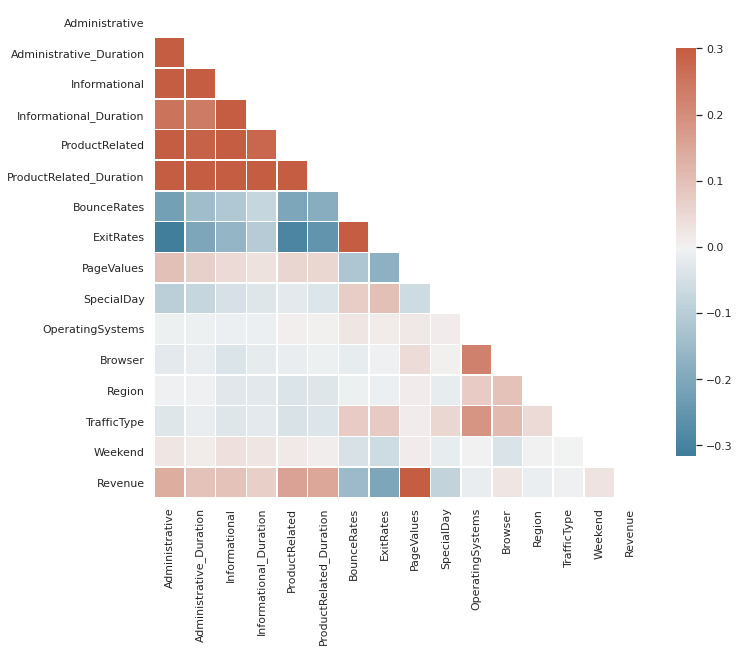

In [ ]:
sns.set_theme(style="white")
corr = Shoppers.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
Shoppers.groupby("Revenue").describe()

Administrative                                ... TrafficType                     
                 count      mean       std  min  25%  ...         min  25%  50%  75%   max
Revenue                                               ...                                 
False          10422.0  2.117732  3.202481  0.0  0.0  ...         1.0  2.0  2.0  4.0  20.0
True            1908.0  3.393606  3.730527  0.0  0.0  ...         1.0  2.0  2.0  4.0  20.0

[2 rows x 112 columns]

In [ ]:
Shoppers[Shoppers.Revenue==True]

Administrative  Administrative_Duration  ...  Weekend  Revenue
65                  3                87.833333  ...    False     True
76                 10              1005.666667  ...    False     True
101                 4                61.000000  ...     True     True
188                 9               111.500000  ...    False     True
196                 2                56.000000  ...    False     True
...               ...                      ...  ...      ...      ...
12272               6               133.466667  ...     True     True
12276               7               139.575000  ...    False     True
12311               1                 0.000000  ...    False     True
12312               7               150.357143  ...     True     True
12313               3                16.000000  ...    False     True

[1908 rows x 18 columns]

In [ ]:
plt.rcParams['figure.figsize']= [20,6]
plt.rcParams['figure.dpi']= 200

Allons voir le nombre de visites de pages de relié a un product par mois

In [ ]:
Shoppers.groupby(["Month"]).ProductRelated.sum()

Month
Jan          0
Feb       2058
Mar      37775
Apr          0
May      89105
June     10387
Jul      15728
Aug      16566
Sep      14831
Oct      18428
Nov     138024
Dec      48347
Name: ProductRelated, dtype: int64

SI on prends uniquement les nouveaux visiteurs pour identifier quand les nouveaux visiteurs regarde les produits 

In [ ]:
Shoppers[Shoppers.VisitorType=="New_Visitor"].groupby(["Month"]).ProductRelated.sum()

Month
Jan        0
Feb       13
Mar     4289
Apr        0
May     5733
June     563
Jul      732
Aug     1312
Sep     1651
Oct     2042
Nov     8628
Dec     5622
Name: ProductRelated, dtype: int64

Text(0.5, 1.0, 'Nombre de produits vus par des nouveaux visiteurs par mois')

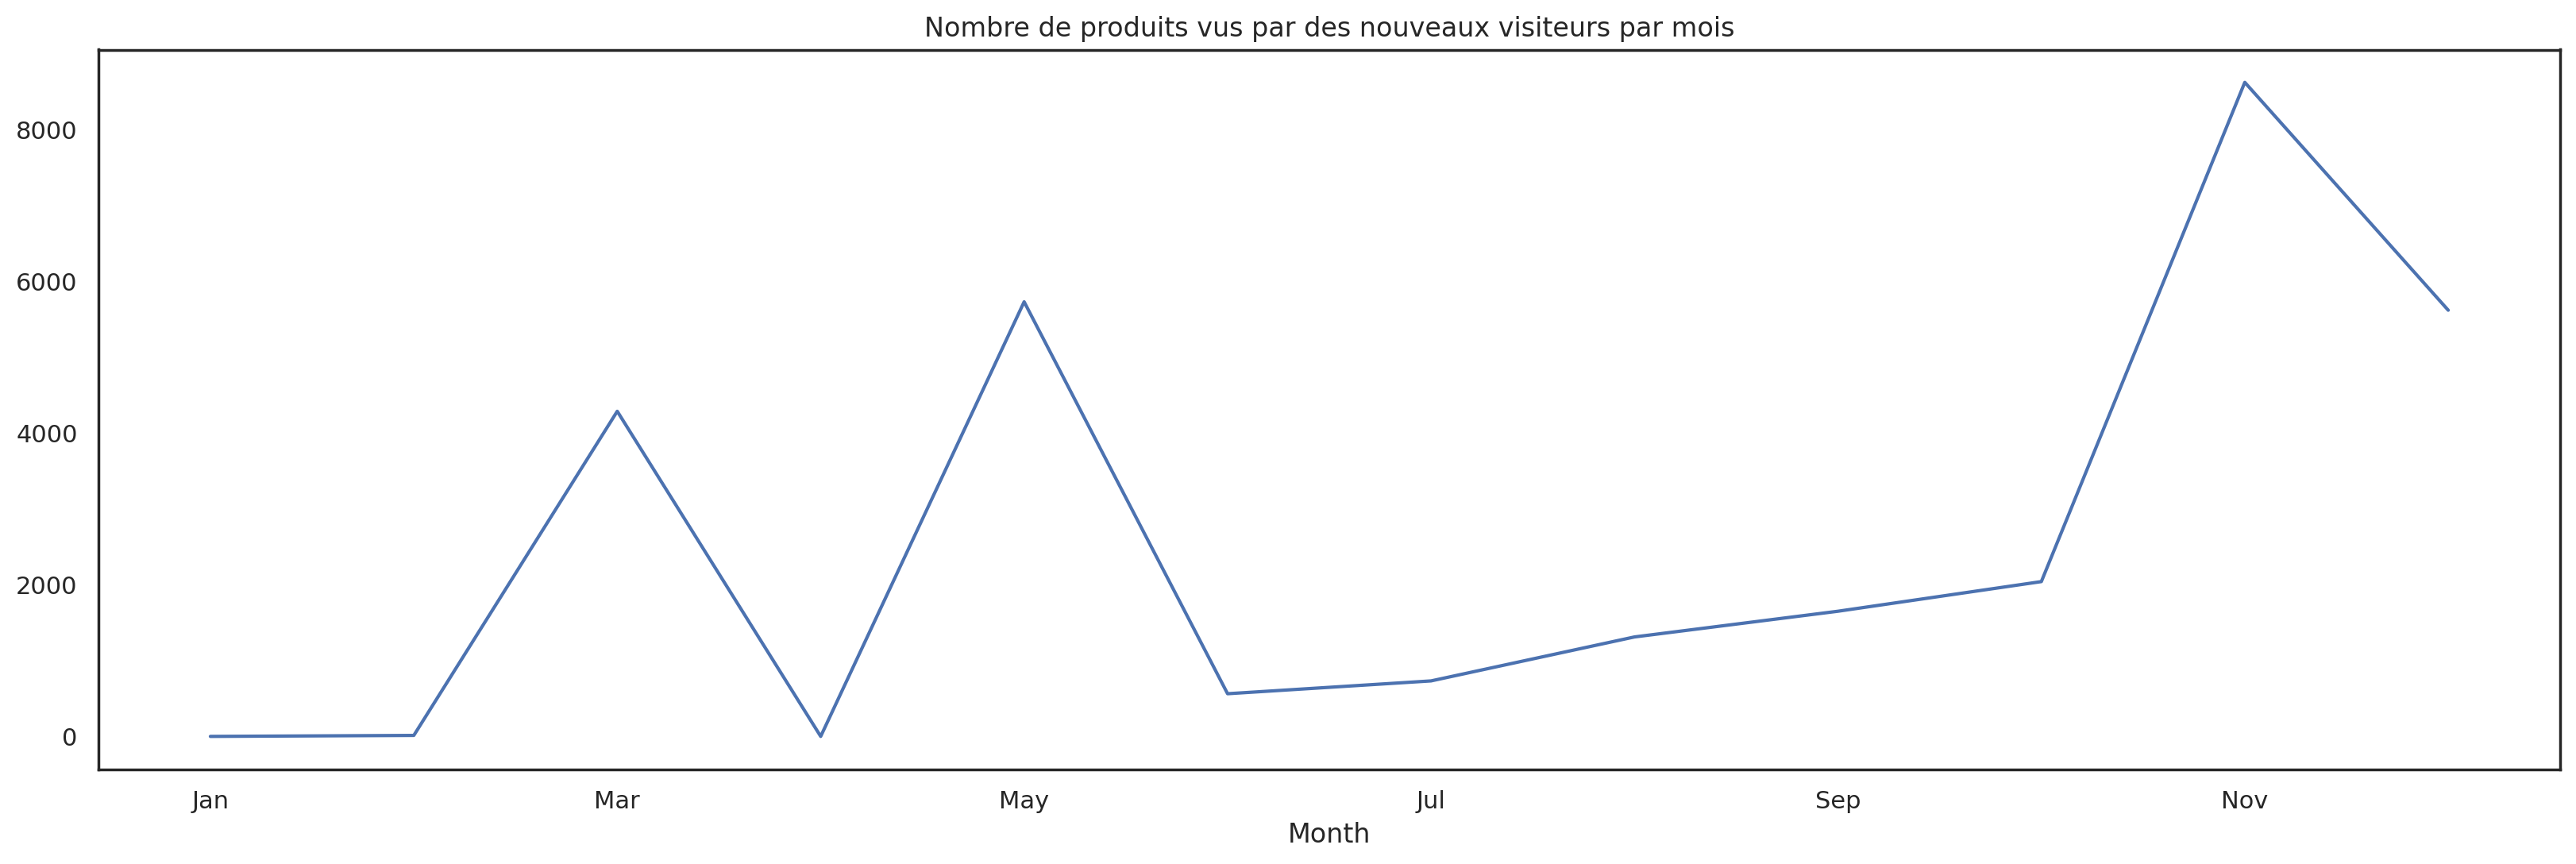

In [ ]:
Shoppers[Shoppers.VisitorType=="New_Visitor"].groupby(["Month"]).ProductRelated.sum().plot()
plt.title("Nombre de produits vus par des nouveaux visiteurs par mois")

Y a t il une correlation avec les jours important ? telle que la saint valentin ? 

In [ ]:
pd.options.display.max_rows = 500

Shoppers[Shoppers.VisitorType=="New_Visitor"].groupby(["Month","SpecialDay"]).ProductRelated.sum().fillna(0)

Month  SpecialDay
Jan    0.0              0.0
       0.2              0.0
       0.4              0.0
       0.6              0.0
       0.8              0.0
       1.0              0.0
Feb    0.0             13.0
       0.2              0.0
       0.4              0.0
       0.6              0.0
       0.8              0.0
       1.0              0.0
Mar    0.0           4289.0
       0.2              0.0
       0.4              0.0
       0.6              0.0
       0.8              0.0
       1.0              0.0
Apr    0.0              0.0
       0.2              0.0
       0.4              0.0
       0.6              0.0
       0.8              0.0
       1.0              0.0
May    0.0           4847.0
       0.2            184.0
       0.4            120.0
       0.6            310.0
       0.8            153.0
       1.0            119.0
June   0.0            563.0
       0.2              0.0
       0.4              0.0
       0.6              0.0
       0.8              0.0
  

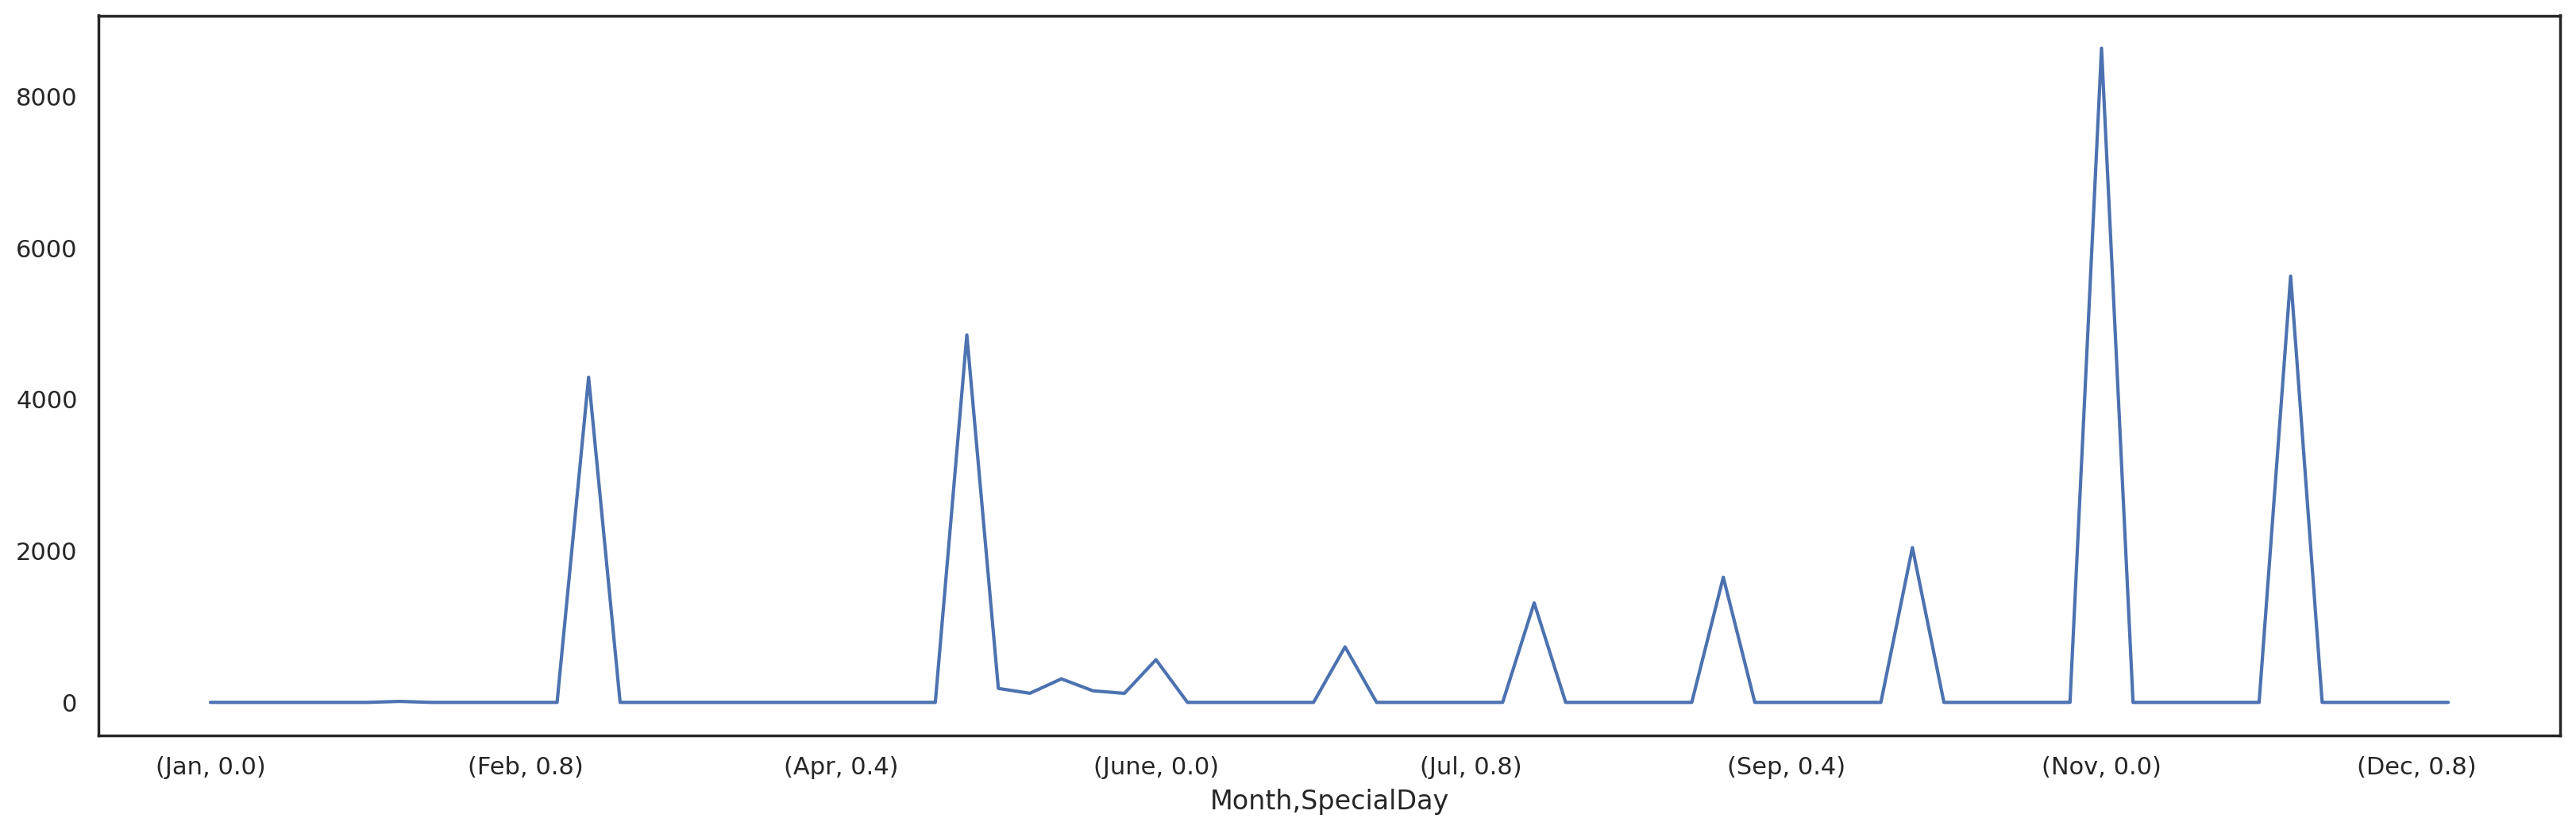

In [ ]:
Shoppers[Shoppers.VisitorType=="New_Visitor"].groupby(["Month","SpecialDay"]).ProductRelated.sum().fillna(0).plot()

Les nouveux visiteurs sont très présents à l'approche de la Saint Valentin et de la fête de mère. Les fêtes commerciales sont donc un vrai point positif pour avoir une meilleure visibilité sur ce site.

Text(0.5, 1.0, 'Nombre de nouveaux visiteurs par mois')

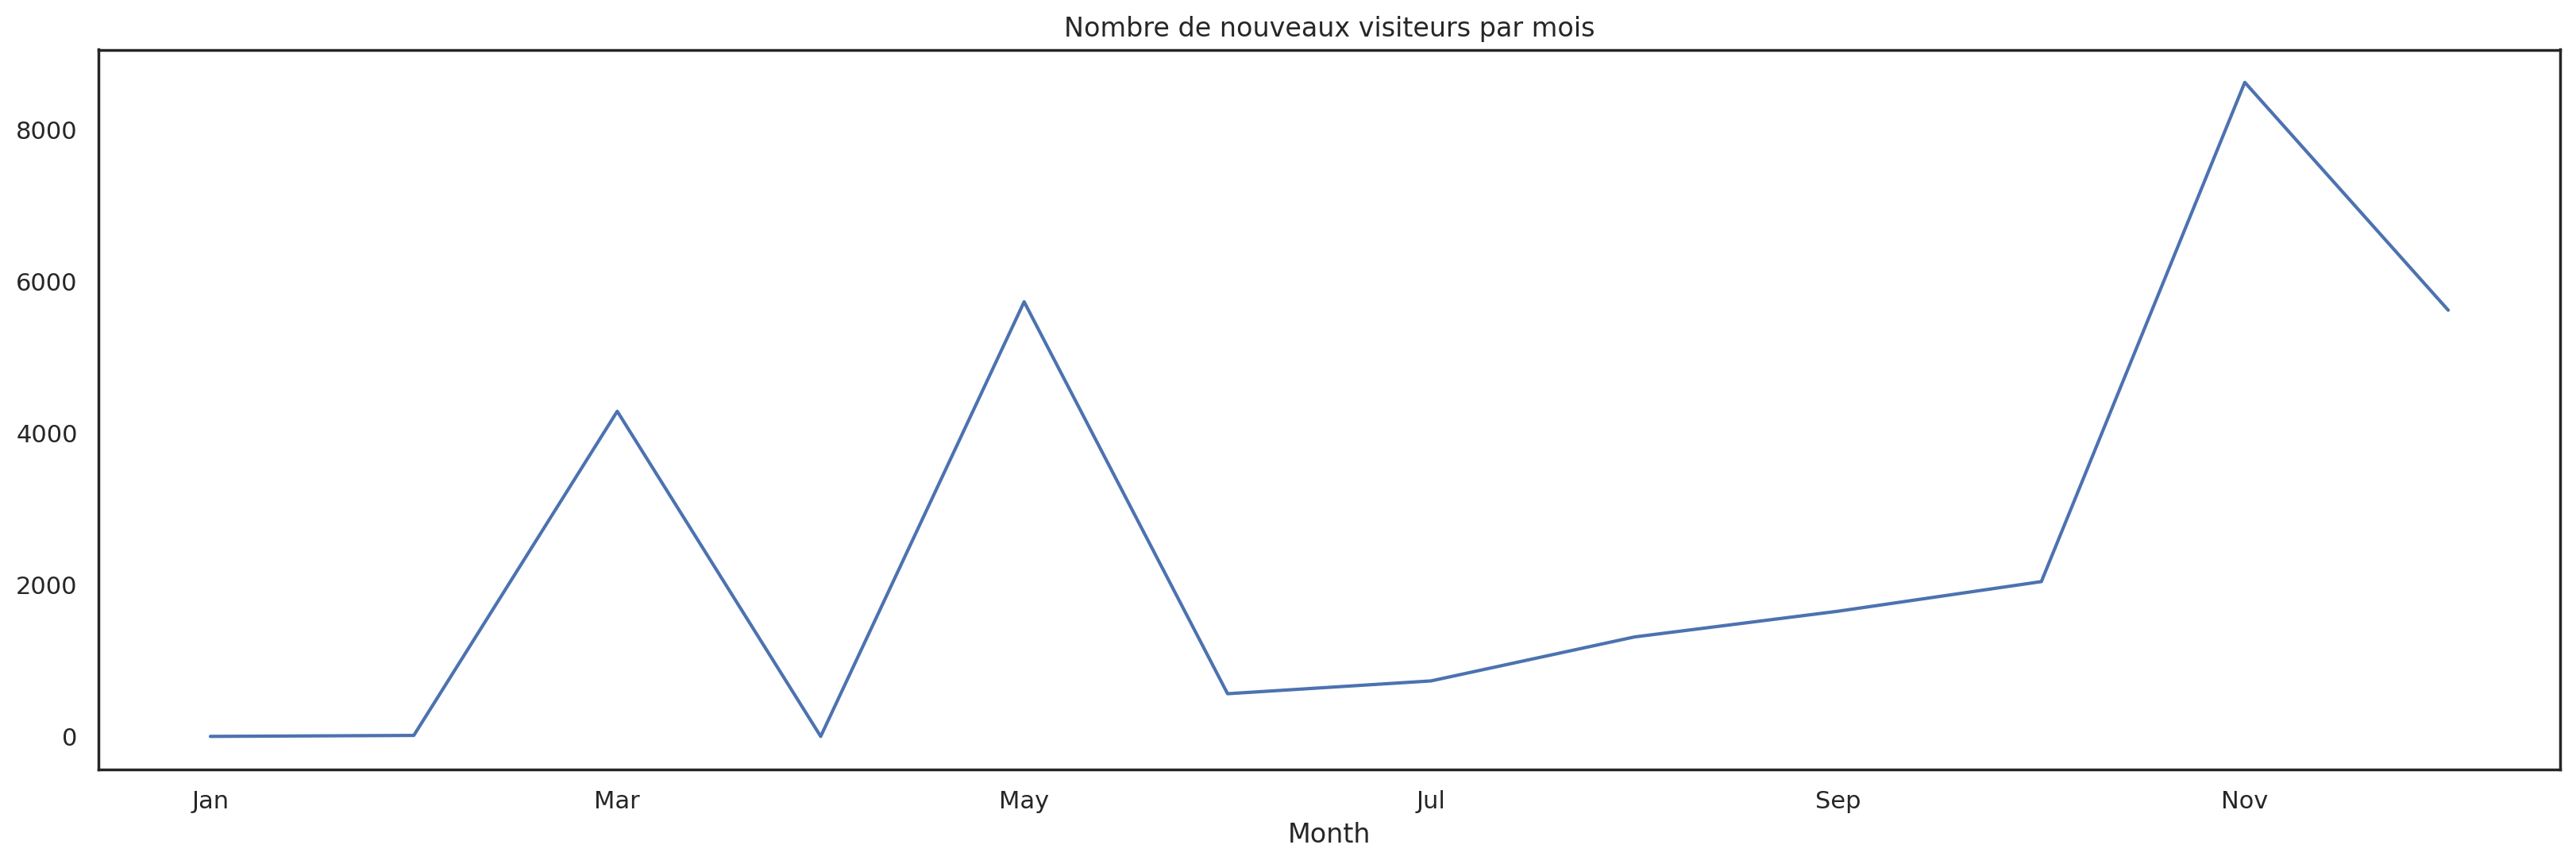

In [ ]:
Shoppers[Shoppers.VisitorType=="New_Visitor"].groupby(["Month"]).ProductRelated.sum().fillna(0).plot()
plt.title("Nombre de nouveaux visiteurs par mois")

Text(0.5, 1.0, 'Nombre de visiteurs déjà venus par mois')

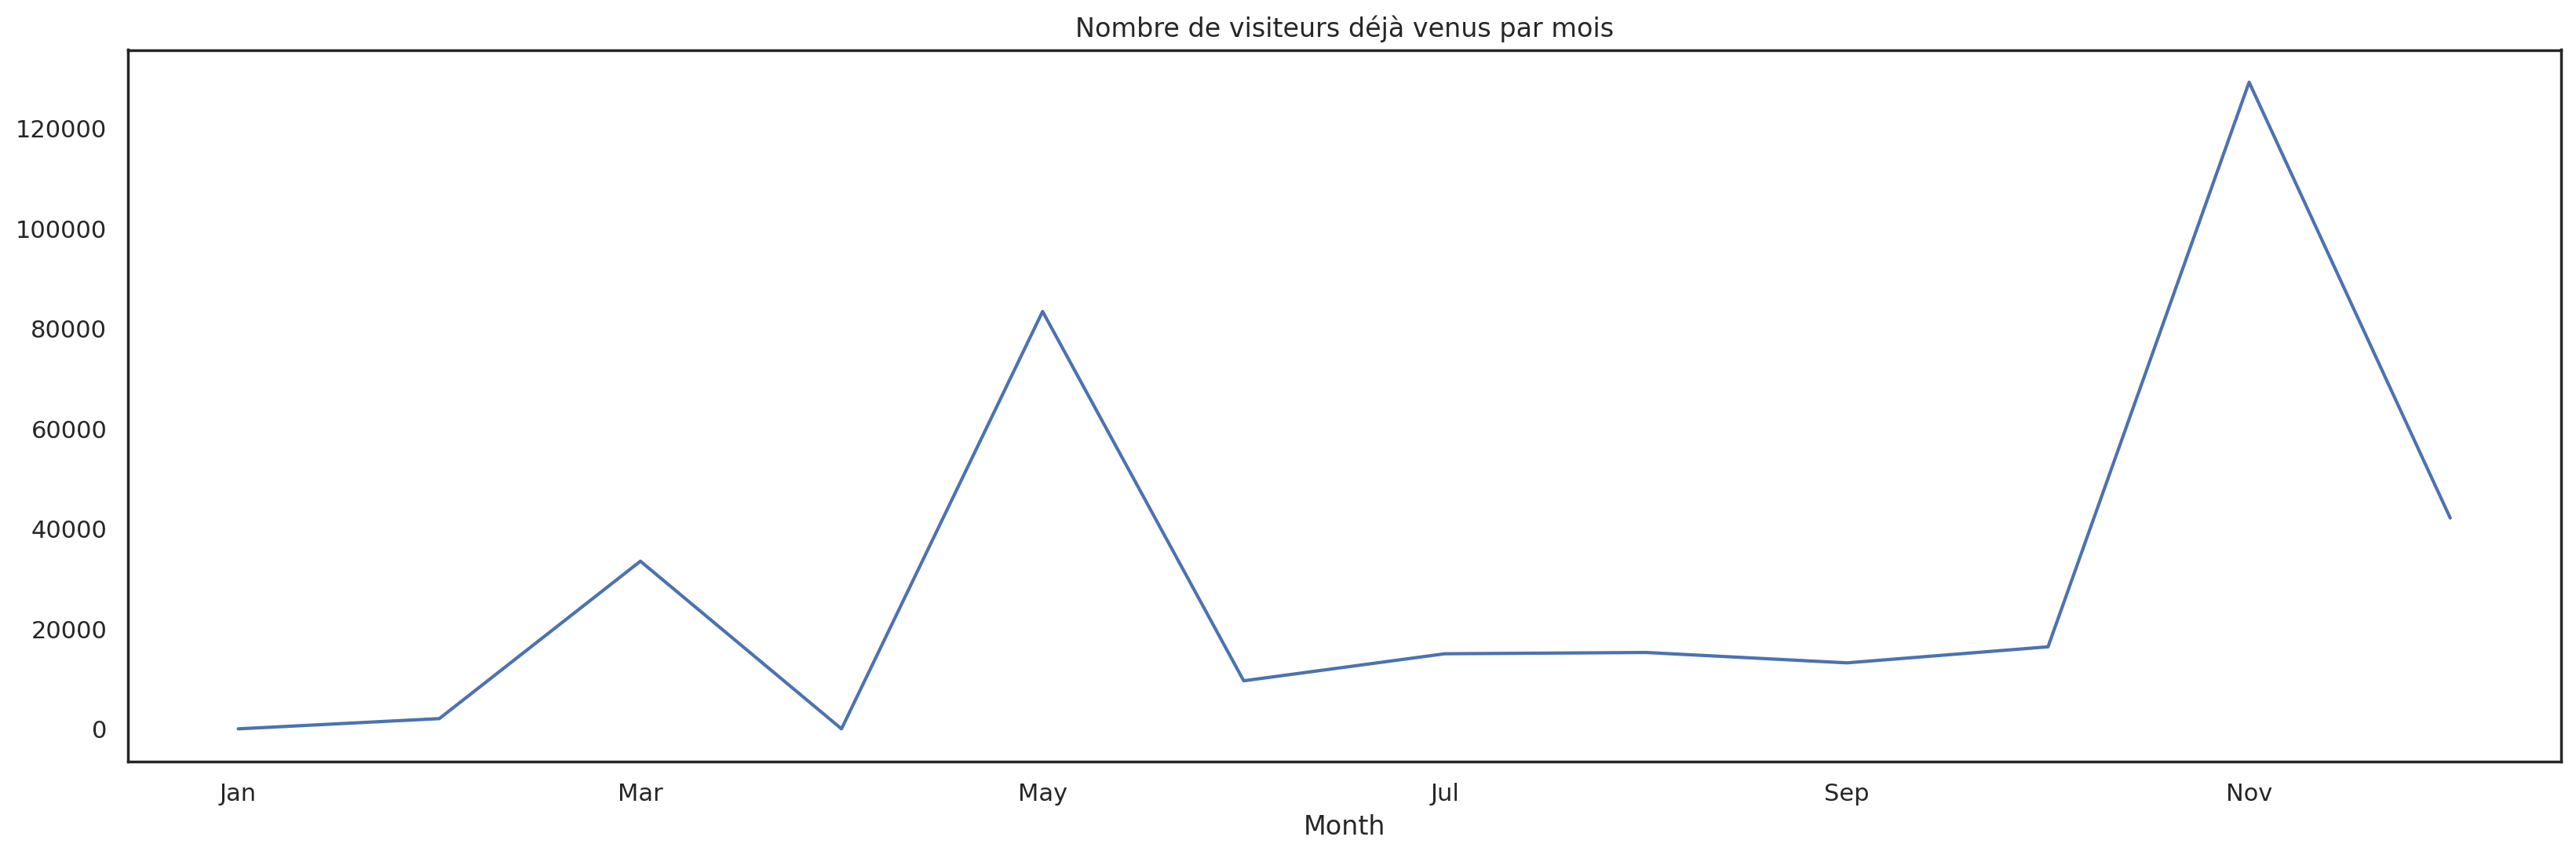

In [ ]:
Shoppers[Shoppers.VisitorType=="Returning_Visitor"].groupby(["Month"]).ProductRelated.sum().fillna(0).plot()
plt.title("Nombre de visiteurs déjà venus par mois")

Les graphique sont similaires en terme de forme mais l'échelle est bien entendu différente differente. Le nombre de nouveaux visiteurs semble proportionnels au nombre de visiteur "revenus".

Regardons si le temps passé suit la meme tendance :

Text(0.5, 1.0, 'Temps moyen passé sur des pages produits par un visiteur déjà venu par mois')

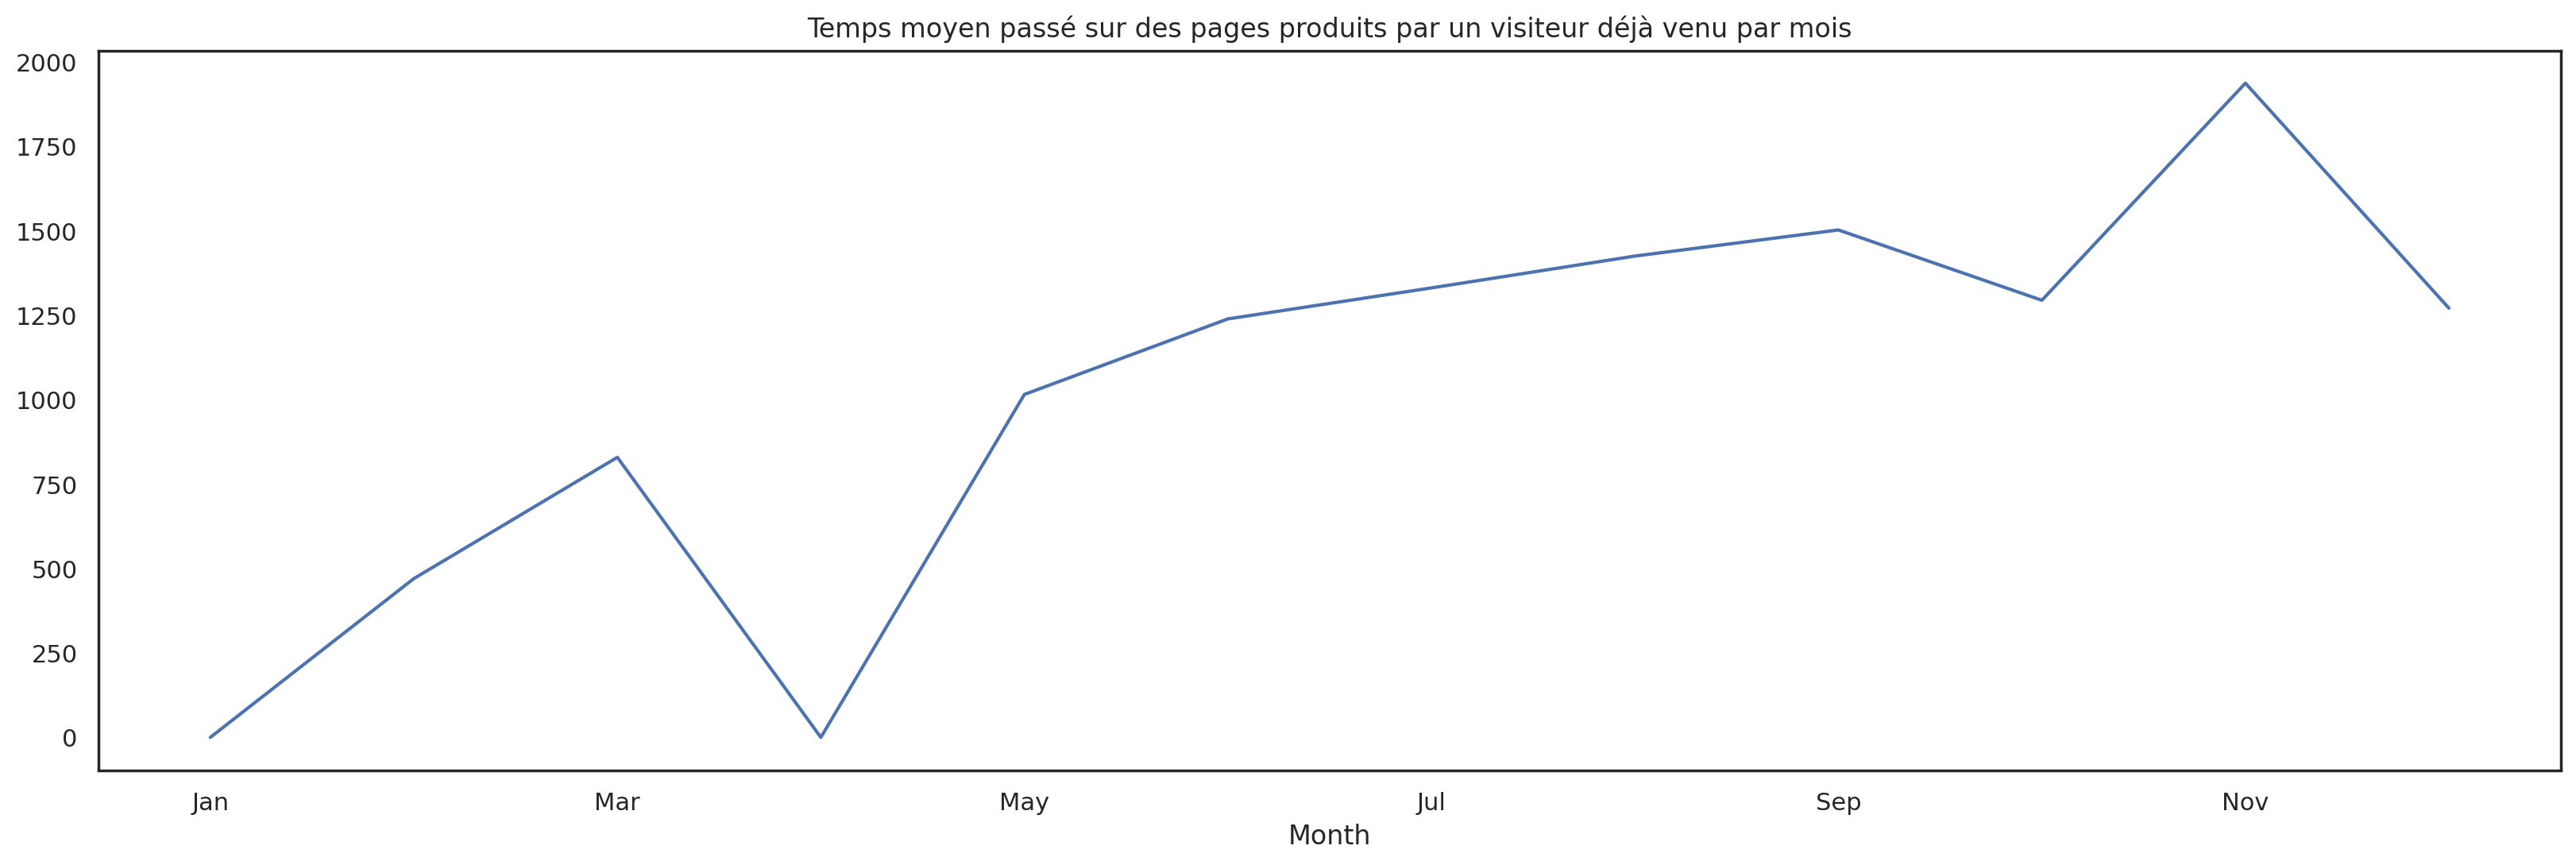

In [ ]:
Shoppers[Shoppers.VisitorType=="Returning_Visitor"].groupby(["Month"]).ProductRelated_Duration.mean().fillna(0).plot()
plt.title("Temps moyen passé sur des pages produits par un visiteur déjà venu par mois")

Text(0.5, 1.0, 'Temps moyen passé sur des pages produits par un nouveau visiteur par mois')

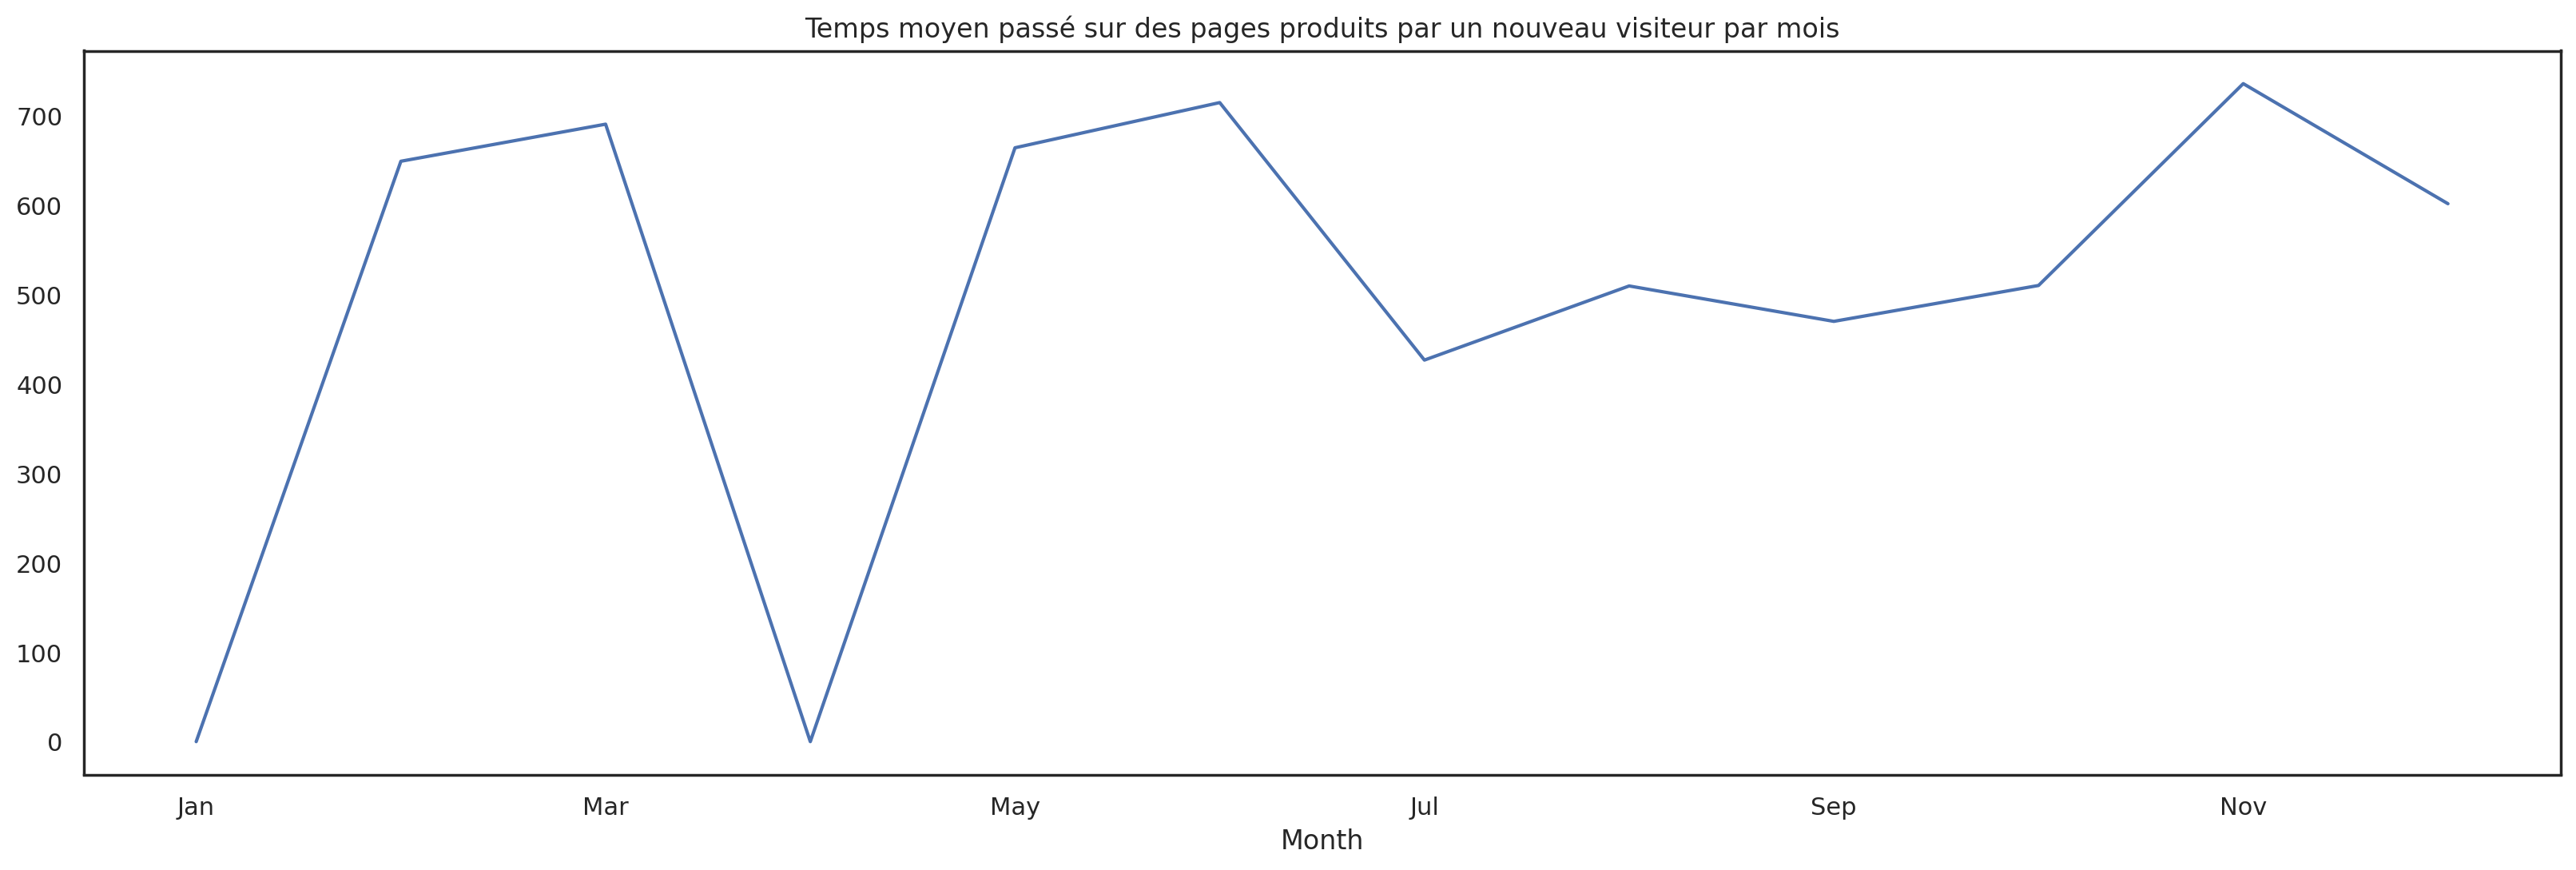

In [ ]:
Shoppers[Shoppers.VisitorType=="New_Visitor"].groupby(["Month"]).ProductRelated_Duration.mean().fillna(0).plot()
plt.title("Temps moyen passé sur des pages produits par un nouveau visiteur par mois")

Les courbes similaires cependant vers le mois de Novembre les returning visitor passent bien plus de temps sur les product que les nouveaux visiteurs en moyenne (l'utilisation de la moyenne ici est pertinente car elle ne dépend moins du nombre de visiteur mais plus du type de visiteur).

Note : Le mois de Janvier et Avril n'apparaissent pas 

Text(0.5, 1.0, 'Temps total passé sur les pages administratives au cours du mois de Février par région')

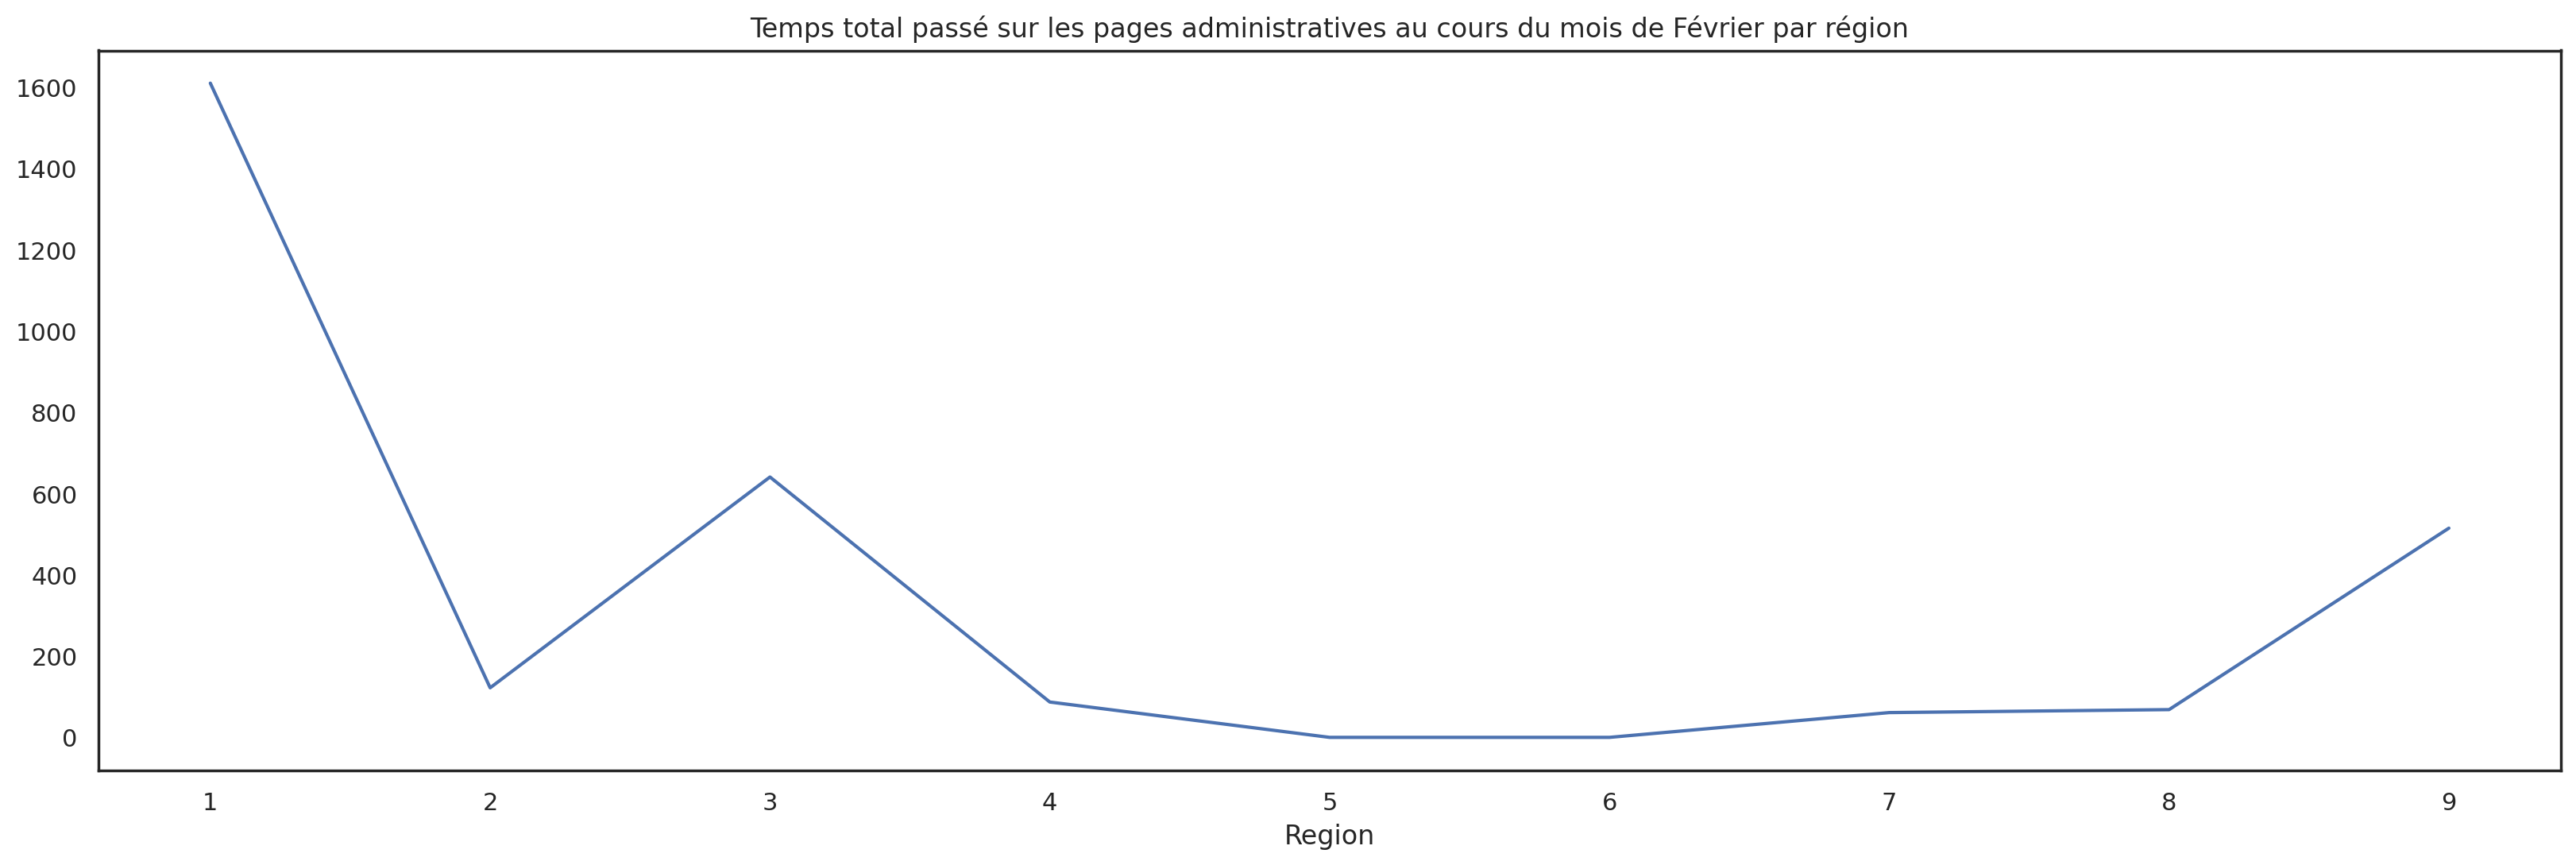

In [ ]:
Shoppers[(Shoppers.Month=="Feb")].groupby("Region").Administrative_Duration.sum().plot()
plt.title("Temps total passé sur les pages administratives au cours du mois de Février par région")

Pourcentage de nouveaux visiteurs :

In [ ]:
NombreVisiteurNouveau = len(Shoppers[Shoppers.VisitorType == "New_Visitor"])
NombreVisiteur = len(Shoppers)
NombreVisiteurNouveau/NombreVisiteur*100

13.738848337388484

Pourcentage de visiteurs déjà venus :

In [ ]:
NombreVisiteurRetour = len(Shoppers[Shoppers.VisitorType == "Returning_Visitor"])
NombreVisiteurRetour/NombreVisiteur*100

85.57177615571776

Pourcentage de visiteurs autres :


In [ ]:
NombreVisiteurAutre = len(Shoppers[Shoppers.VisitorType == "Other"])
NombreVisiteurAutre/NombreVisiteur*100

0.689375506893755

Les résultats sont bien cohérents :

In [ ]:
NombreVisiteurNouveau + NombreVisiteurRetour + NombreVisiteurAutre == NombreVisiteur

True

Faisons deux nouvelles colonnes, contenant le temps total dépensé et le nombre total de pages vues :

In [ ]:
Shoppers["TotalDuration"] = Shoppers['Administrative_Duration'] + Shoppers['Informational_Duration'] + Shoppers['ProductRelated_Duration']
Shoppers["TotalView"] = Shoppers['Administrative'] + Shoppers['Informational'] + Shoppers['ProductRelated']

Affichons le temps total dépensé par tous les utilisateurs par mois :

Text(0.5, 1.0, 'Temps total dépensé par mois')

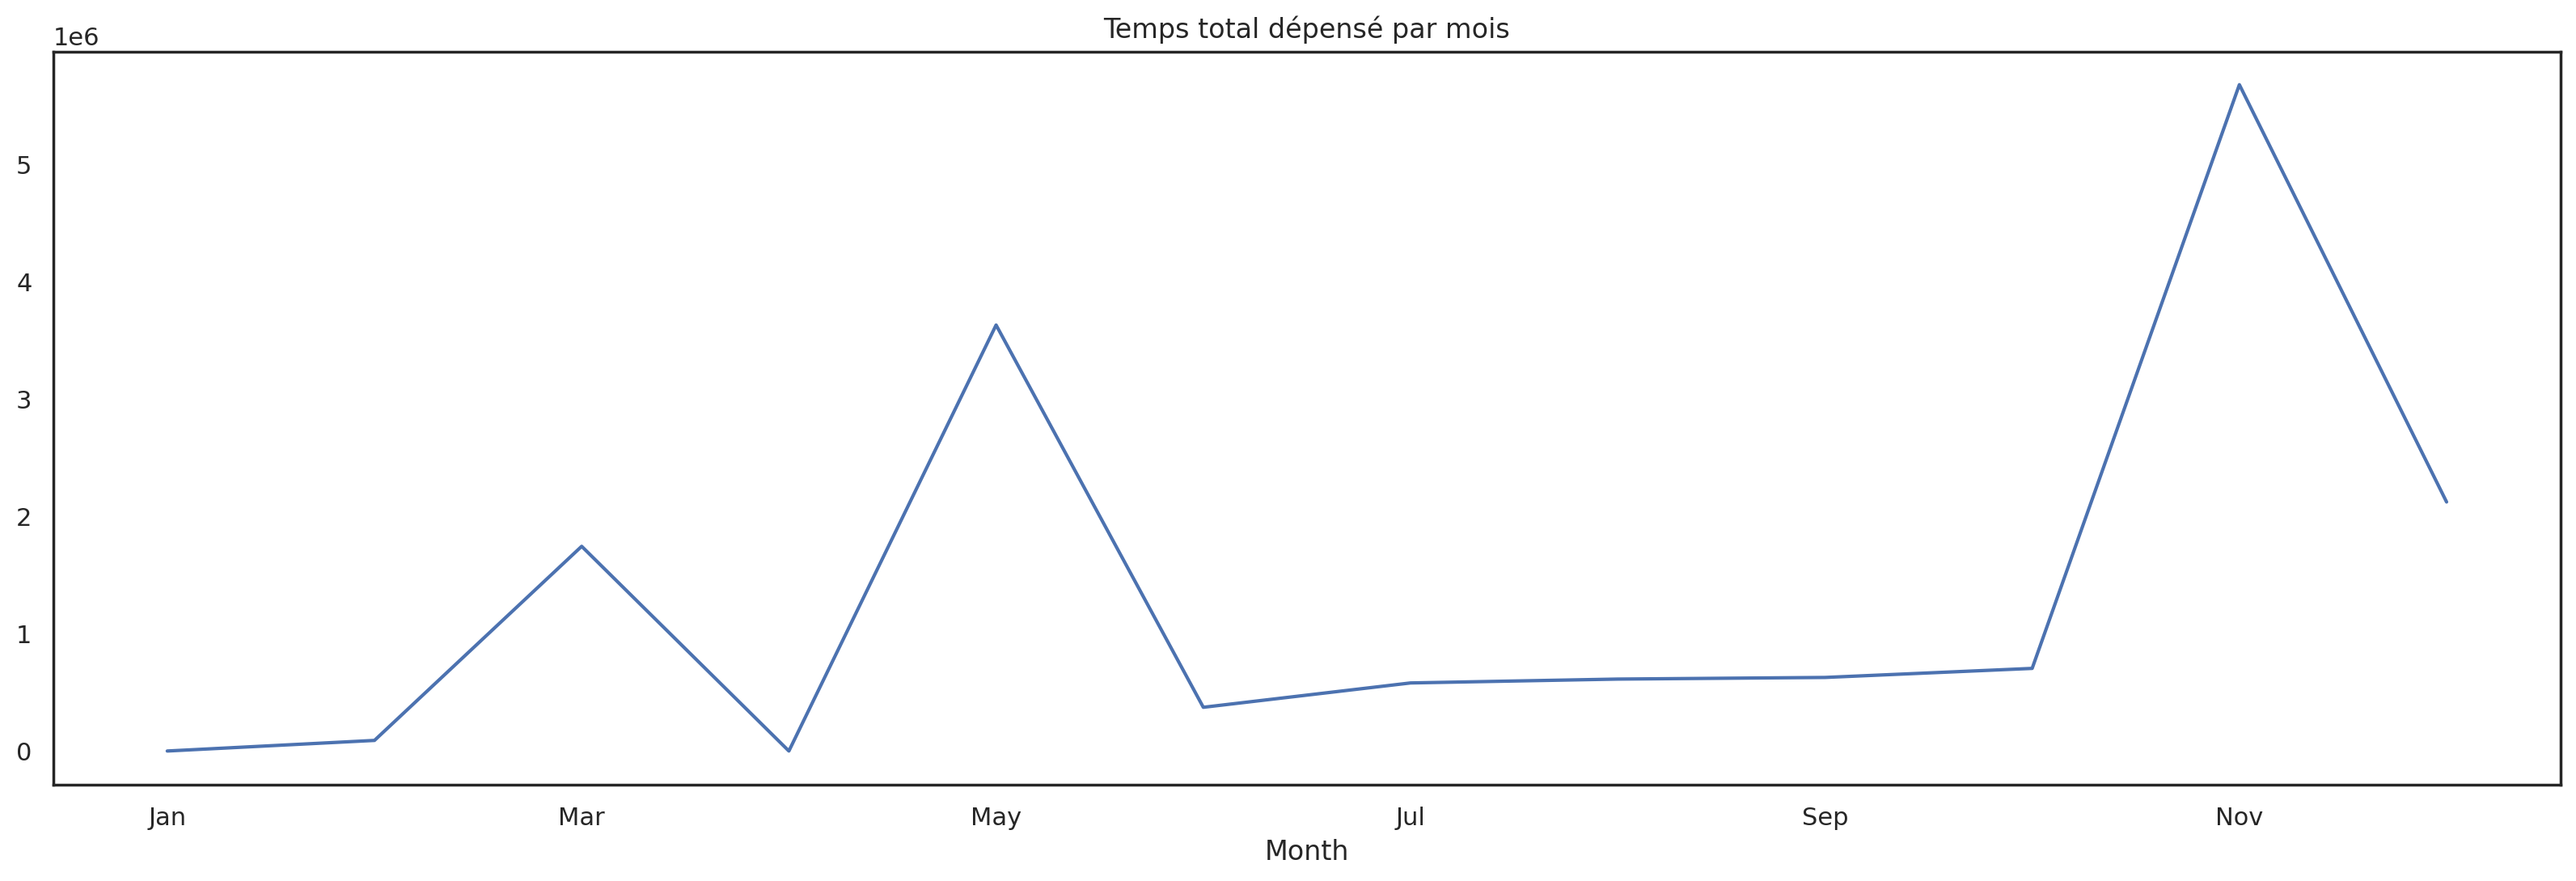

In [ ]:
Shoppers.groupby(["Month"]).TotalDuration.sum().plot()
plt.title("Temps total dépensé par mois")

Text(0.5, 1.0, 'Temps moyen dépensé par mois par utilisateur')

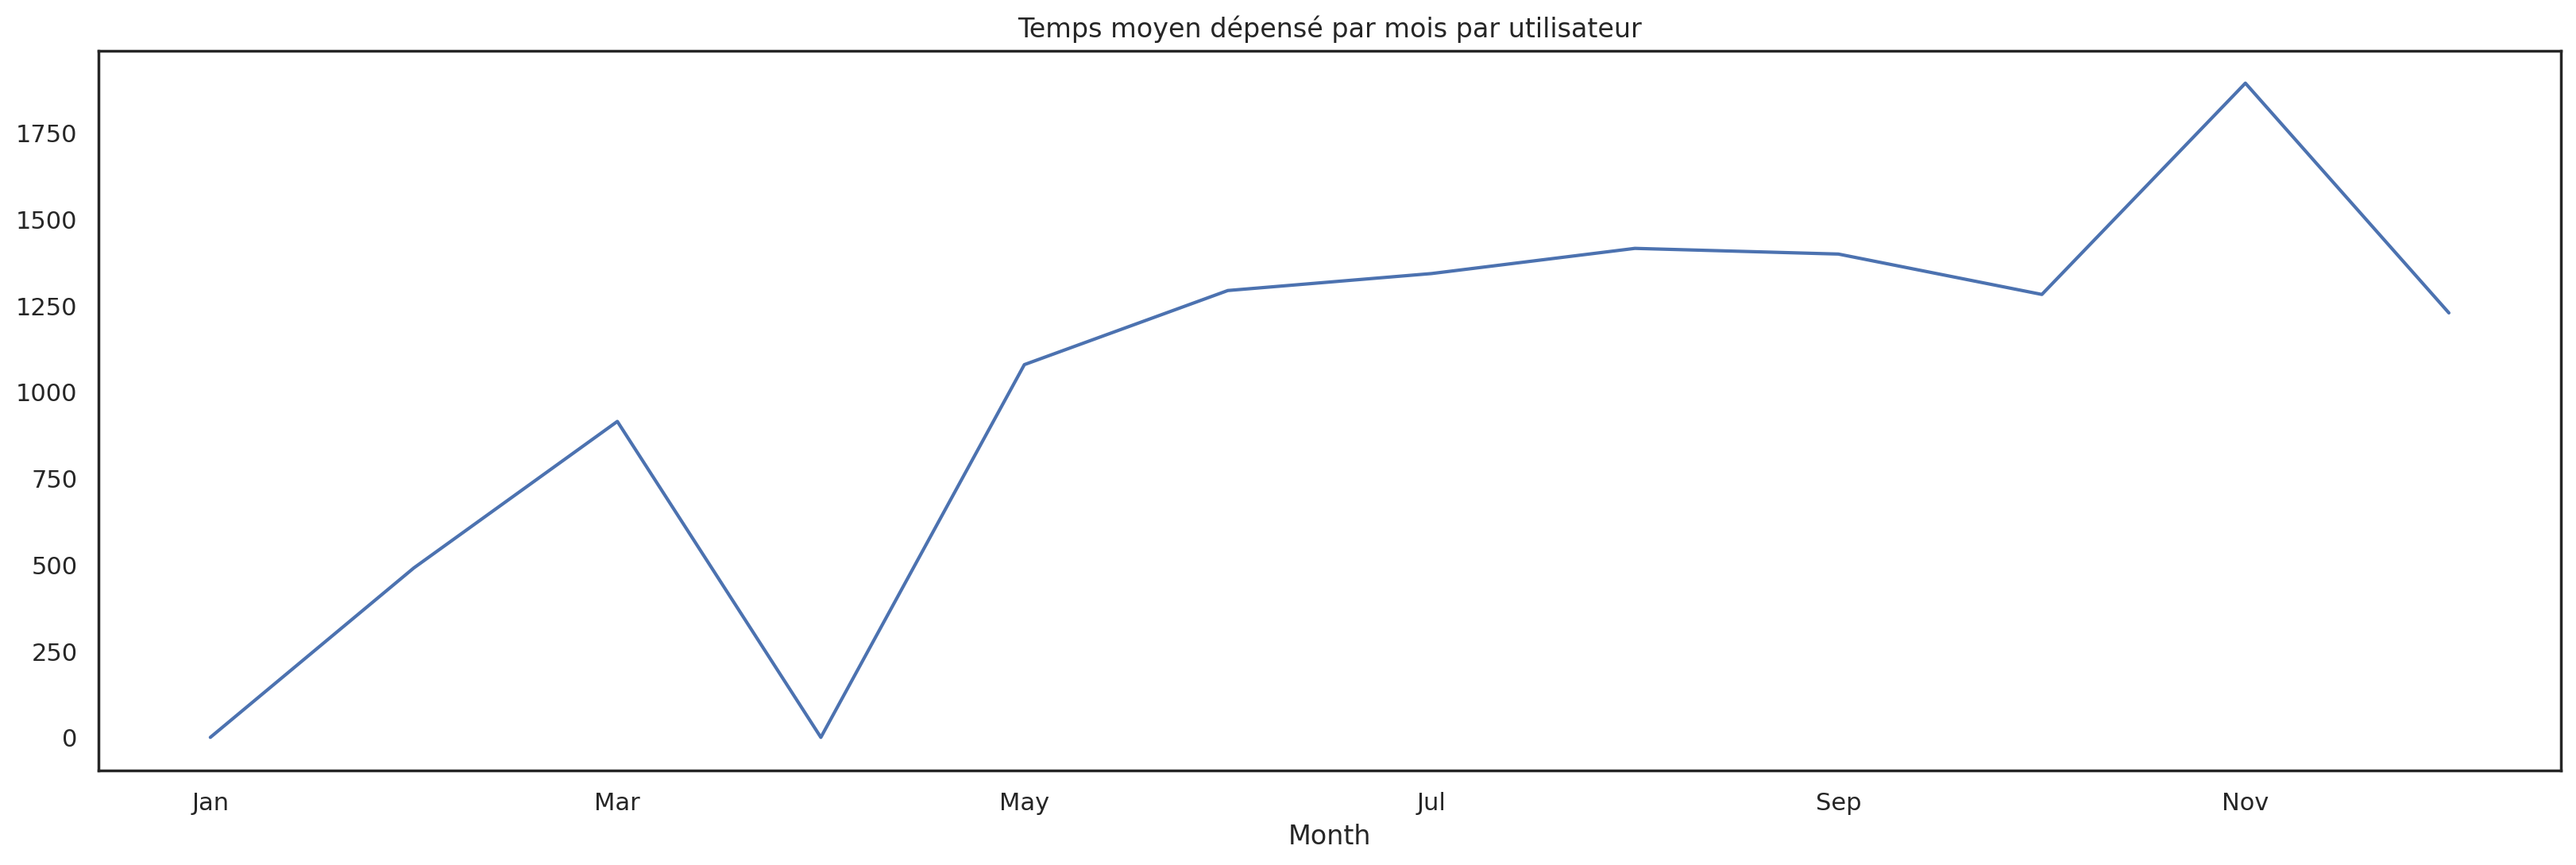

In [ ]:
Shoppers.groupby(["Month"]).TotalDuration.mean().fillna(0).plot()
plt.title("Temps moyen dépensé par mois par utilisateur")

Les deux trous du graphique tombe sur Avril et Janvier qui ne contiennent pas de données comme signalé plus haut.

##Questions portant sur le dataset

Ici nous traiterons de questions qui nous ont semblé pertinentes.

### I/ Y a t il une différence sur le temps passé sur le site en fonction du type de visiteur ? 

In [ ]:
Shoppers.groupby("VisitorType").TotalDuration.mean()

VisitorType
New_Visitor           747.542141
Other                 644.785941
Returning_Visitor    1405.707121
Name: TotalDuration, dtype: float64

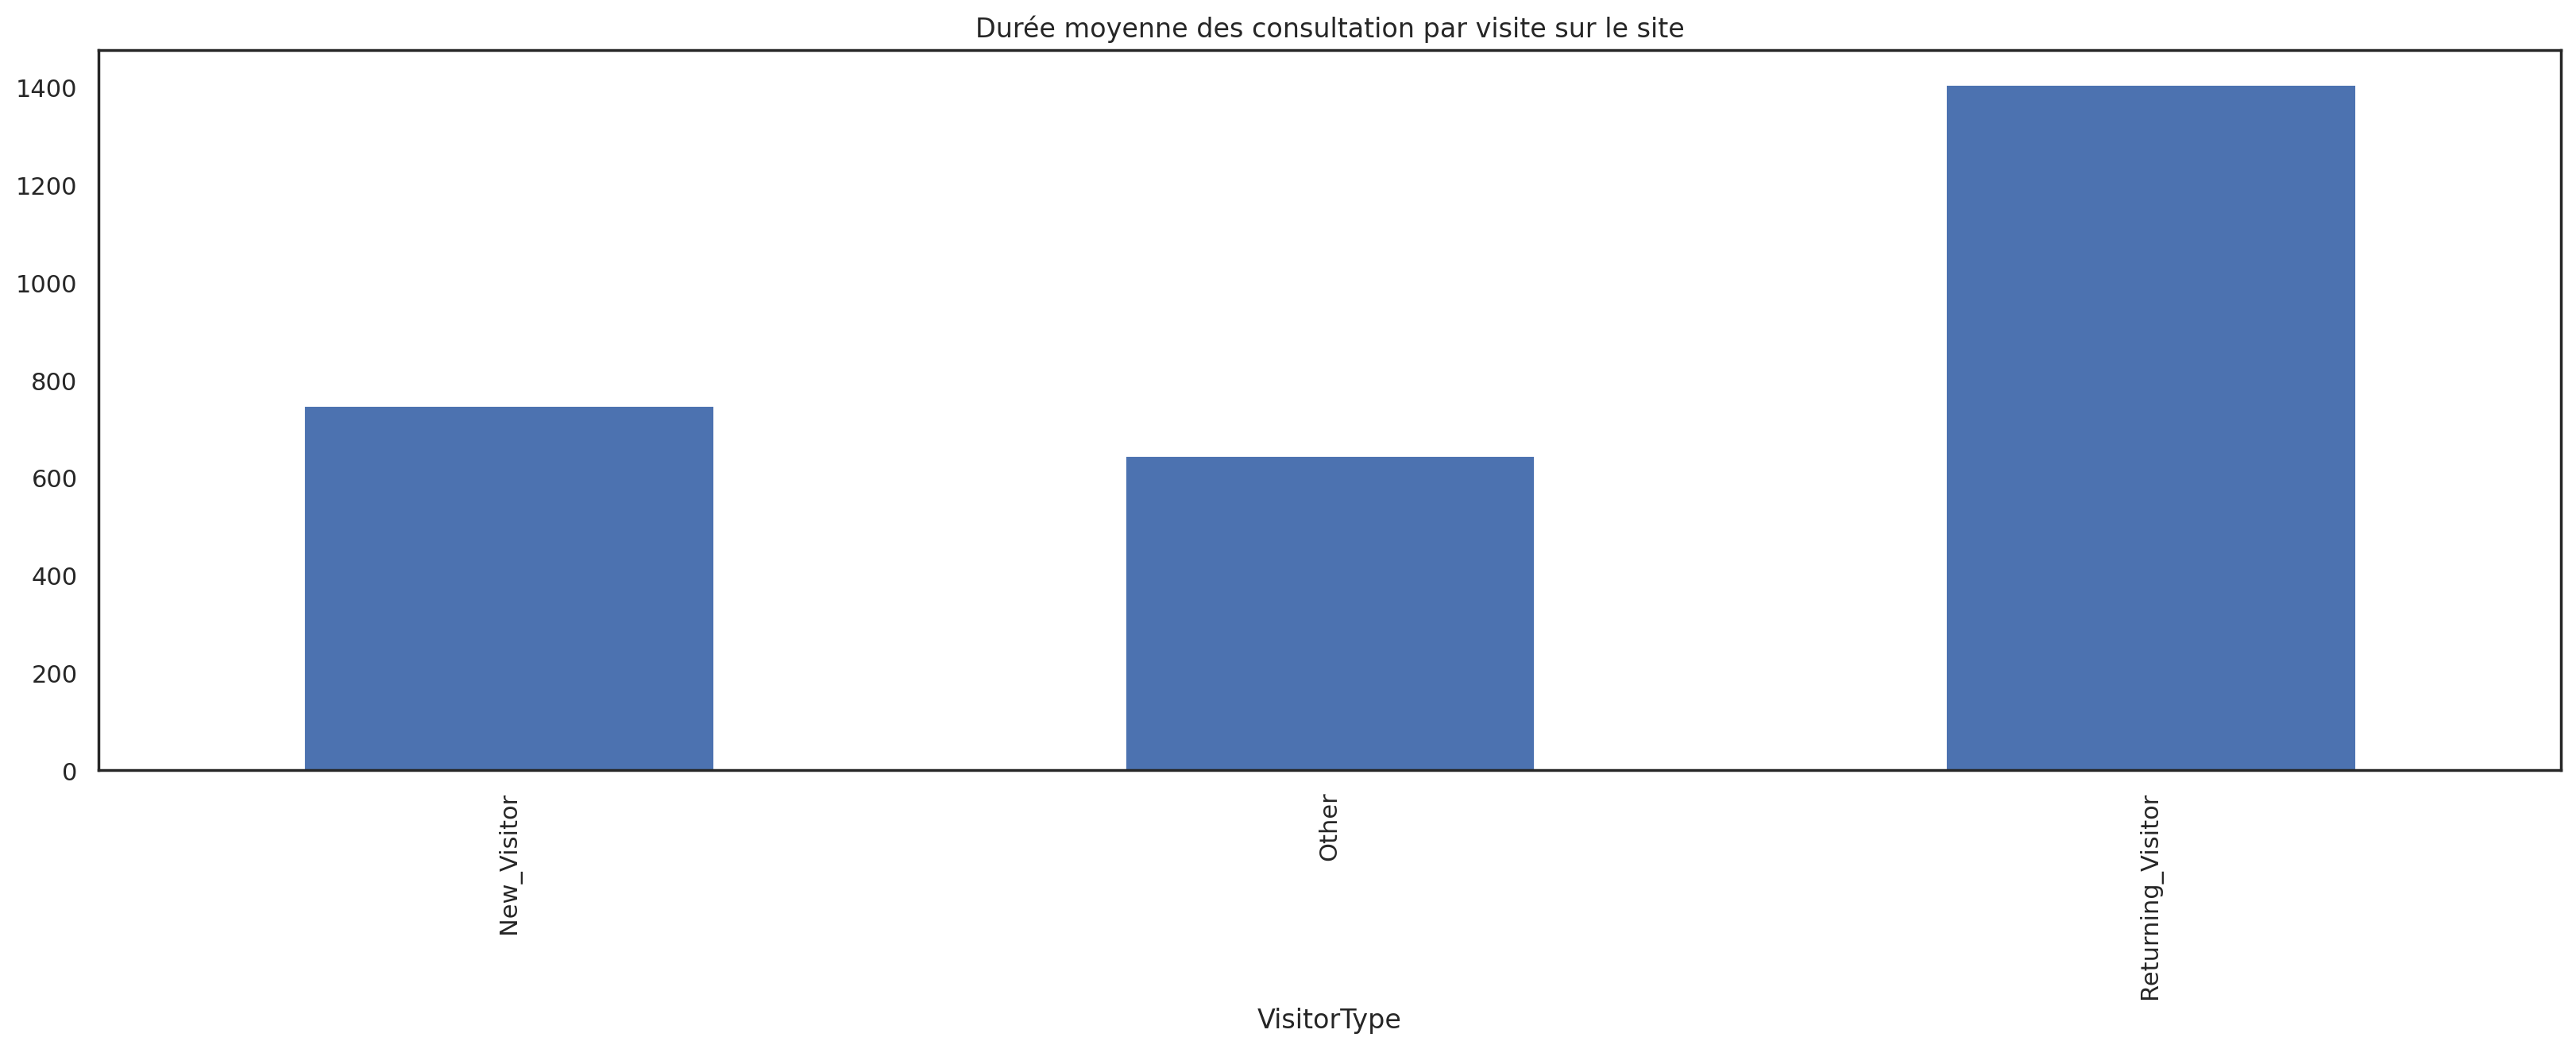

In [ ]:
Shoppers.groupby("VisitorType").TotalDuration.mean().plot(kind='bar', title="Durée moyenne des consultation par visite sur le site")

Nous remarquons une disparité importante ( de l'ordre du double ) entre les Nouveaux visiteurs et les "returning_Visitor". Sachant que les "returning_visitor" sont le gros du trafic a 85% ce chiffre est d'autant plus parlant. Il y a donc des visiteurs fideles, cependant cela peut aussi vouloir dire que lors des premieres visites les visiteurs ne passent que peu de temps sur les pages. Il faudrait comparer avec un autre site pour confirmer la notion de peu. 


### II/ Quels sont les type de page les plus vus en fonction des types de visiteurs ? 
 

In [ ]:

Shoppers["MostVisitedPage"] = None
Shoppers["percentAdmin"]=None
Shoppers["percentInfo"]=None
Shoppers["percentProd"]=None

def MostViewPage(Shoppers):
  for k in range(0,len(Shoppers)):
    if Shoppers.Administrative[k] > Shoppers.Informational[k] and Shoppers.Administrative[k] > Shoppers.ProductRelated[k]: 
      Shoppers.MostVisitedPage = "Administrative"
    elif  Shoppers.Informational[k] < Shoppers.ProductRelated[k]:
      Shoppers.MostVisitedPage[k] = "ProductRelated"
    else:
      Shoppers.MostVisitedPage[k] = "Informational"
      
  return Shoppers

Shoppers = MostViewPage(Shoppers)

def percentage_of_view(Shoppers):
  for k in range(0,len(Shoppers)):
    Total = Shoppers.Administrative[k] + Shoppers.Informational[k] + Shoppers.ProductRelated[k]
    Shoppers["percentAdmin"][k]=Shoppers.Administrative[k]/Total
    Shoppers["percentInfo"][k]=Shoppers.Informational[k]/Total
    Shoppers["percentProd"][k]=Shoppers.ProductRelated[k]/Total
    if Shoppers["percentAdmin"][k] +   Shoppers["percentInfo"][k]   + Shoppers["percentProd"][k] != 1:
      print("at k =",k, "error", Shoppers["percentAdmin"][k] +   Shoppers["percentInfo"][k]   + Shoppers["percentProd"][k])


Shoppers.MostVisitedPage
percentage_of_view(Shoppers)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarni

at k = 447 error 0.9999999999999999


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


at k = 2683 error nan
at k = 3187 error nan
at k = 5151 error 0.9999999999999999
at k = 5557 error nan
at k = 5800 error nan
at k = 5912 error 0.9999999999999999
at k = 6459 error 0.9999999999999999
at k = 8052 error nan
at k = 11865 error nan


Nous avons des Nan regardons de quoi il s'agit : 
Il s'agit de valeur ou aucune page ne semble avoir été regardé 

Pour les valeur a 0.9999999 cela est du aux arrondis 

In [ ]:
Shoppers.iloc[2683]

Administrative                             0
Administrative_Duration                    0
Informational                              0
Informational_Duration                     0
ProductRelated                             0
ProductRelated_Duration                    0
BounceRates                              0.2
ExitRates                                0.2
PageValues                                 0
SpecialDay                                 0
Month                                    May
OperatingSystems                           3
Browser                                    2
Region                                     3
TrafficType                               18
VisitorType                Returning_Visitor
Weekend                                 True
Revenue                                False
TotalDuration                              0
TotalView                                  0
MostVisitedPage               Administrative
percentAdmin                             NaN
percentInf

In [ ]:
def percentage_of_view(Shoppers):
  Total = 0
  for k in range(0,len(Shoppers)):
    Total = Total +Shoppers.Administrative[k] + Shoppers.Informational[k] + Shoppers.ProductRelated[k]
  for k in range(0,len(Shoppers)):
    if Total !=0: 
      Shoppers["percentAdmin"][k]=Shoppers.Administrative[k]/Total*100
      Shoppers["percentInfo"][k]=Shoppers.Informational[k]/Total*100
      Shoppers["percentProd"][k]=Shoppers.ProductRelated[k]/Total*100

percentage_of_view(Shoppers)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


On met une colonne donnant le type page le plus consulté et 3 colonnes sur le pourcentage de type de page vue

In [ ]:
Shoppers["Number"] = 1
Shoppers[["VisitorType", "MostVisitedPage","Number"]].groupby(["VisitorType","MostVisitedPage"]).count()

Number
VisitorType       MostVisitedPage        
New_Visitor       Administrative     1689
                  ProductRelated        5
Other             Administrative       84
                  ProductRelated        1
Returning_Visitor Administrative    10487
                  ProductRelated       64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f71c2651d68>],
      dtype=object)

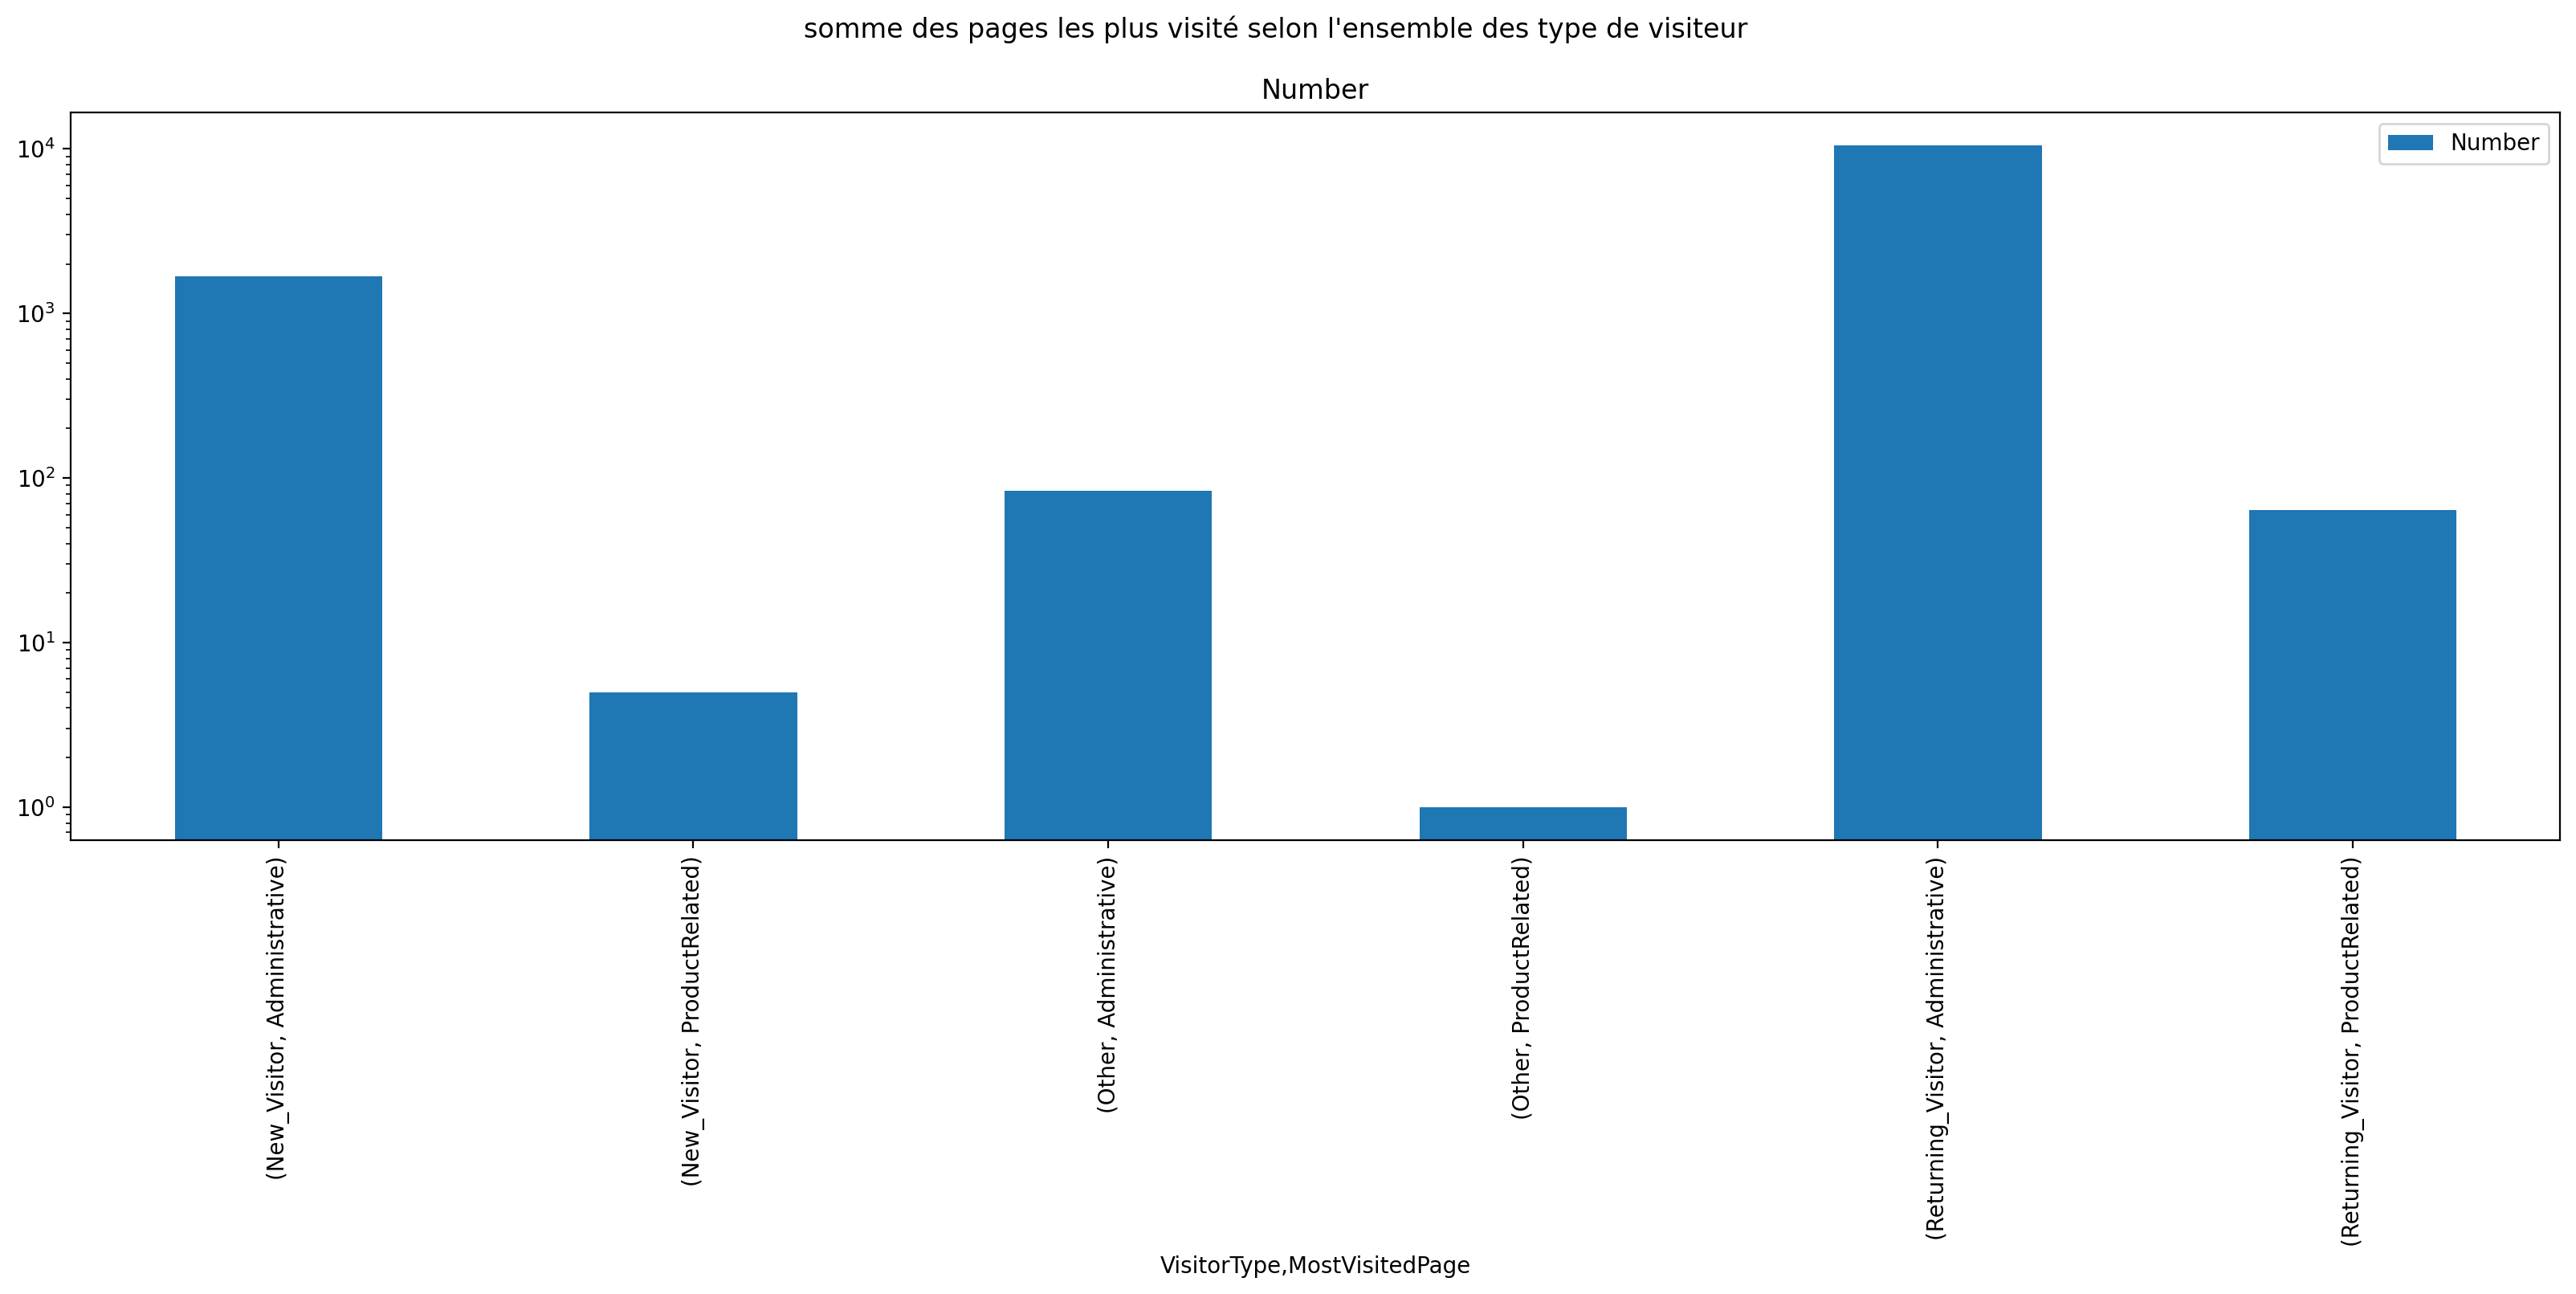

In [ ]:
Shoppers[["VisitorType", "MostVisitedPage","Number"]].groupby(["VisitorType","MostVisitedPage"]).count().plot(kind='bar',subplots=True,logy=True, title = "somme des pages les plus visité selon l'ensemble des type de visiteur")

Attention a l'échelle logarithmique qui permet de voir les valeurs très éloigné entre le 1 et le 10487, On observe que dans tout les cas, la majorité des pages observées sont Administratives quel que soit le type du visiteurs

Regardons maintenant les pourcentages exacts par catégorie de visiteur :

In [ ]:
for vistype in Shoppers["VisitorType"].unique() :
  NbAdministrative = Shoppers[Shoppers.VisitorType == vistype].Administrative.sum()
  NbProductRelated = Shoppers[Shoppers.VisitorType == vistype].ProductRelated.sum()
  NbTotal = Shoppers[Shoppers.VisitorType == vistype].TotalView.sum()
  print ("Pourcentage de visite administrative parmi les " + vistype +" : " + str(NbAdministrative/NbTotal*100))
  print ("Pourcentage de visite de produit parmi les " + vistype +" : " + str(NbProductRelated/NbTotal*100))

Pourcentage de visite administrative parmi les Returning_Visitor : 6.189591889677422
Pourcentage de visite de produit parmi les Returning_Visitor : 92.3645946508241
Pourcentage de visite administrative parmi les New_Visitor : 12.186733572012516
Pourcentage de visite de produit parmi les New_Visitor : 86.22050573675753
Pourcentage de visite administrative parmi les Other : 10.416666666666668
Pourcentage de visite de produit parmi les Other : 88.33333333333333


Il y a donc en proportion nettement plus de pages administratives vues par des nouveaux visiteurs que par ceux déjà venu (12% contre 6%).
Cependant les pages produits représentent toujours la plus grande majorité des pages vues.

### III/ Les mois ont ils une influence sur le type de page qui sont vus ?

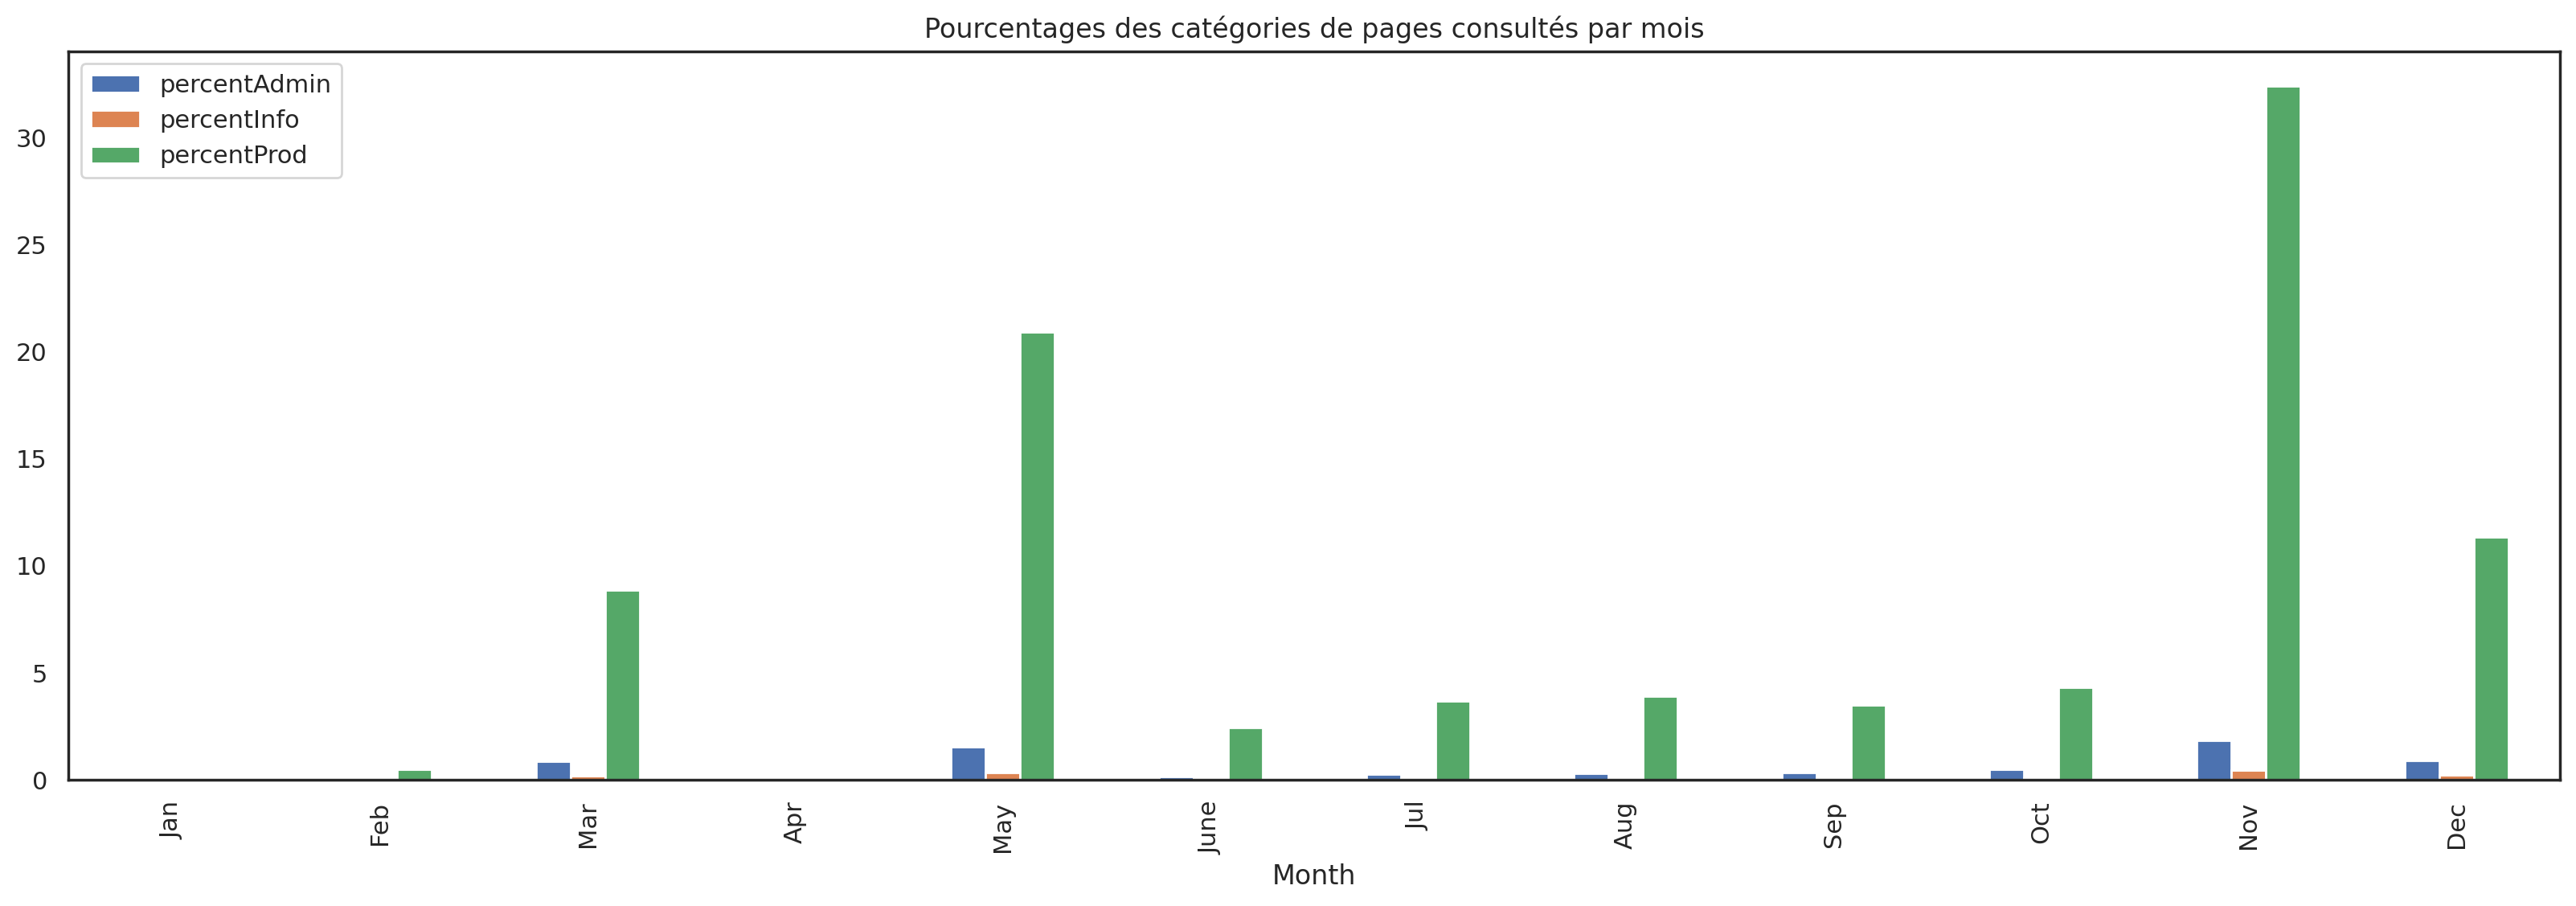

In [ ]:
Shoppers[["Month","percentAdmin","percentInfo","percentProd"]].groupby("Month").sum().fillna(0).plot(title="Pourcentages des catégories de pages consultés par mois",kind='bar')

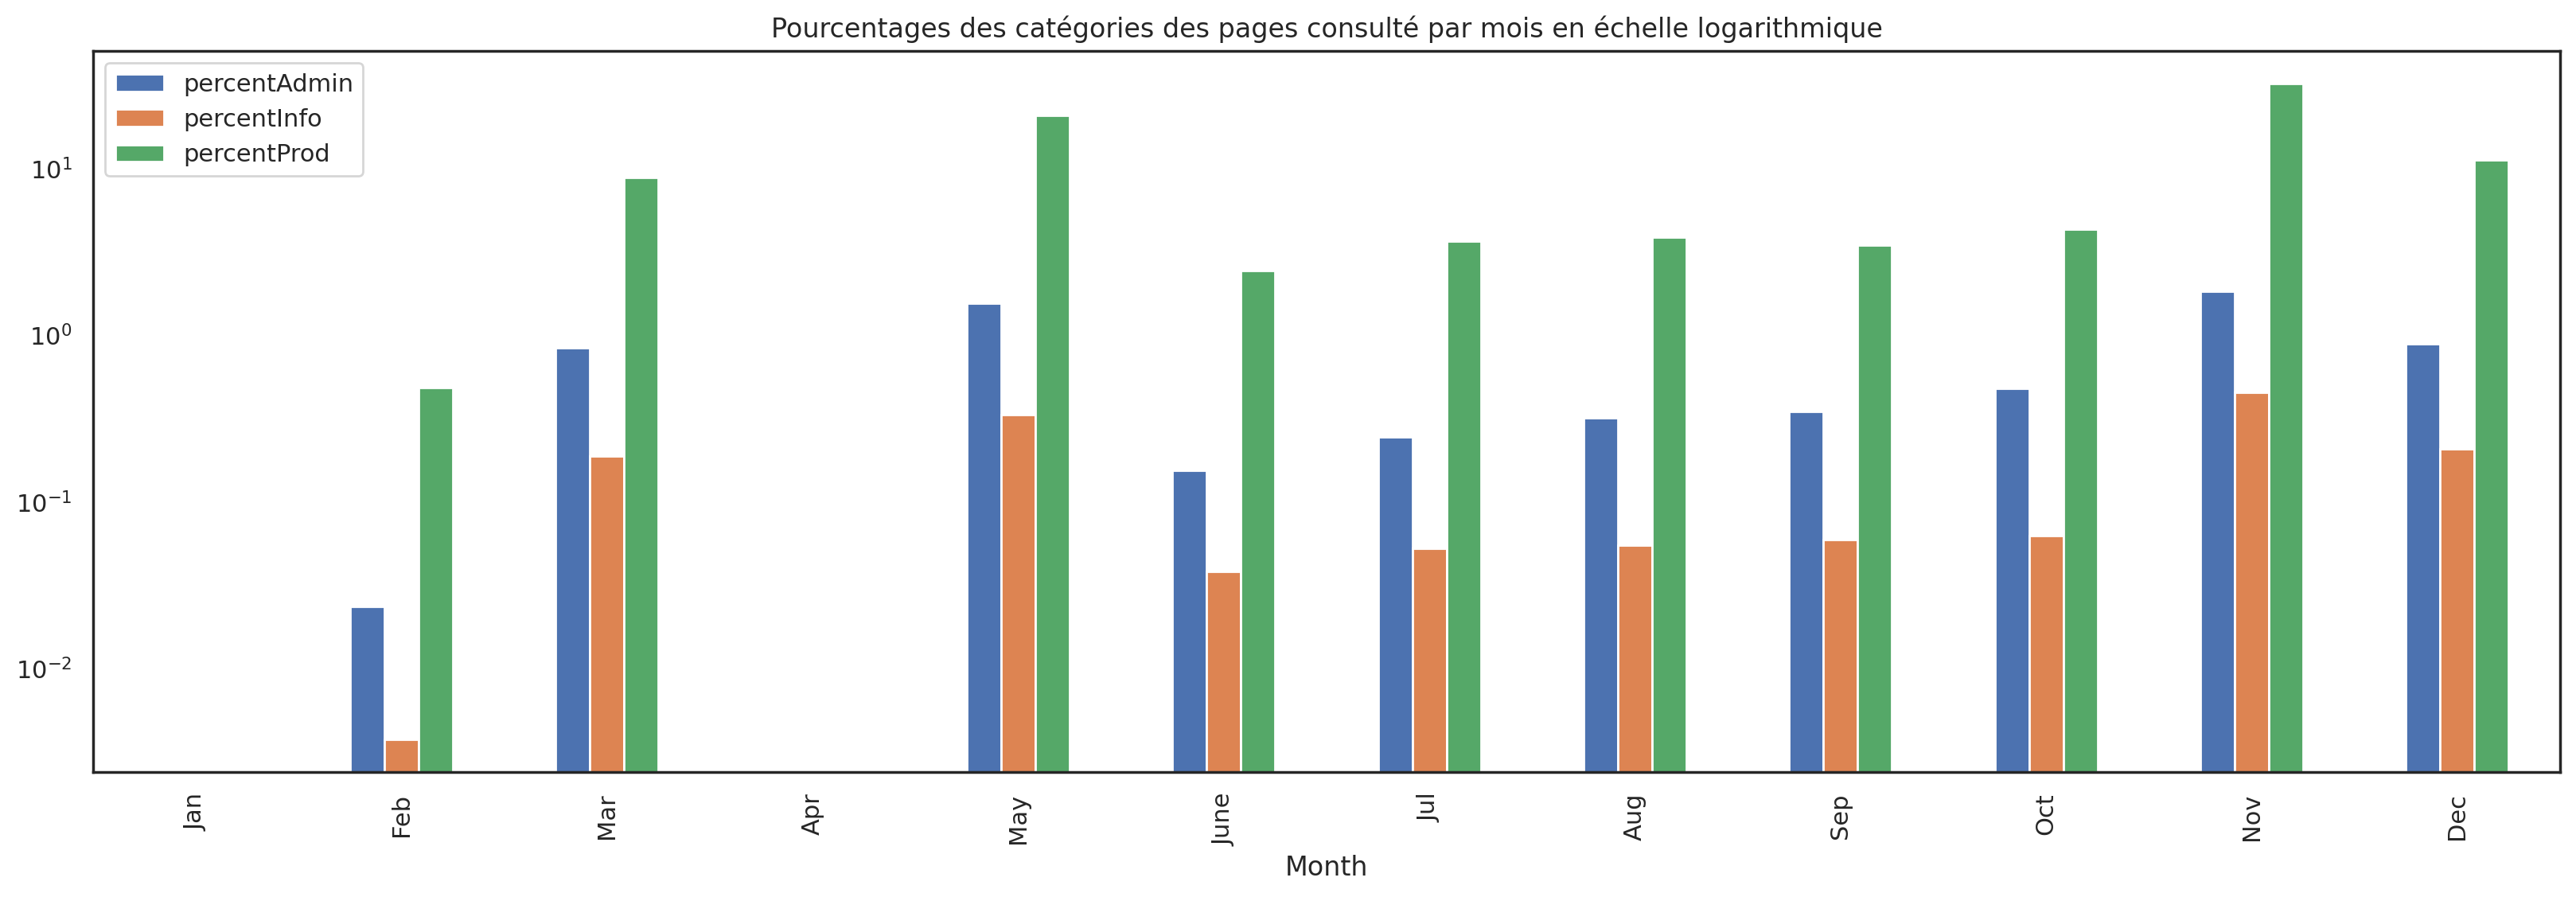

In [ ]:
Shoppers[["Month","percentAdmin","percentInfo","percentProd"]].groupby("Month").sum().fillna(0).plot(title="Pourcentages des catégories des pages consulté par mois en échelle logarithmique",kind='bar',logy=True)

In [ ]:
PercentperMonth = Shoppers[["Month","percentAdmin","percentInfo","percentProd"]].groupby("Month").sum().fillna(0)
PercentperMonth

percentAdmin  percentInfo  percentProd
Month                                        
Jan        0.000000     0.000000     0.000000
Feb        0.023474     0.003756     0.483094
Mar        0.845062     0.188261     8.867288
Apr        0.000000     0.000000     0.000000
May        1.551629     0.334739    20.916470
June       0.153754     0.038028     2.438240
Jul        0.245772     0.052347     3.691984
Aug        0.318776     0.055164     3.888696
Sep        0.350701     0.059624     3.481423
Oct        0.479338     0.062910     4.325781
Nov        1.842001     0.454925    32.399696
Dec        0.890367     0.207745    11.348954

In [ ]:
MaxperMonth = PercentperMonth.sum(axis = 1).to_frame(name="total")
MaxperMonth

total
Month           
Jan     0.000000
Feb     0.510324
Mar     9.900611
Apr     0.000000
May    22.802838
June    2.630022
Jul     3.990103
Aug     4.262636
Sep     3.891747
Oct     4.868029
Nov    34.696623
Dec    12.447066

In [ ]:
MaxAndPercentPerMonth = pd.merge(MaxperMonth, PercentperMonth, on="Month")
MaxAndPercentPerMonth

total  percentAdmin  percentInfo  percentProd
Month                                                   
Jan     0.000000      0.000000     0.000000     0.000000
Feb     0.510324      0.023474     0.003756     0.483094
Mar     9.900611      0.845062     0.188261     8.867288
Apr     0.000000      0.000000     0.000000     0.000000
May    22.802838      1.551629     0.334739    20.916470
June    2.630022      0.153754     0.038028     2.438240
Jul     3.990103      0.245772     0.052347     3.691984
Aug     4.262636      0.318776     0.055164     3.888696
Sep     3.891747      0.350701     0.059624     3.481423
Oct     4.868029      0.479338     0.062910     4.325781
Nov    34.696623      1.842001     0.454925    32.399696
Dec    12.447066      0.890367     0.207745    11.348954

In [ ]:
def percentage_of_view(df):
  for k in range(0,len(df)):
    if df.total[k] !=0: 
      df["percentAdmin"][k]=df.percentAdmin[k]/df.total[k]
      df["percentInfo"][k]=df.percentInfo[k]/df.total[k]
      df["percentProd"][k]=df.percentProd[k]/df.total[k]
      if df["percentAdmin"][k] +   df["percentInfo"][k]   + df["percentProd"][k] != 1:
        print("at k =",k, "error %f ", df["percentAdmin"][k] +   df["percentInfo"][k]   + df["percentProd"][k])
  return df

TotalAndPercentPerMonth = percentage_of_view(pd.merge(MaxperMonth, PercentperMonth, on="Month"))
TotalAndPercentPerMonth

at k = 5 error %f  0.9999999999999999
at k = 6 error %f  0.9999999999999999
at k = 8 error %f  0.9999999999999999


total  percentAdmin  percentInfo  percentProd
Month                                                   
Jan     0.000000      0.000000     0.000000     0.000000
Feb     0.510324      0.045998     0.007360     0.946642
Mar     9.900611      0.085355     0.019015     0.895630
Apr     0.000000      0.000000     0.000000     0.000000
May    22.802838      0.068045     0.014680     0.917275
June    2.630022      0.058461     0.014459     0.927080
Jul     3.990103      0.061595     0.013119     0.925285
Aug     4.262636      0.074784     0.012941     0.912275
Sep     3.891747      0.090114     0.015321     0.894565
Oct     4.868029      0.098467     0.012923     0.888610
Nov    34.696623      0.053089     0.013112     0.933800
Dec    12.447066      0.071532     0.016690     0.911777

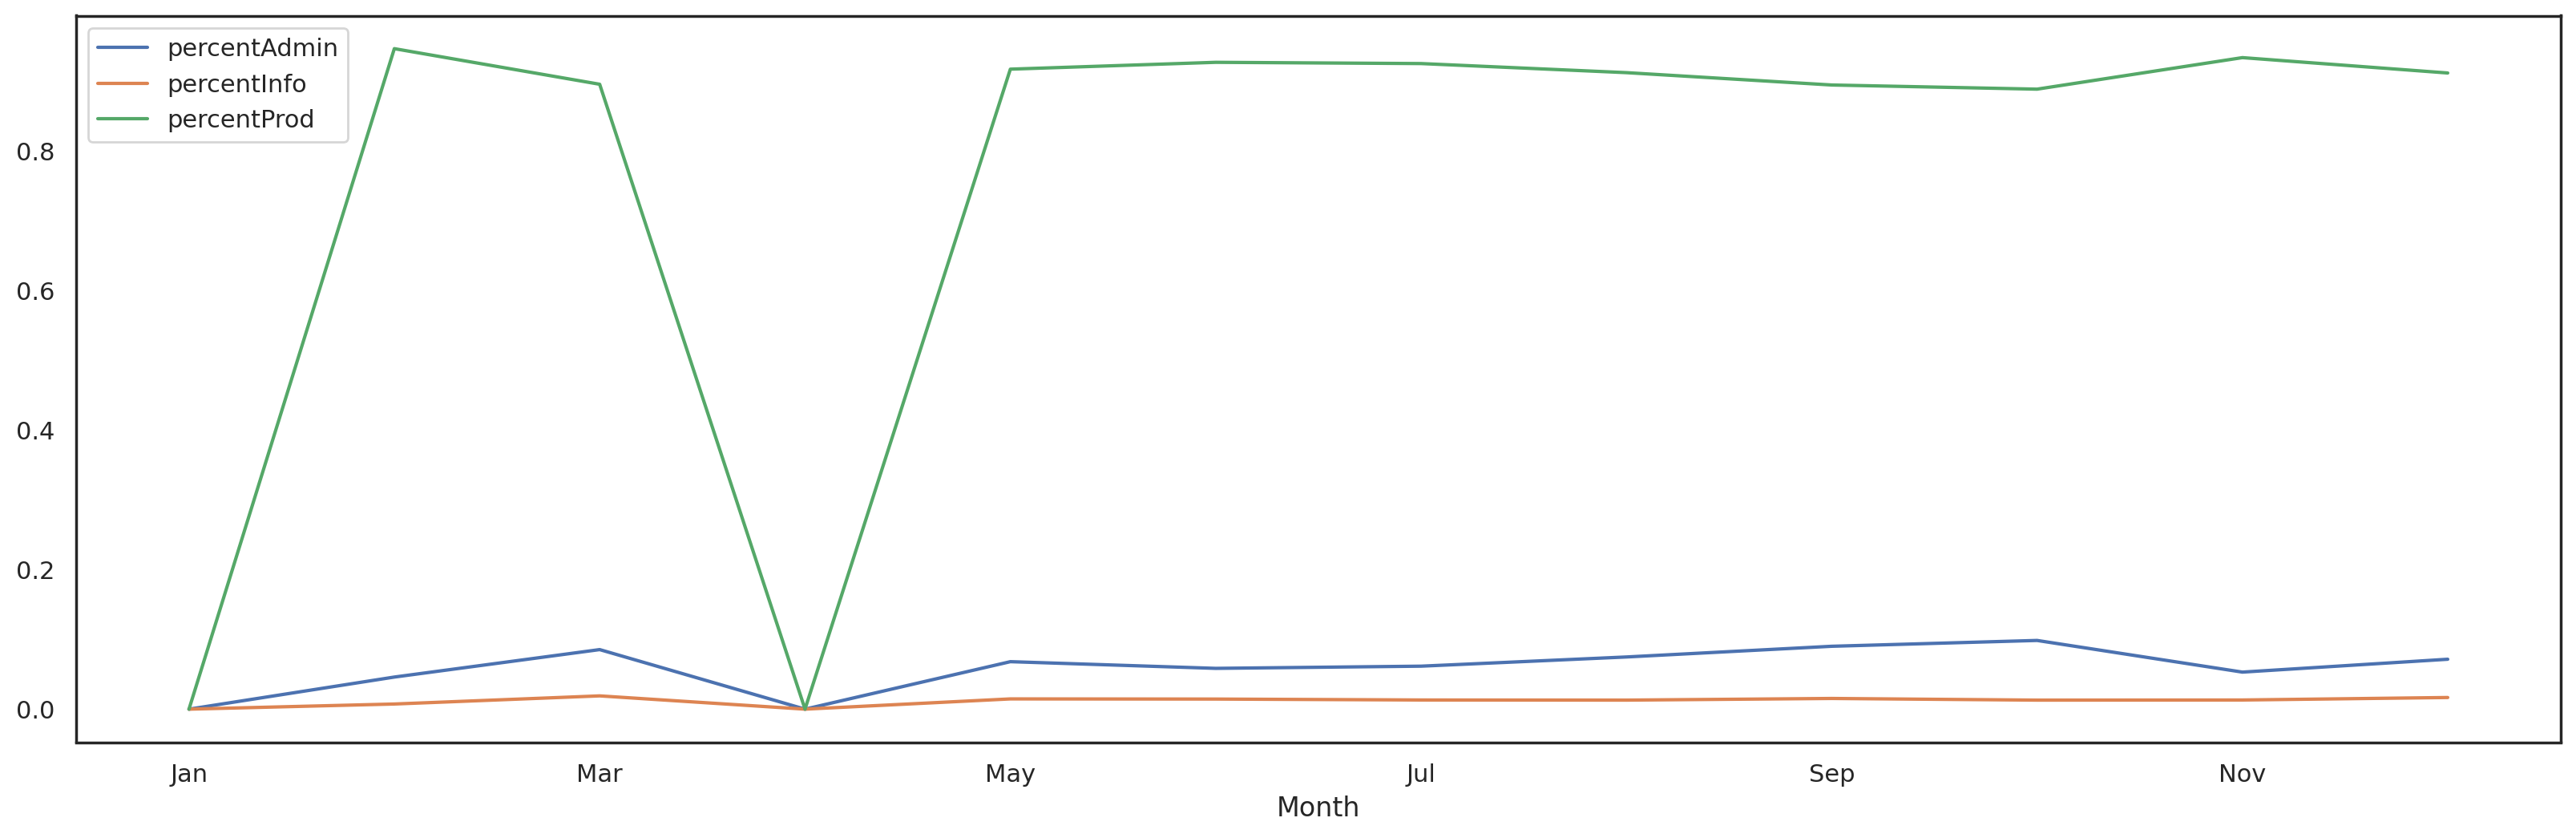

In [ ]:
TotalAndPercentPerMonth[["percentAdmin","percentInfo","percentProd"]].plot()

### IV/ Est-ce que les utilisateurs ont un comportement différent le WE ?

at k = 0 error %f  1.0000000000000002


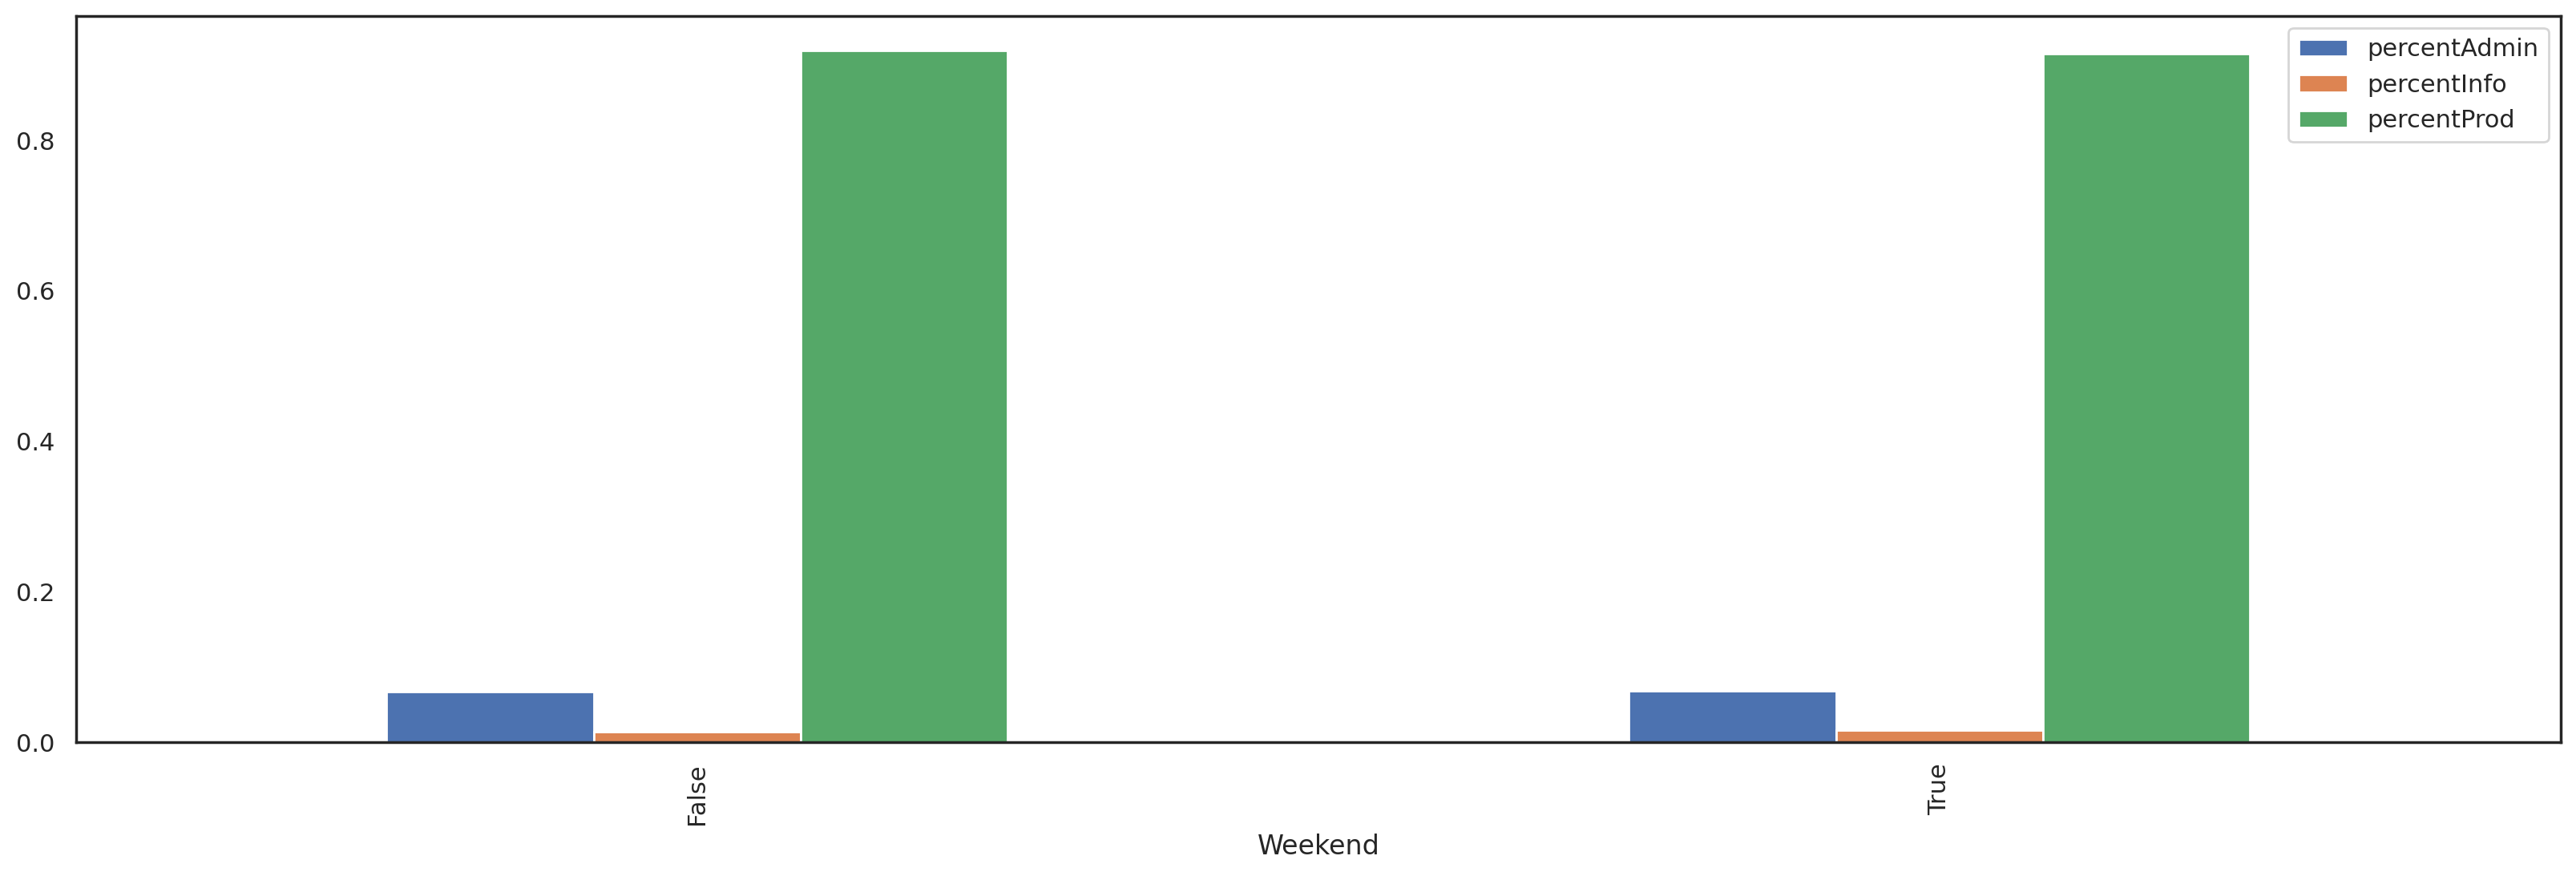

In [ ]:
PercentOfPageView_inweekEnd =percentage_of_view(pd.merge(Shoppers[["Weekend","percentAdmin","percentInfo","percentProd"]].groupby("Weekend").sum().fillna(0), Shoppers[["Weekend","percentAdmin","percentInfo","percentProd"]].groupby("Weekend").sum().fillna(0).sum(axis = 1).to_frame(name="total"), on="Weekend"))[["percentAdmin","percentInfo","percentProd"]]
PercentOfPageView_inweekEnd.plot(kind='bar')

In [ ]:
PercentOfPageView_inweekEnd

percentAdmin  percentInfo  percentProd
Weekend                                        
False        0.066510     0.014041     0.919449
True         0.068562     0.016240     0.915198

Nous voyons sur le graphique aucune difference notable, de meme en regardant les résultats numériques, il y a un maximum de 1% d'écart, ce qui ne permet pas d'affirmer un changement manisfeste de comportement le week end 

### V/ Est-ce que la proportion d'achat change avec les mois ?

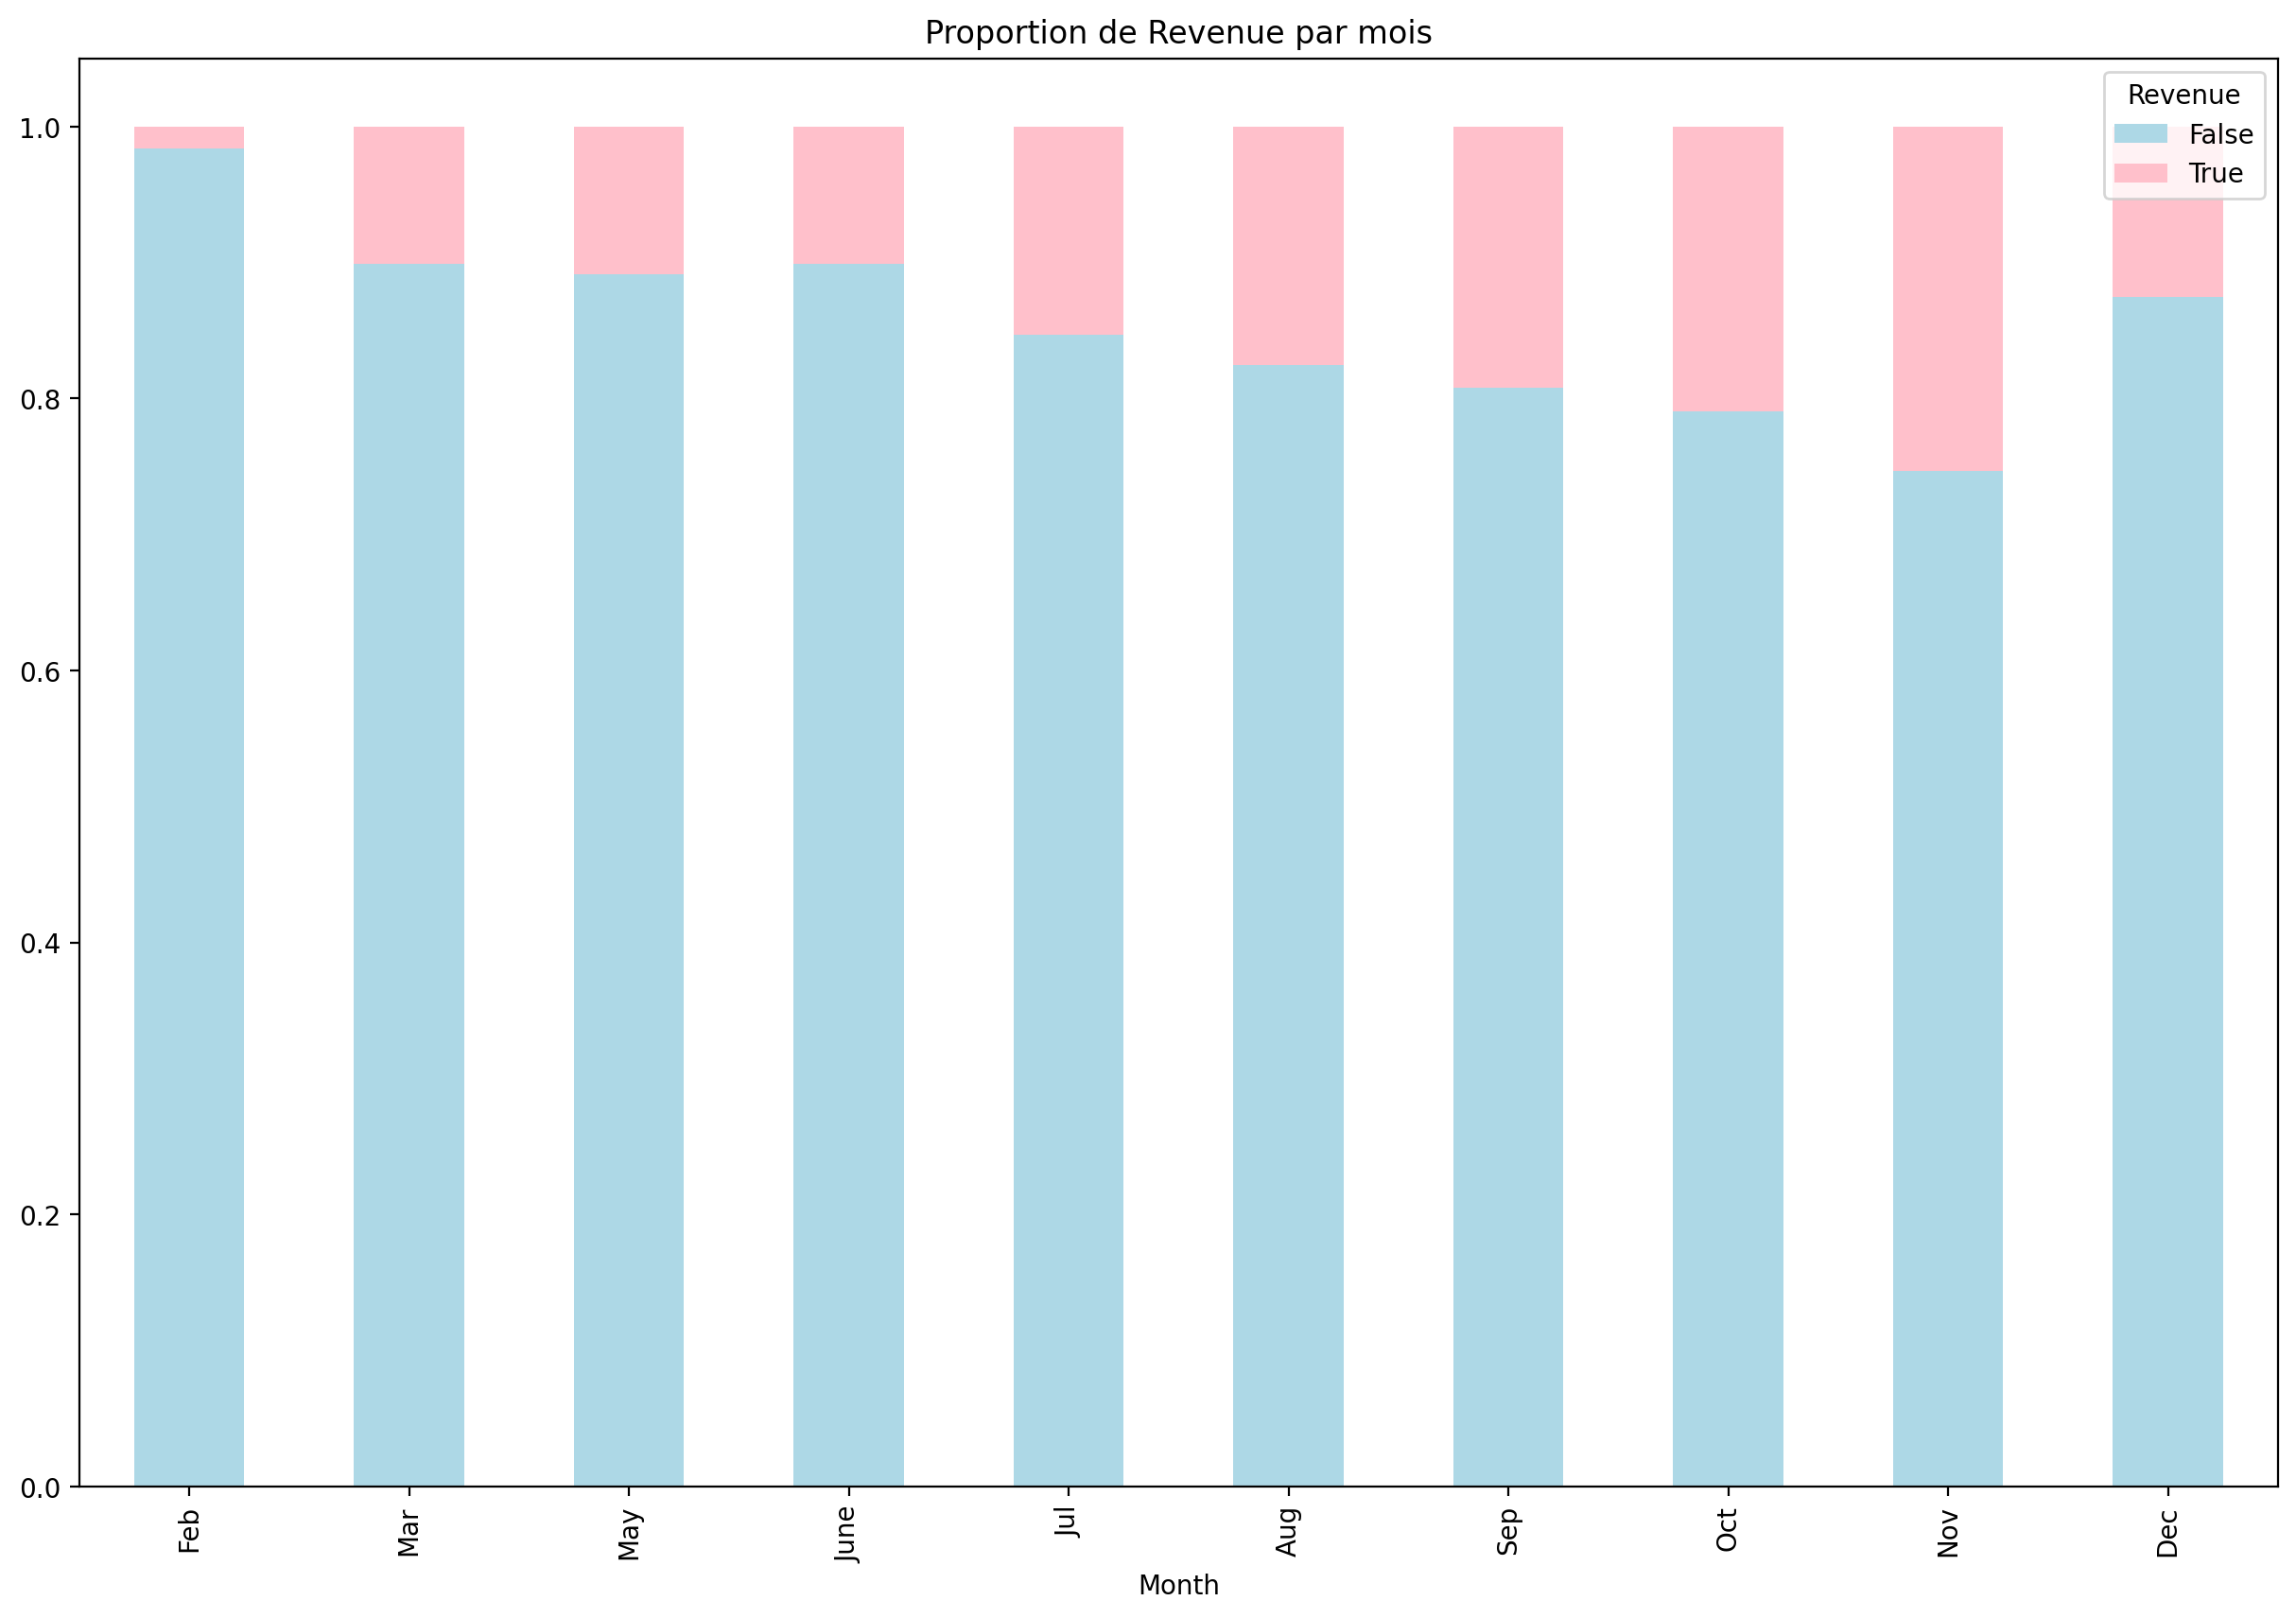

In [ ]:
df = pd.crosstab(Shoppers['Month'], Shoppers['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightblue', 'pink'])
plt.title('Proportion de Revenue par mois')
plt.show()

On peut noter que les mois d'Août à Novembre offrent une plus grande proportion d'achat par visite. Ceci pourrait s'expliquer de différentes manières en fonction du type de services / fournitures vendues par le site.

Nous pouvons également regarder ce que donne les proportions pour les changements semaine hors week-end et week-end.

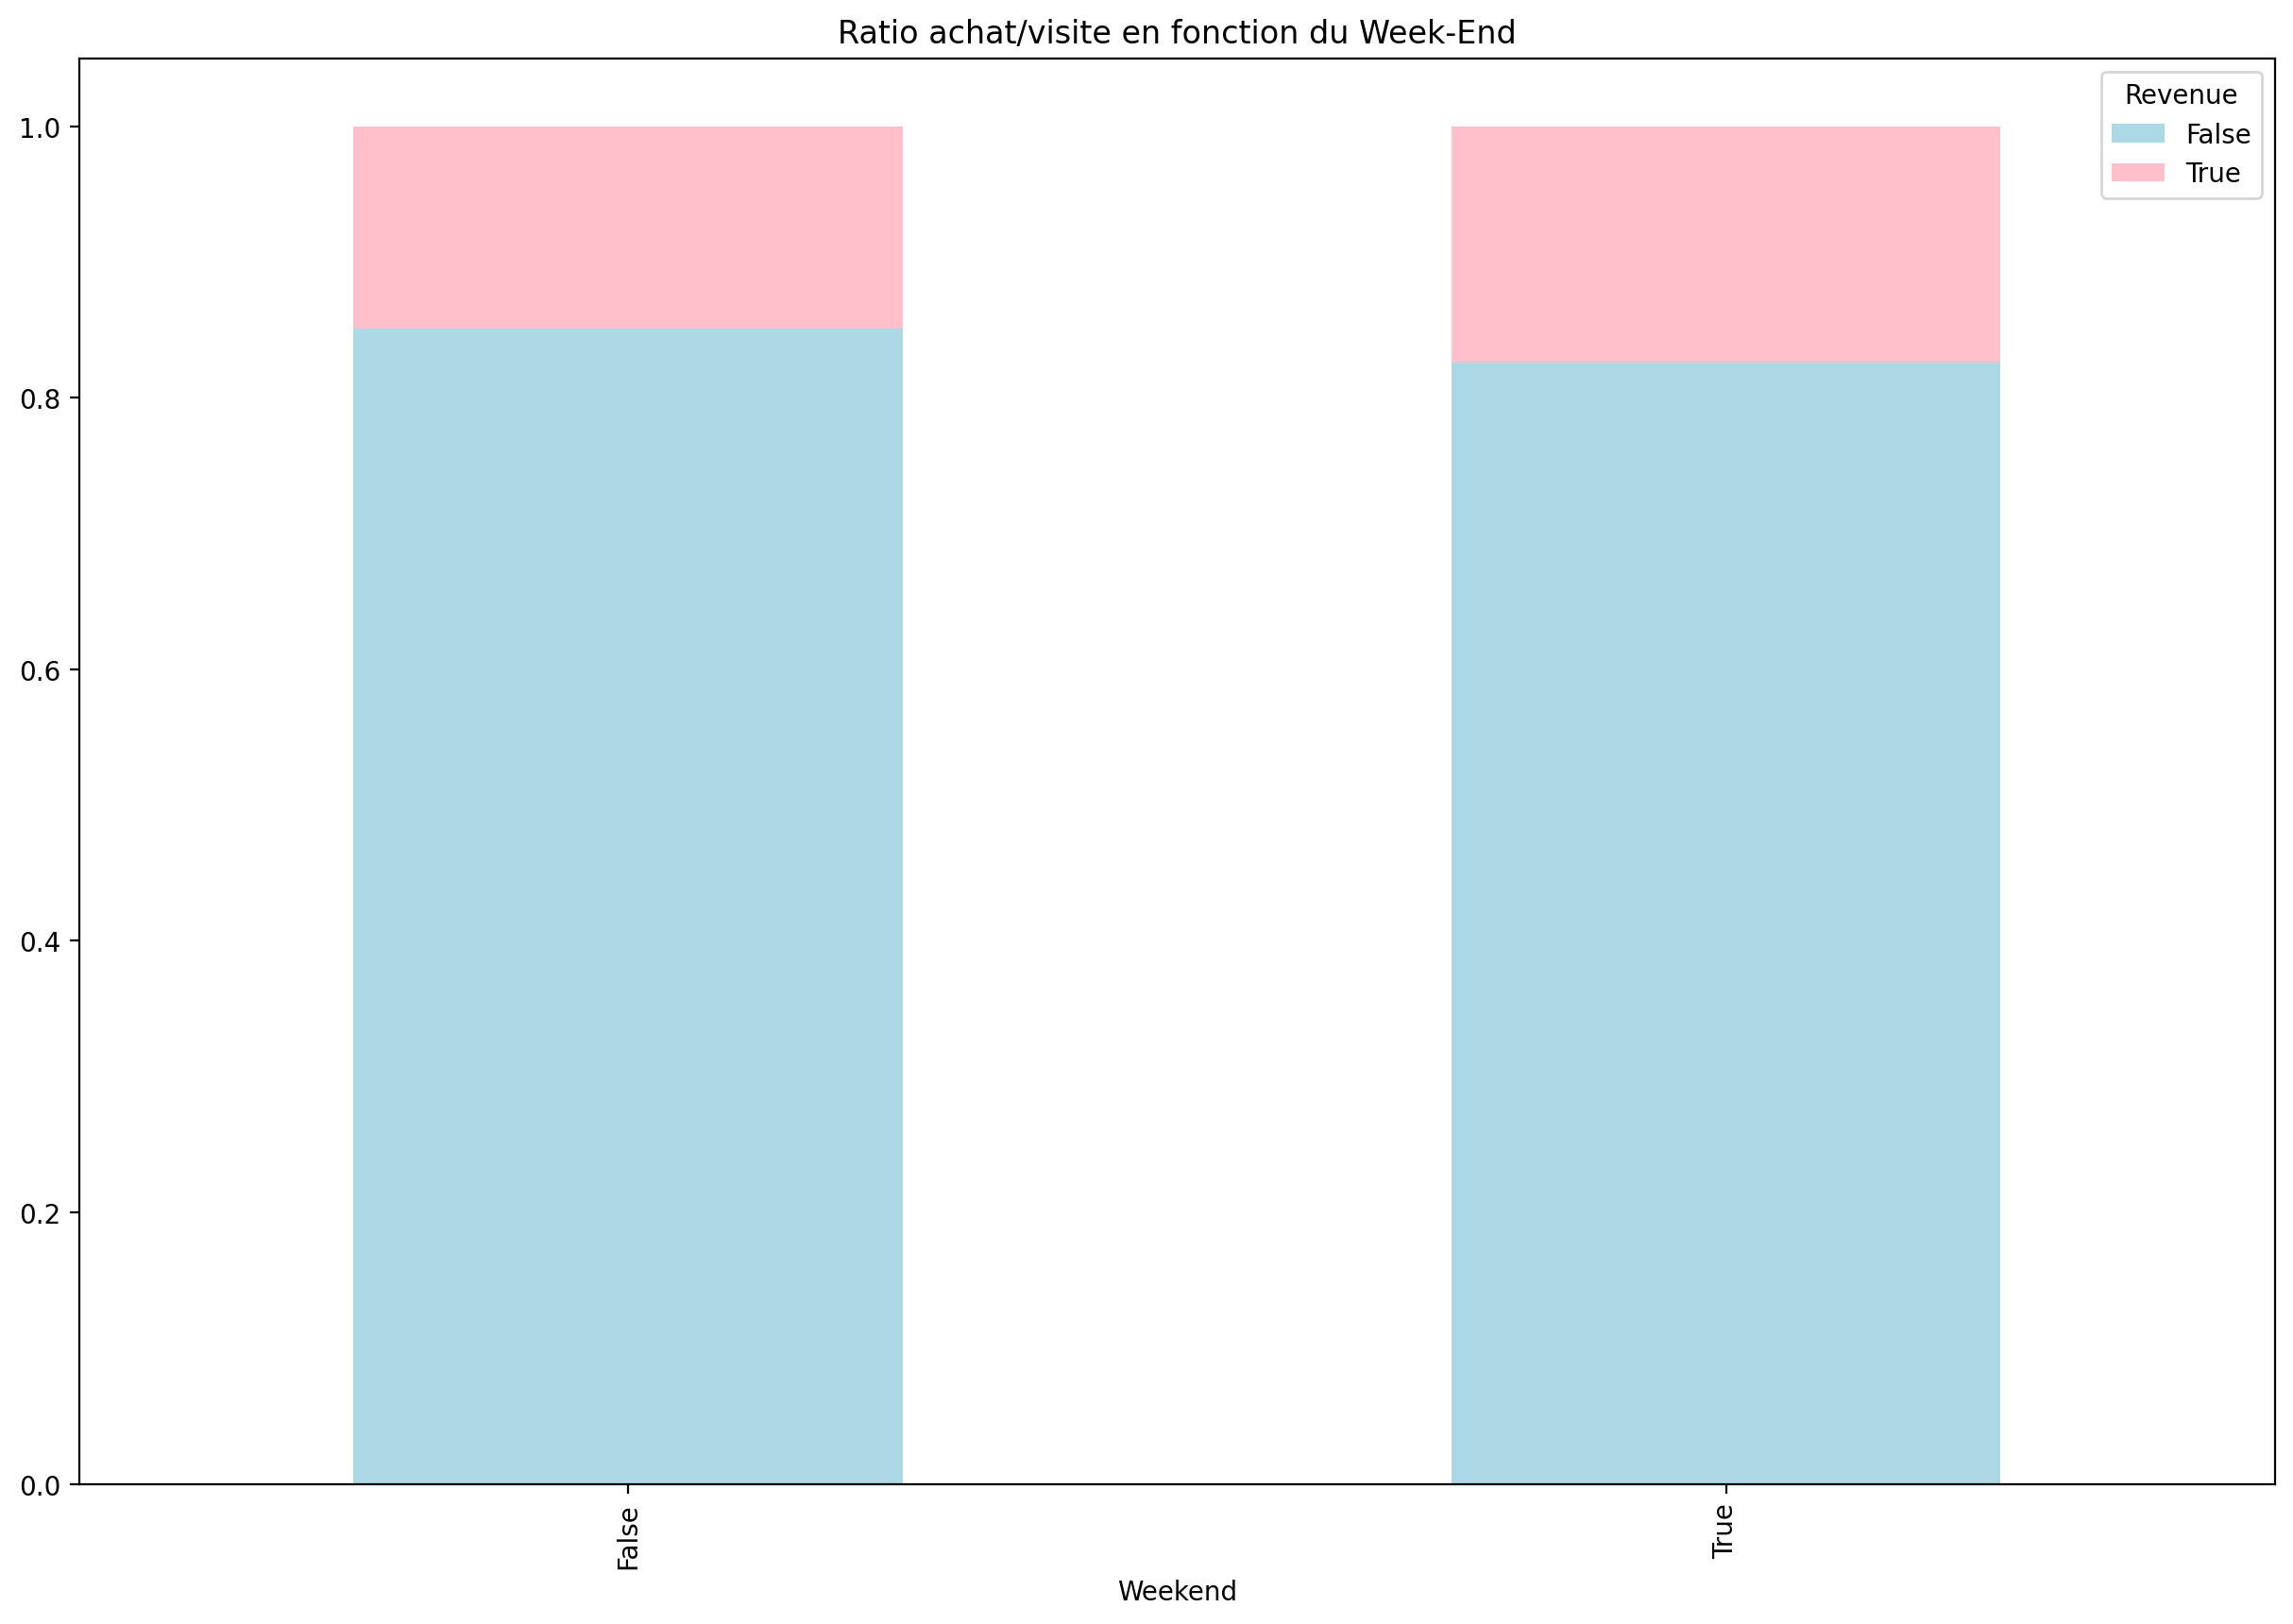

In [ ]:
df = pd.crosstab(Shoppers['Weekend'], Shoppers['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightblue', 'pink'])
plt.title('Ratio achat/visite en fonction du Week-End')
plt.show()

On constate qu'il n'y a aucune différence sur le ratio achat/visite entre le week-end et le reste de la semaine

# Partie 2 Machine Learning

## KMeans

### Training

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

Nous crééeons une nouvelle colonne qui contient le numéro du mois plutôt que son nom afin de faire du clustering

In [ ]:
MonthDic = { 1:"Jan",2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
MonthDic = {v: k for k, v in MonthDic.items()}
#months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Shoppers['NumMonth']=Shoppers['Month'].replace(MonthDic)
Shoppers.head()

Administrative  Administrative_Duration  ...  TotalView  NumMonth
0               0                      0.0  ...          1         2
1               0                      0.0  ...          2         2
2               0                      0.0  ...          1         2
3               0                      0.0  ...          2         2
4               0                      0.0  ...         10         2

[5 rows x 26 columns]

Ici nous créons une copie de notre dataframe, dans laquelle nous convertissons VisitorType à partir d'un algorithme type ToCategorical et nous supprimons la colonne contennant le nom du mois.

In [ ]:
ShoppersNum = Shoppers.copy()
ShoppersNum.drop(['Month'], axis='columns', inplace=True)

new_visitor = []
other_visitor = []
returning_visitor = []

for i in range(0, len(Shoppers)):
  if Shoppers['VisitorType'][i] == "New_Visitor":
    new_visitor.append(1)
    other_visitor.append(0)
    returning_visitor.append(0)
  if Shoppers['VisitorType'][i] == "Returning_Visitor":
    new_visitor.append(0)
    other_visitor.append(0)
    returning_visitor.append(1)
  if Shoppers['VisitorType'][i] == "Other":
    new_visitor.append(0)
    other_visitor.append(1)
    returning_visitor.append(0)

ShoppersNum["New_Visitor"] = new_visitor
ShoppersNum["Returning_Visitor"] = returning_visitor
ShoppersNum["Other_Visitor"] = other_visitor
ShoppersNum.drop(['VisitorType', 'percentAdmin', 'percentInfo', 'percentProd', 'MostVisitedPage'], axis='columns', inplace=True)
ShoppersNum.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Weekend                       bool
Revenue                       bool
Number                       int64
TotalDuration              float64
TotalView                    int64
NumMonth                     int64
New_Visitor                  int64
Returning_Visitor            int64
Other_Visitor                int64
dtype: object

Avec ce nouveau dataframe nous pouvons appliquer un clustering par KMeans :

In [ ]:
K = 5

kmeans_model = KMeans(n_clusters=K, n_init = 100, max_iter = 300, tol = 0.01, random_state=1).fit(ShoppersNum.iloc[0:12330])
labels = kmeans_model.labels_
SSE = kmeans_model.inertia_

print("SSE : ", SSE)
type(SSE)

SSE :  12600948332.077074


numpy.float64

Intéressons nous maintenant aux variations des paramètres de notre Kmenas. Tout d'abord le nombre de cluster et le n initial :

In [ ]:
SSE_matrix = np.zeros((14,14))

for k in range (1,15):
  for n in range (1,15):
    kmeans_model = KMeans(n_clusters=k, n_init = n*10, max_iter = 300, tol = 0.001, random_state=1).fit(ShoppersNum.iloc[0:12330])
    SSE = kmeans_model.inertia_
    SSE_matrix[k-1][n-1] = SSE

print(SSE_matrix)

[[9.70337185e+10 9.70337185e+10 9.70337185e+10 9.70337185e+10
  9.70337185e+10 9.70337185e+10 9.70337185e+10 9.70337185e+10
  9.70337185e+10 9.70337185e+10 9.70337185e+10 9.70337185e+10
  9.70337185e+10 9.70337185e+10]
 [4.59267064e+10 4.59267064e+10 4.59267064e+10 4.59267064e+10
  4.59267064e+10 4.59267064e+10 4.59267064e+10 4.59267064e+10
  4.59265765e+10 4.59265765e+10 4.59265765e+10 4.59265765e+10
  4.59265765e+10 4.59265765e+10]
 [2.82594179e+10 2.82594179e+10 2.82593984e+10 2.82593984e+10
  2.82593984e+10 2.82593984e+10 2.82593984e+10 2.82593984e+10
  2.82593984e+10 2.82593984e+10 2.82593984e+10 2.82593984e+10
  2.82593984e+10 2.82593984e+10]
 [1.84457007e+10 1.84457007e+10 1.84457007e+10 1.84453594e+10
  1.84444401e+10 1.84444106e+10 1.84444106e+10 1.84444106e+10
  1.84444106e+10 1.84441333e+10 1.84441333e+10 1.84441333e+10
  1.84441333e+10 1.84441333e+10]
 [1.26010022e+10 1.26010022e+10 1.26010022e+10 1.26010022e+10
  1.26010022e+10 1.26010022e+10 1.26009483e+10 1.26009483e+10


Voici nos meilleurs résultats :

In [ ]:
mini = SSE_matrix[0][0]
k = 0
n = 0
for i in range(0,14):
  for j in range(0,14):
    if SSE_matrix[i][j] < mini:
      mini = SSE_matrix[i][j]
      k = i
      n = j

print(k+1,(n+1)*10)

14 40


Faisons varier cette fois-ci le taux d'apprentissage et le nombre d'itération maximale en prenant n et k trouvé précédemment :

In [ ]:
SSE_matrix_bis = np.zeros((14,14))

for t in range (1,15):
  for m in range (1,15):
    kmeans_model = KMeans(n_clusters=14, n_init = 40, max_iter = 100*m, tol = 0.0001*t, random_state=1).fit(ShoppersNum.iloc[0:12330])
    SSE = kmeans_model.inertia_
    SSE_matrix_bis[t-1][m-1] = float(SSE)

print(SSE_matrix_bis)

[[2.14530018e+09 2.14530018e+09 2.14530018e+09 2.14530018e+09
  2.14530018e+09 2.14530018e+09 2.14530018e+09 2.14530018e+09
  2.14530018e+09 2.14530018e+09 2.14530018e+09 2.14530018e+09
  2.14530018e+09 2.14530018e+09]
 [2.14530018e+09 2.14530018e+09 2.14530018e+09 2.14530018e+09
  2.14530018e+09 2.14530018e+09 2.14530018e+09 2.14530018e+09
  2.14530018e+09 2.14530018e+09 2.14530018e+09 2.14530018e+09
  2.14530018e+09 2.14530018e+09]
 [2.14530018e+09 2.14530018e+09 2.14530018e+09 2.14530018e+09
  2.14530018e+09 2.14530018e+09 2.14530018e+09 2.14530018e+09
  2.14530018e+09 2.14530018e+09 2.14530018e+09 2.14530018e+09
  2.14530018e+09 2.14530018e+09]
 [2.14534368e+09 2.14534368e+09 2.14534368e+09 2.14534368e+09
  2.14534368e+09 2.14534368e+09 2.14534368e+09 2.14534368e+09
  2.14534368e+09 2.14534368e+09 2.14534368e+09 2.14534368e+09
  2.14534368e+09 2.14534368e+09]
 [2.14534368e+09 2.14534368e+09 2.14534368e+09 2.14534368e+09
  2.14534368e+09 2.14534368e+09 2.14534368e+09 2.14534368e+09


Voici nos meilleurs résultats :

In [ ]:
mini = SSE_matrix_bis[0][0]
t = 0
m = 0
for i in range(0,14):
  for j in range(0,14):
    if SSE_matrix_bis[i][j] != 0:
      if SSE_matrix_bis[i][j] < mini:
        mini = SSE_matrix_bis[i][j]
        t = i
        m = j

print(0.0001*(t+1),(m+1)*100)

0.0001 100


Nous pouvons maintenant voir notre résultat le plus correct :

In [ ]:
kmeans_model = KMeans(n_clusters=13, n_init = 30, max_iter = 100, tol = 0.0001, random_state=1).fit(ShoppersNum.iloc[0:12330])
labels = kmeans_model.labels_
SSE = kmeans_model.inertia_

print(SSE)

2393679543.2221017


Et noter nos labels dans notre dataset dédié au clustering :

In [ ]:
ShoppersNum['Labels'] = labels
ShoppersNum.head()

Administrative  Administrative_Duration  ...  Other_Visitor  Labels
0               0                      0.0  ...              0      12
1               0                      0.0  ...              0      12
2               0                      0.0  ...              0      12
3               0                      0.0  ...              0      12
4               0                      0.0  ...              0       0

[5 rows x 24 columns]

### Visualisation des résultats pour K = 13

On peut maintenant regarder les moyennes et quartiles de chaque données par cluster :


In [ ]:
ShoppersNum[ShoppersNum.Labels==1].describe()

Administrative  Administrative_Duration  ...  Other_Visitor  Labels
count      473.000000               473.000000  ...     473.000000   473.0
mean         4.892178               184.286124  ...       0.004228     1.0
std          4.826547               280.653786  ...       0.064957     0.0
min          0.000000                 0.000000  ...       0.000000     1.0
25%          1.000000                 9.000000  ...       0.000000     1.0
50%          4.000000                80.066667  ...       0.000000     1.0
75%          8.000000               225.250000  ...       0.000000     1.0
max         24.000000              1951.279141  ...       1.000000     1.0

[8 rows x 22 columns]

In [ ]:
ShoppersNum[ShoppersNum.Labels==6].describe()

Administrative  Administrative_Duration  ...  Other_Visitor  Labels
count      149.000000               149.000000  ...          149.0   149.0
mean         7.040268               229.627486  ...            0.0     6.0
std          4.864209               297.757244  ...            0.0     0.0
min          0.000000                 0.000000  ...            0.0     6.0
25%          3.000000                59.000000  ...            0.0     6.0
50%          7.000000               167.910714  ...            0.0     6.0
75%         10.000000               291.960094  ...            0.0     6.0
max         24.000000              2720.500000  ...            0.0     6.0

[8 rows x 22 columns]

On note par ces deux exemples que le nombre d'individus dans chaque cluster est très différent, mais on peut également noter de grandes différences sur certaines valeurs numériques par exemple sur ProductRelated_Duration.

Regardons maintenant la répartition des individus dans les 13 clusters :

Text(0.5, 1.0, "Nombre d'individus par cluster")

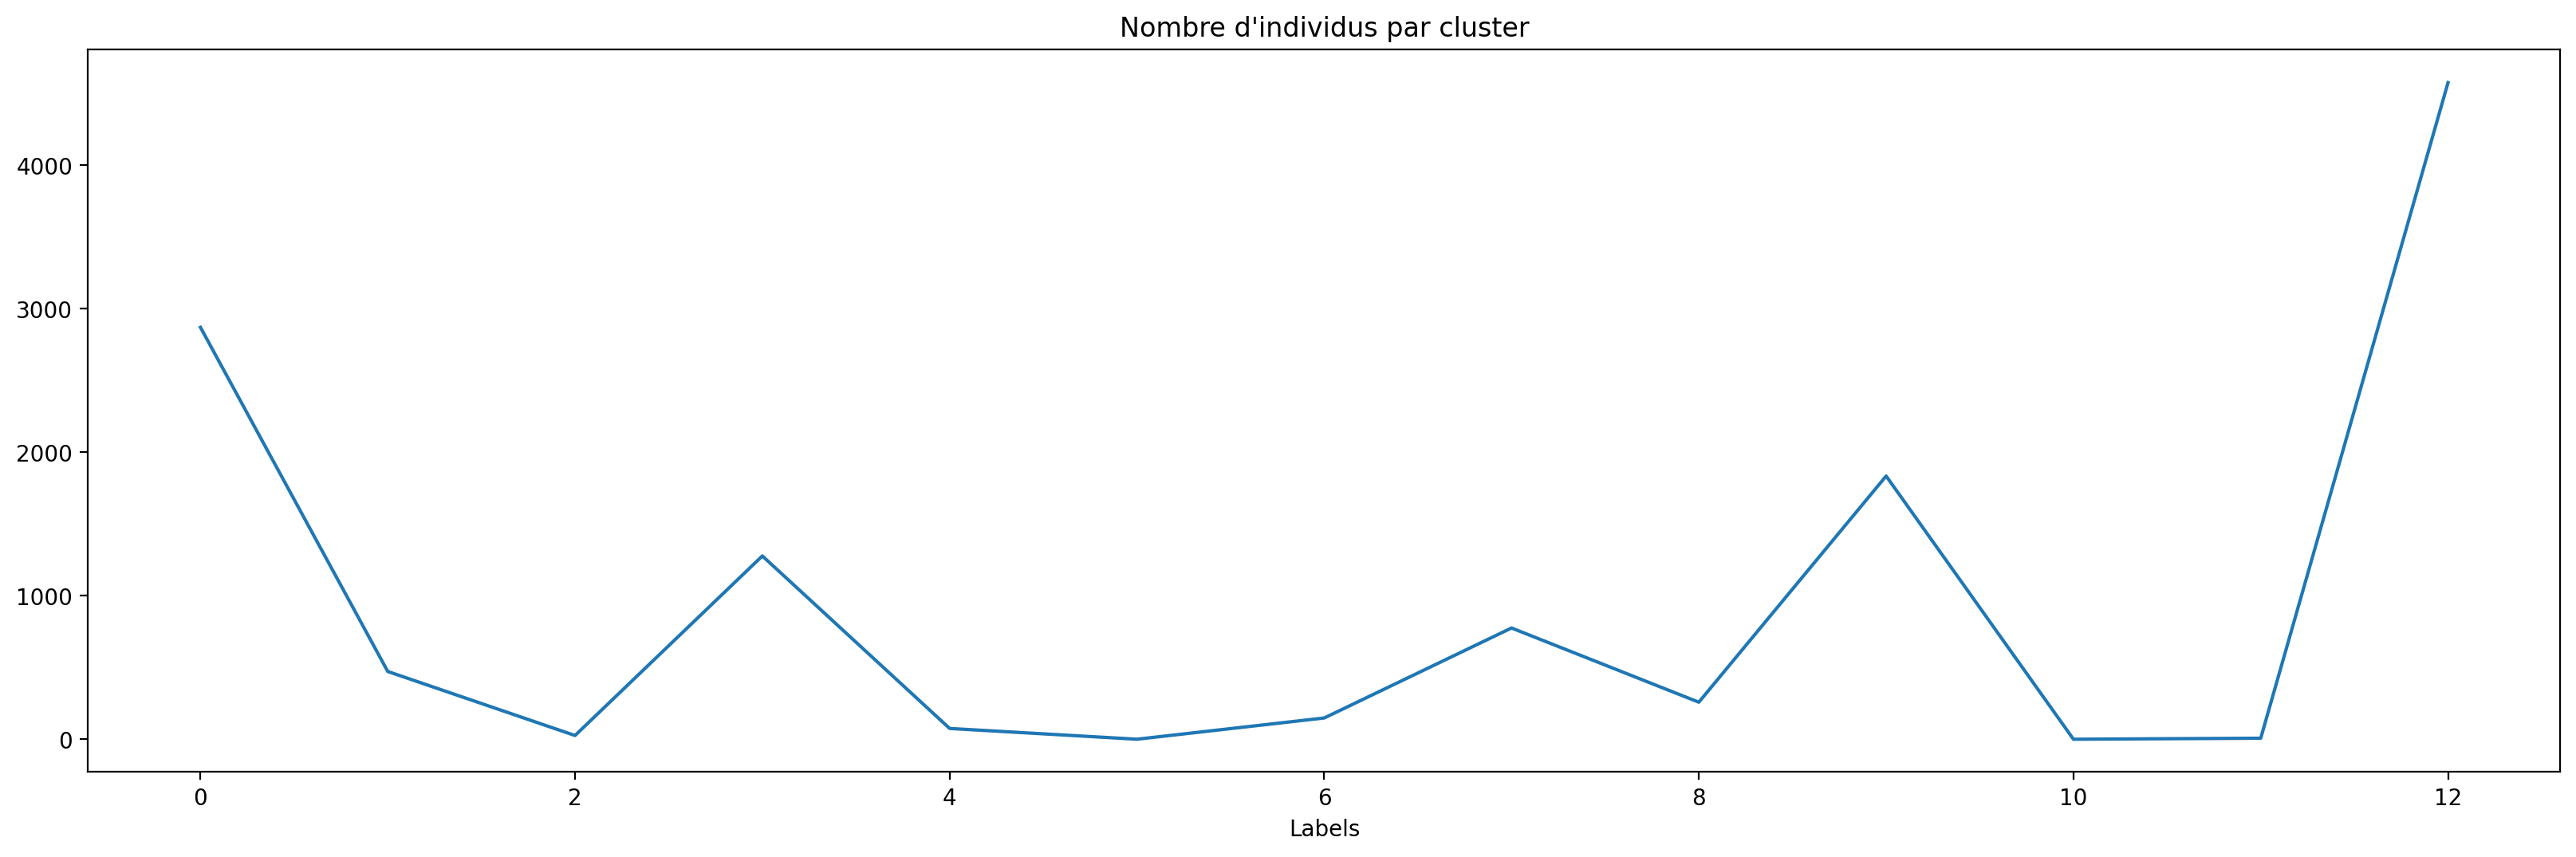

In [ ]:
ShoppersNum.groupby(["Labels"]).Administrative.count().plot()
plt.title("Nombre d'individus par cluster")

Text(0.5, 1.0, 'Moyenne des données numériques par cluster')

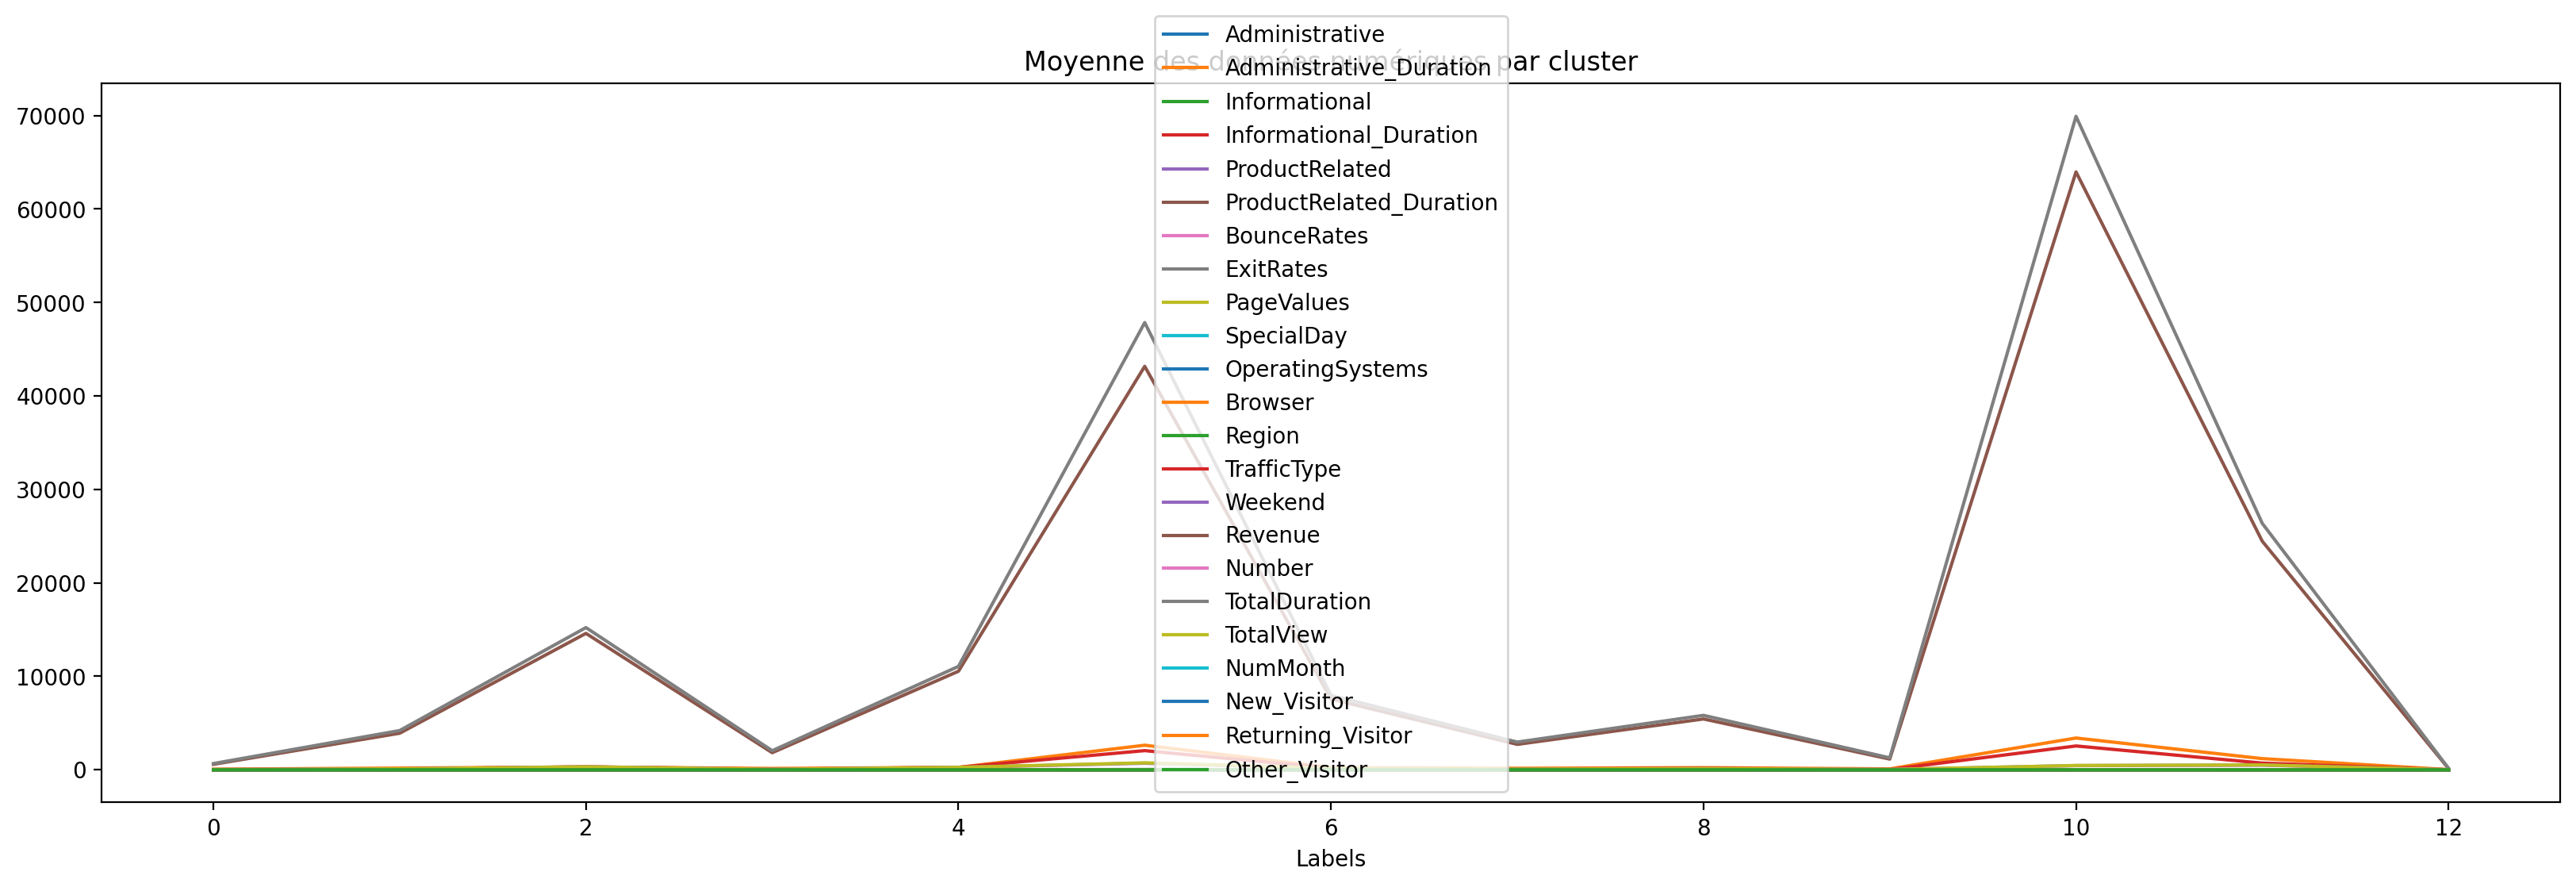

In [ ]:
ShoppersNum.groupby(["Labels"]).mean().plot()
plt.title("Moyenne des données numériques par cluster")

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f71b6705d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f71b6712748>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f71b669c208>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f71b6712e48>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f71b6712048>,
  <matplotlib.lines.Line2D at 0x7f71b66bde48>]}

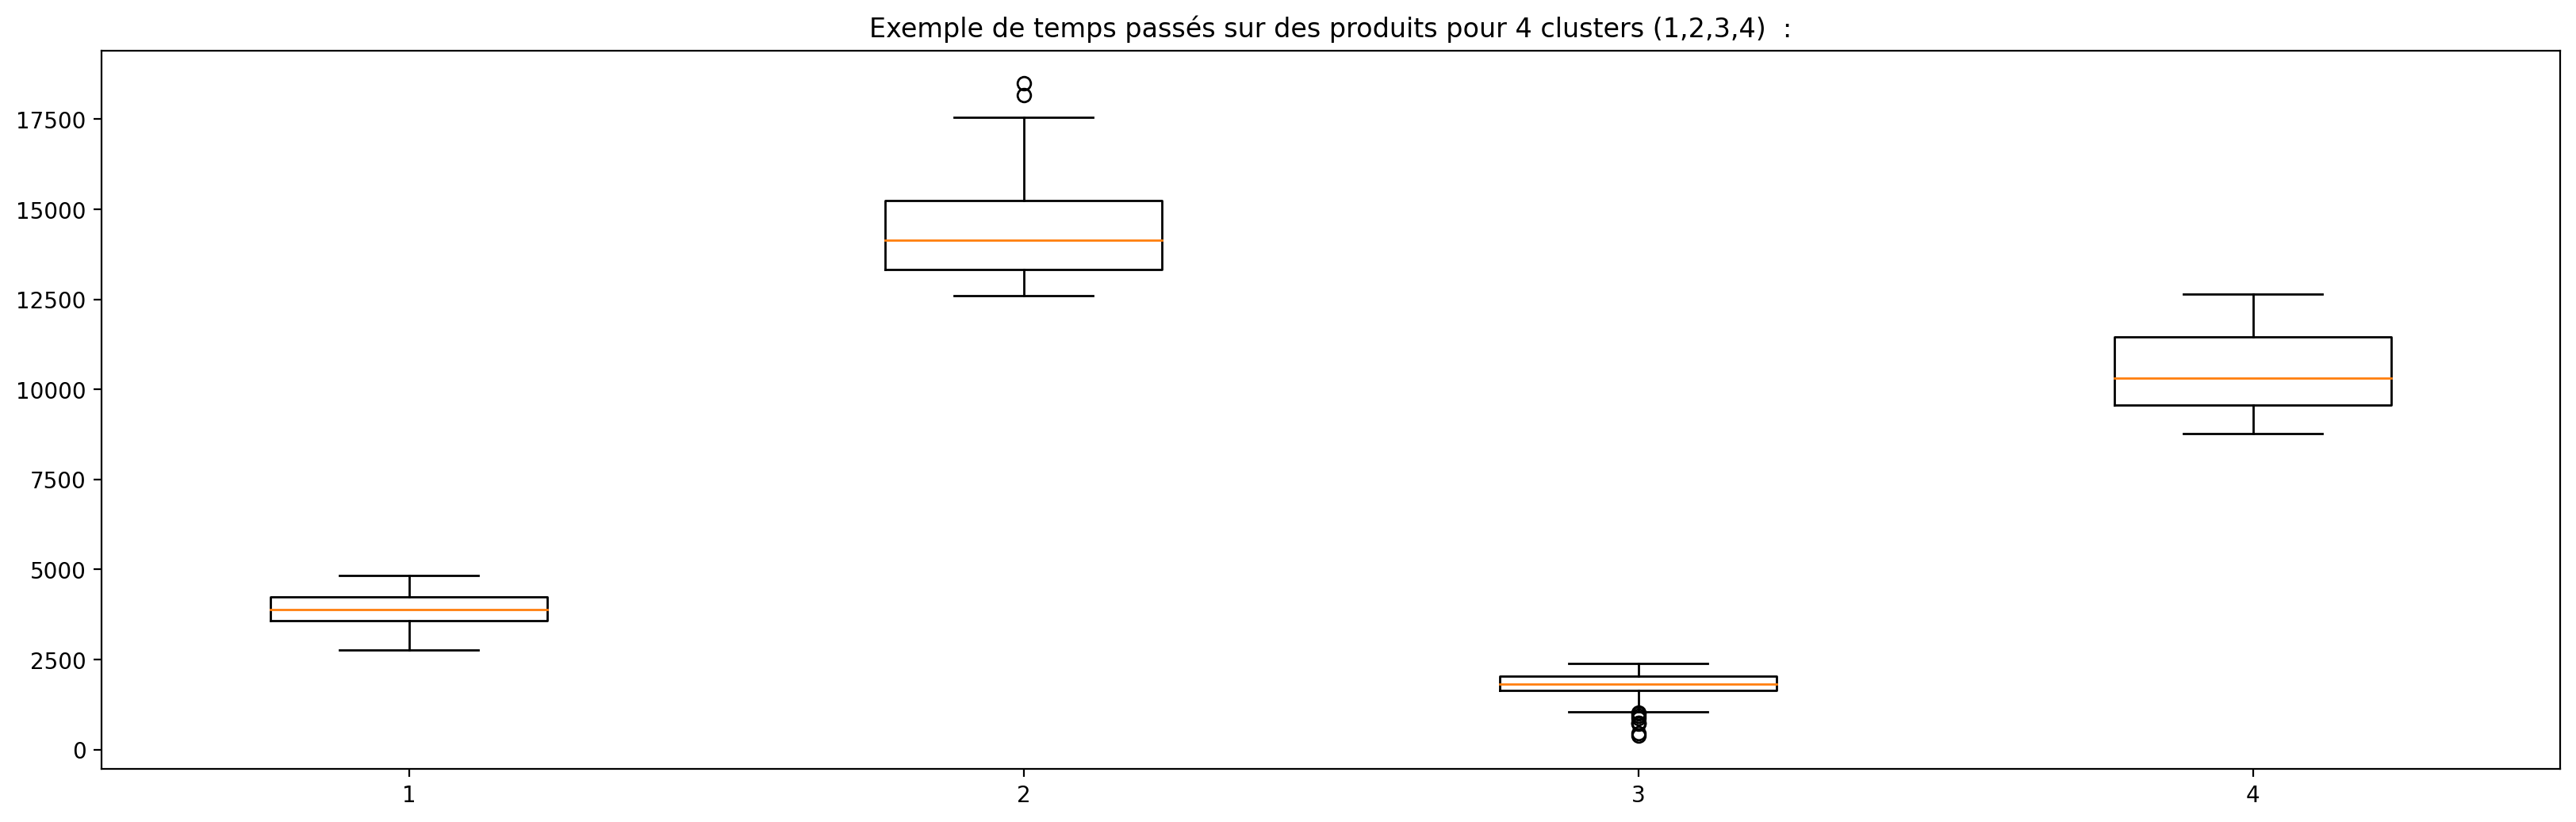

In [ ]:
data = [ShoppersNum[ShoppersNum.Labels==1].ProductRelated_Duration, ShoppersNum[ShoppersNum.Labels==2].ProductRelated_Duration, ShoppersNum[ShoppersNum.Labels==3].ProductRelated_Duration, ShoppersNum[ShoppersNum.Labels==4].ProductRelated_Duration]
fig7, ax7 = plt.subplots()
ax7.set_title('Exemple de temps passés sur des produits pour 4 clusters (1,2,3,4)  :')
ax7.boxplot(data)

On remarque en effet que ce facteur varie beaucoup d'un cluster à un autre comme attendu par le graphe précedent.

On peut maintenant s'intéresser au comportement des individus d'un certain cluster en fonction du mois par exemple :


Text(0.5, 1.0, 'Temps total passé sur des produits par cluster')

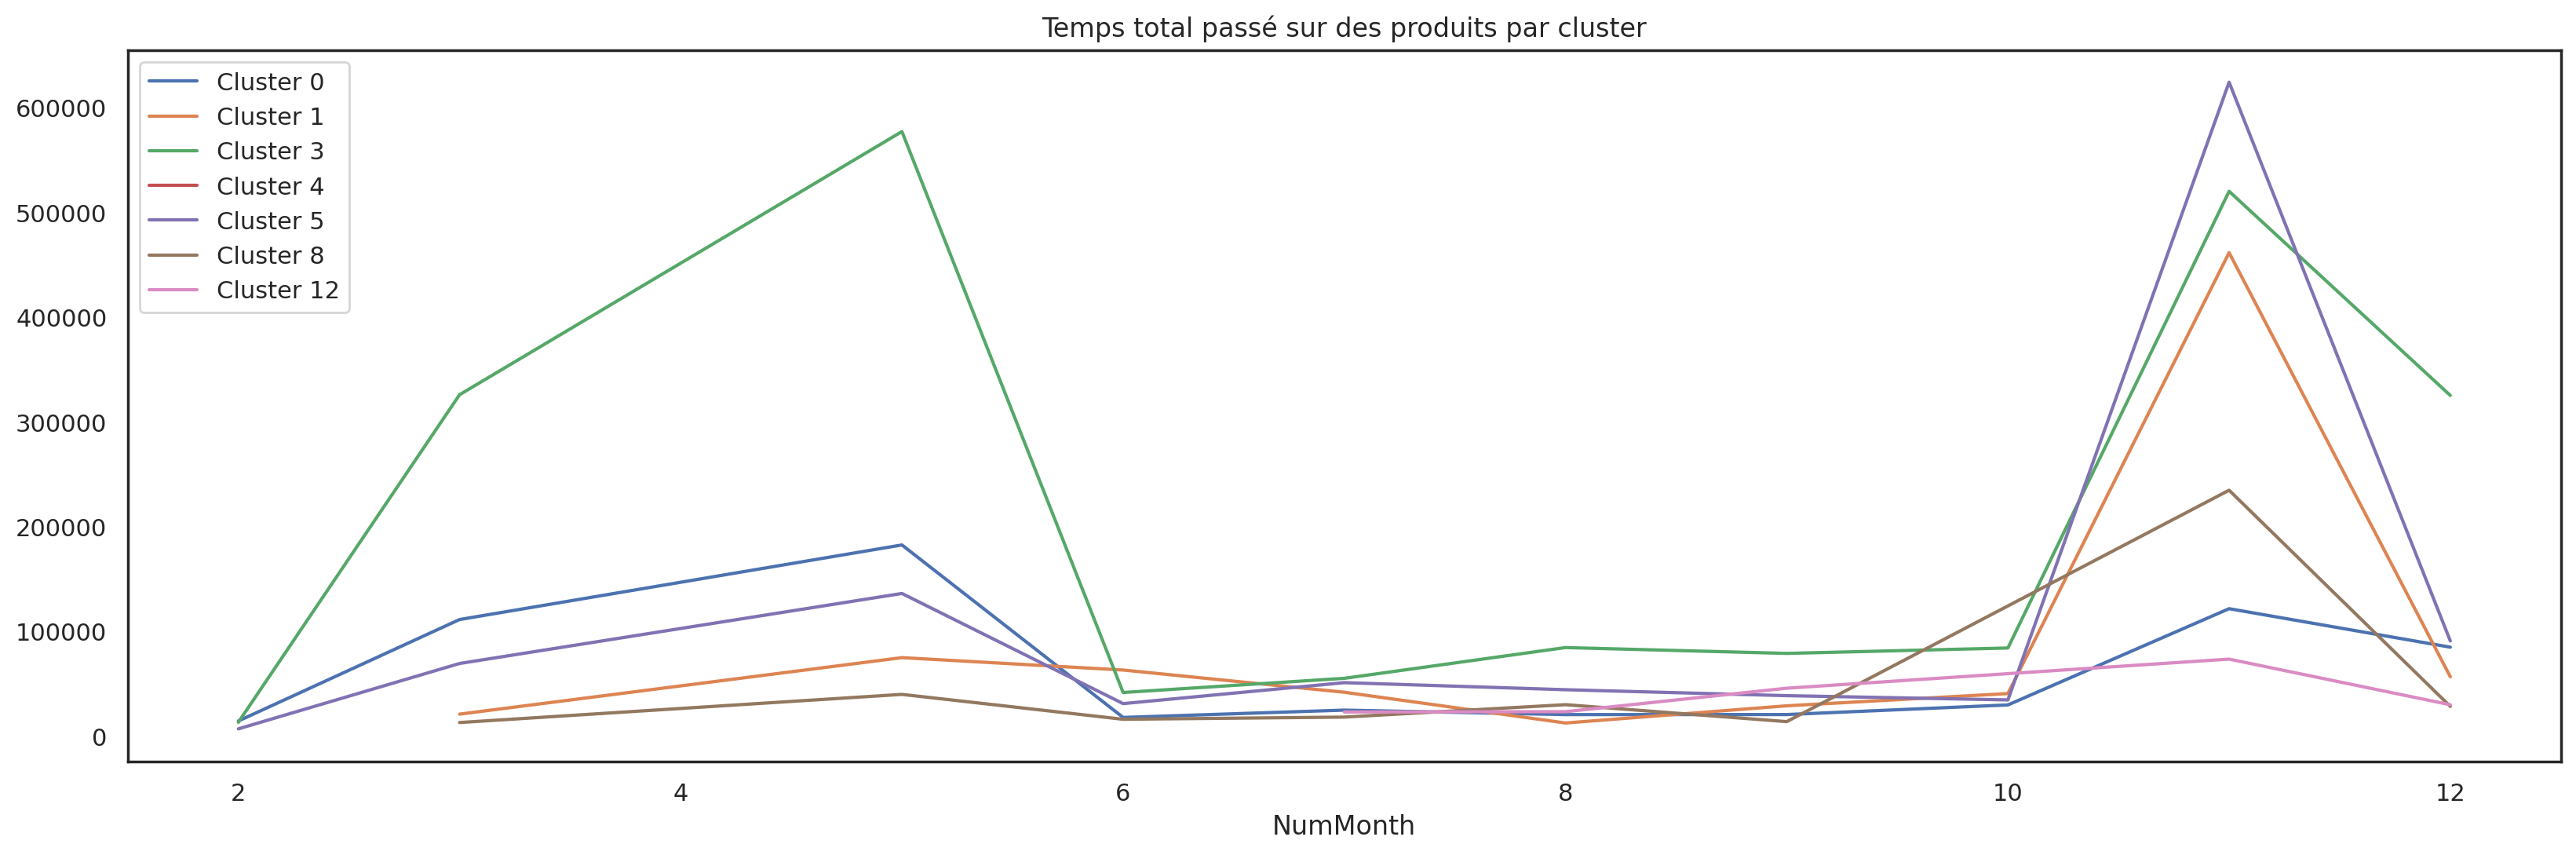

In [ ]:
ShoppersNum[ShoppersNum.Labels==0].groupby(["NumMonth"]).ProductRelated_Duration.sum().plot()
ShoppersNum[ShoppersNum.Labels==1].groupby(["NumMonth"]).ProductRelated_Duration.sum().plot()
ShoppersNum[ShoppersNum.Labels==3].groupby(["NumMonth"]).ProductRelated_Duration.sum().plot()
ShoppersNum[ShoppersNum.Labels==4].groupby(["NumMonth"]).ProductRelated_Duration.sum().plot()
ShoppersNum[ShoppersNum.Labels==5].groupby(["NumMonth"]).ProductRelated_Duration.sum().plot()
ShoppersNum[ShoppersNum.Labels==8].groupby(["NumMonth"]).ProductRelated_Duration.sum().plot()
ShoppersNum[ShoppersNum.Labels==12].groupby(["NumMonth"]).ProductRelated_Duration.sum().plot()
plt.legend(("Cluster 0", "Cluster 1", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 8", "Cluster 12"))
plt.title("Temps total passé sur des produits par cluster")

Text(0.5, 1.0, 'Temps moyen passé sur des produits par cluster')

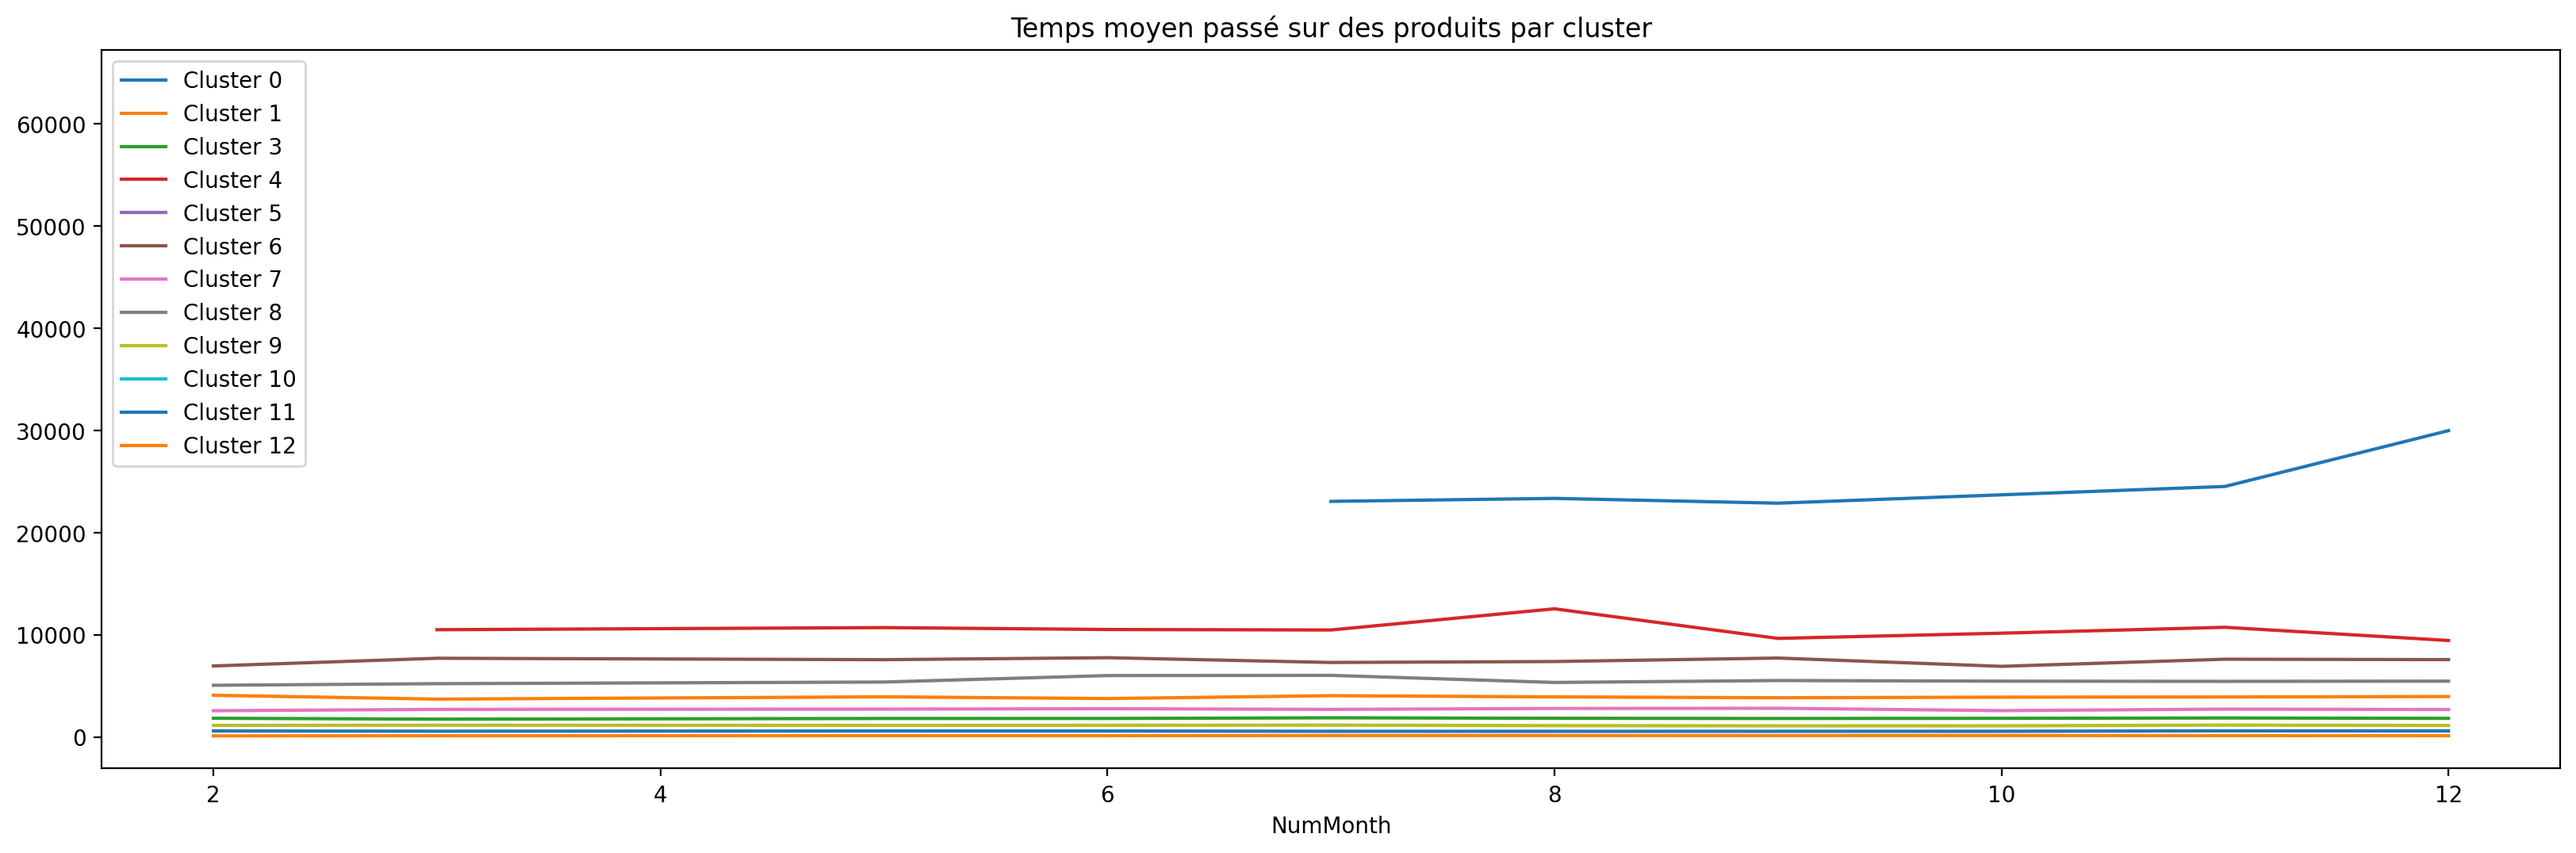

In [ ]:
ShoppersNum[ShoppersNum.Labels==0].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==1].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==3].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==4].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==5].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==6].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==7].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==8].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==9].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==10].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==11].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
ShoppersNum[ShoppersNum.Labels==12].groupby(["NumMonth"]).ProductRelated_Duration.mean().plot()
plt.legend(("Cluster 0", "Cluster 1", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8", "Cluster 9", "Cluster 10", "Cluster 11", "Cluster 12"))
plt.title("Temps moyen passé sur des produits par cluster")

Ici nous pouvons noter que la répartition de nouveaux visiteurs demeurent proche de la répartition en nombre de personne par cluster :

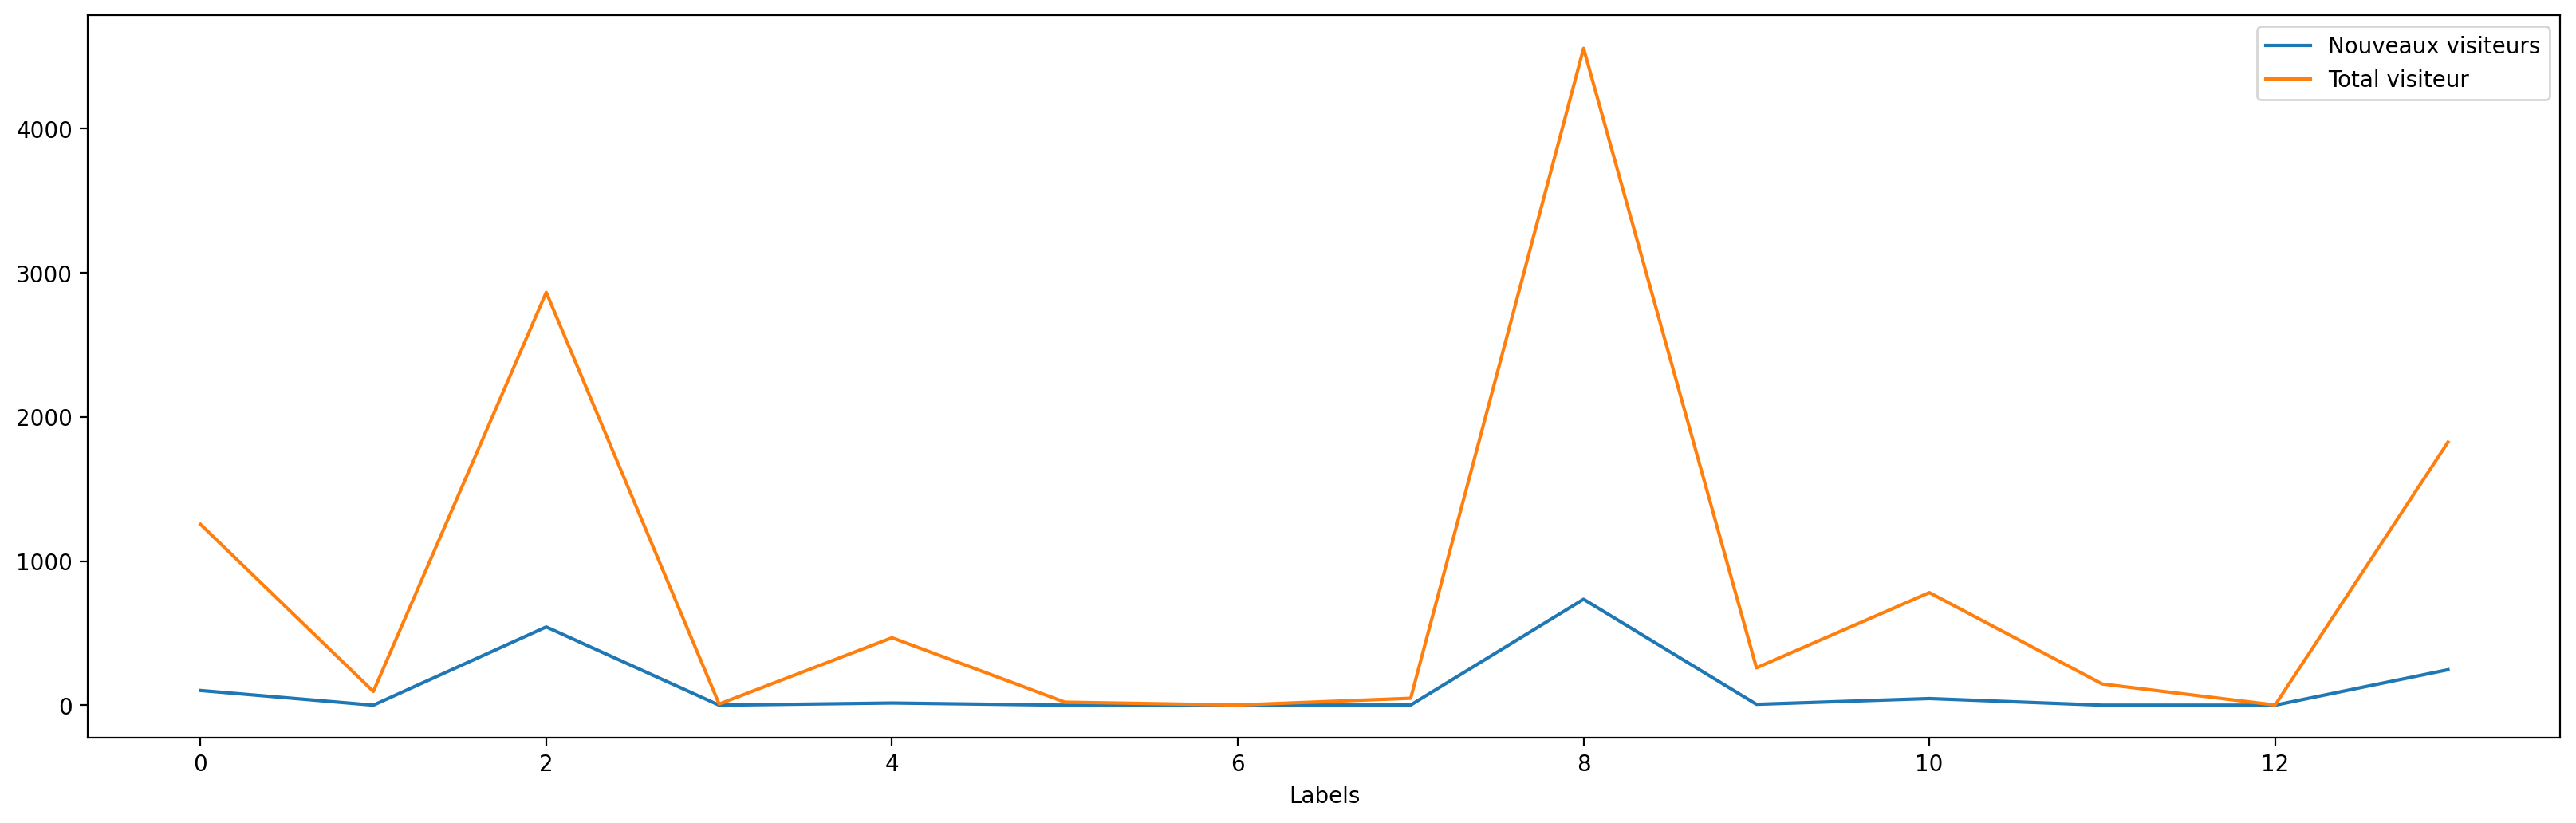

In [ ]:
ShoppersNum.groupby(["Labels"]).New_Visitor.sum().plot()
ShoppersNum.groupby(["Labels"]).New_Visitor.count().plot()
plt.legend(("Nouveaux visiteurs", "Total visiteur"))

Regardons maintenant le nombre moyen de vues par individus dans chaque cluster et le temps moyen dépensé sur le site par individus dans chaque cluster :

Text(0.5, 1.0, 'Nombre moyen de passage par individus dans chaque cluster')

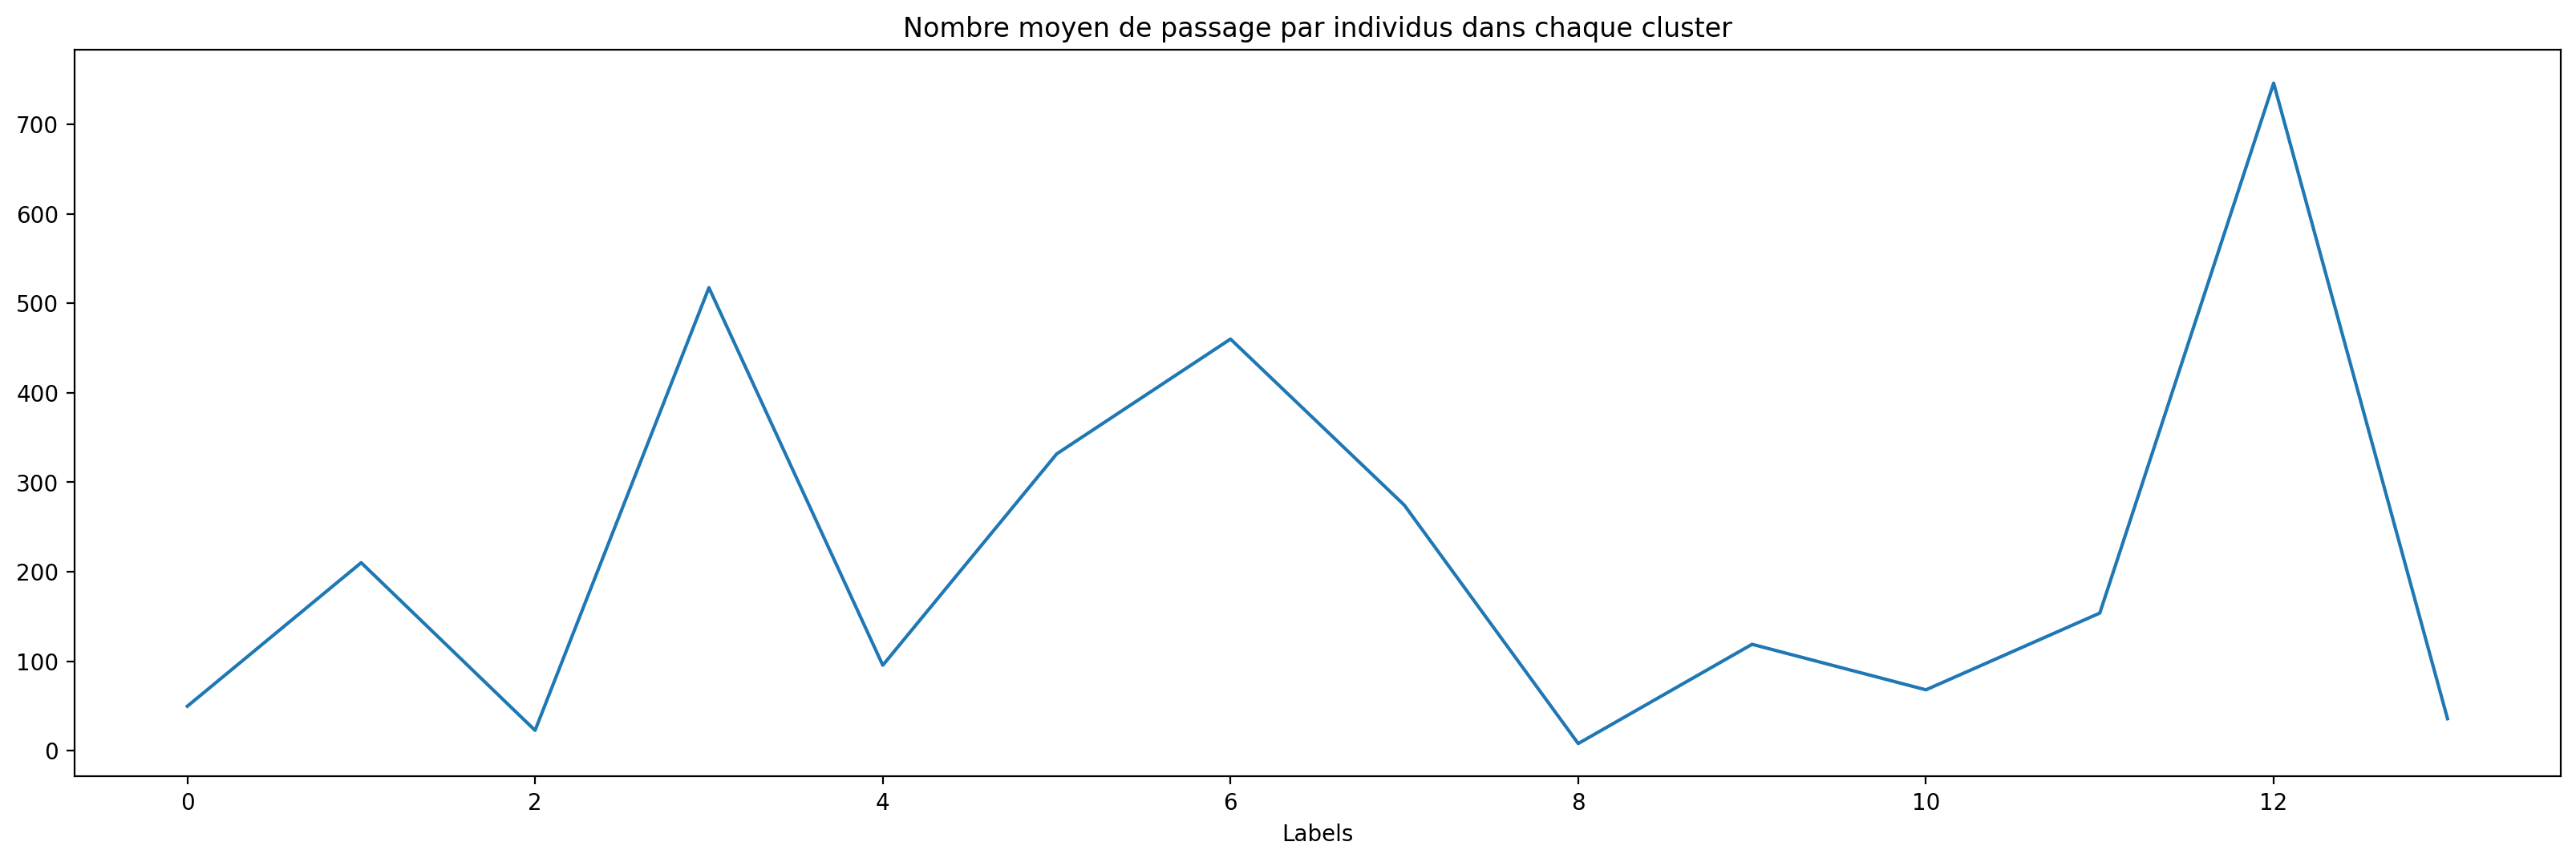

In [ ]:
ShoppersNum.groupby(["Labels"]).TotalView.mean().plot()
plt.title("Nombre moyen de passage par individus dans chaque cluster")

Text(0.5, 1.0, 'Temps moyen de passage par individus dans chaque cluster')

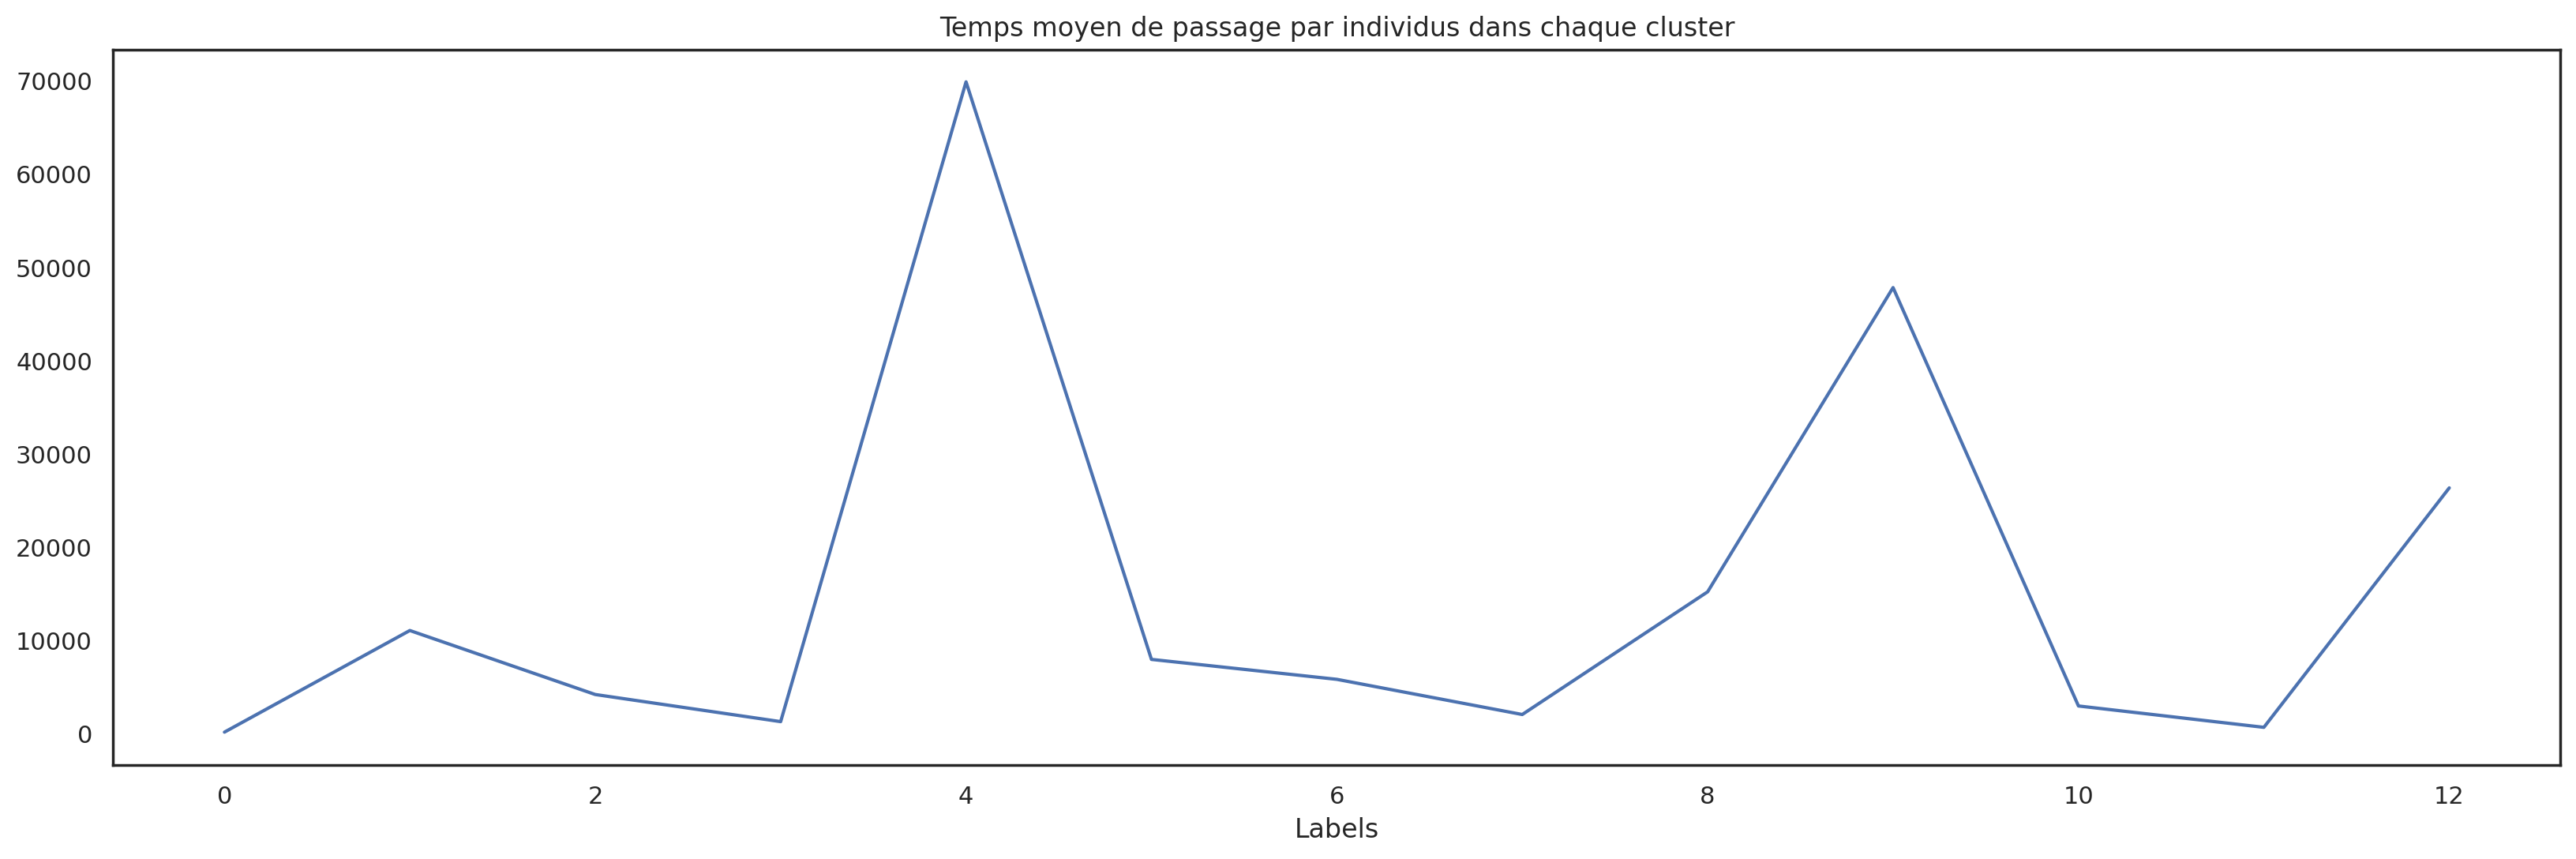

In [ ]:
ShoppersNum.groupby(["Labels"]).TotalDuration.mean().plot()
plt.title("Temps moyen de passage par individus dans chaque cluster")

Comme attendu, ces deux courbes ont la même allure mais les individus du cluster 4 passent en moyenne plus de temps que ceux du cluster 9, alors que ceux du cluster 9 visitent plus de pages.

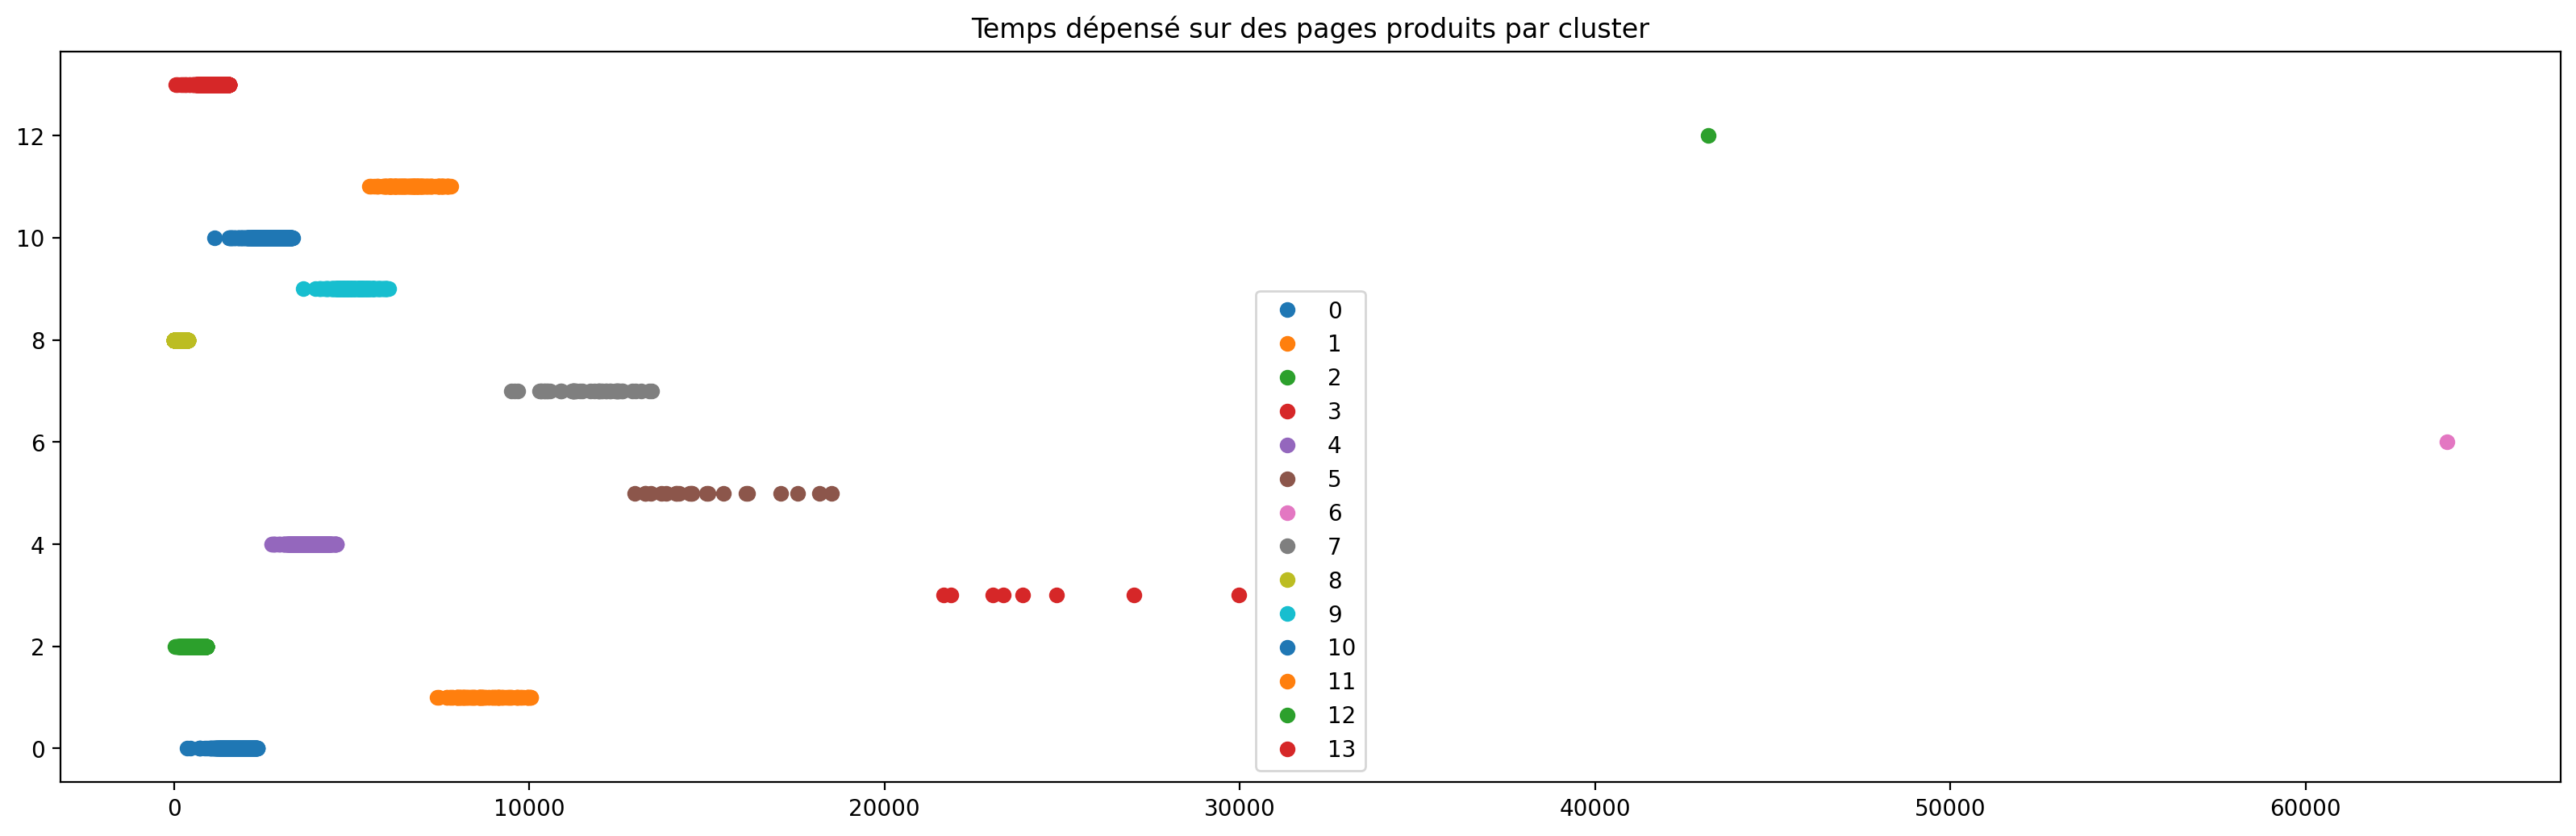

In [ ]:
groups = ShoppersNum.groupby(["Labels"])

for name, group in groups:
    plt.plot(group["ProductRelated_Duration"], group["Labels"], marker="o", linestyle="", label=name)

plt.title("Temps dépensé sur des pages produits par cluster")
plt.legend()

Text(0.5, 1.0, 'Cluster regroupé par temps dépensé sur des pages produits en fonction de la dernière page vue')

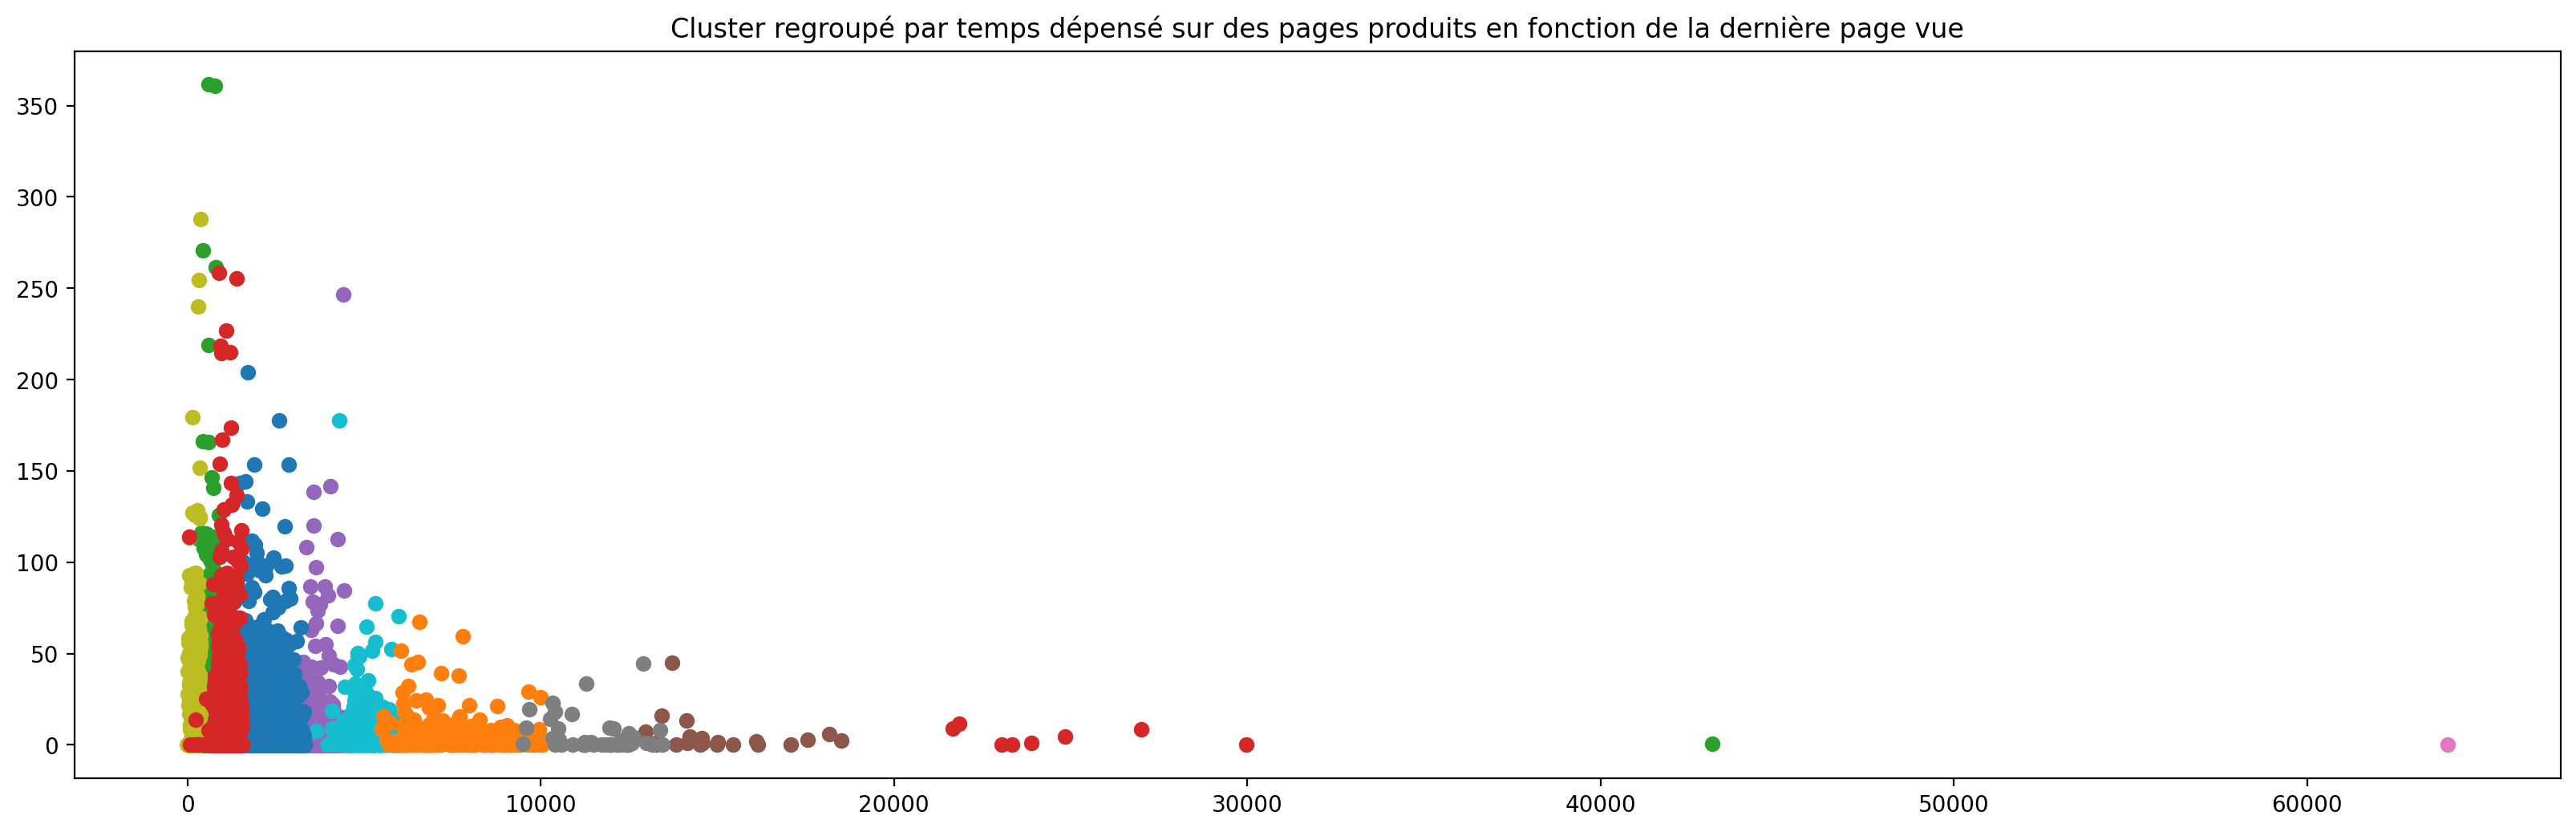

In [ ]:
for name, group in groups:
    plt.plot(group["ProductRelated_Duration"], group["PageValues"], marker="o", linestyle="", label=name)

plt.title("Cluster regroupé par temps dépensé sur des pages produits en fonction de la dernière page vue")

Text(0.5, 1.0, 'Cluster regroupé par temps dépensé sur des pages produits')

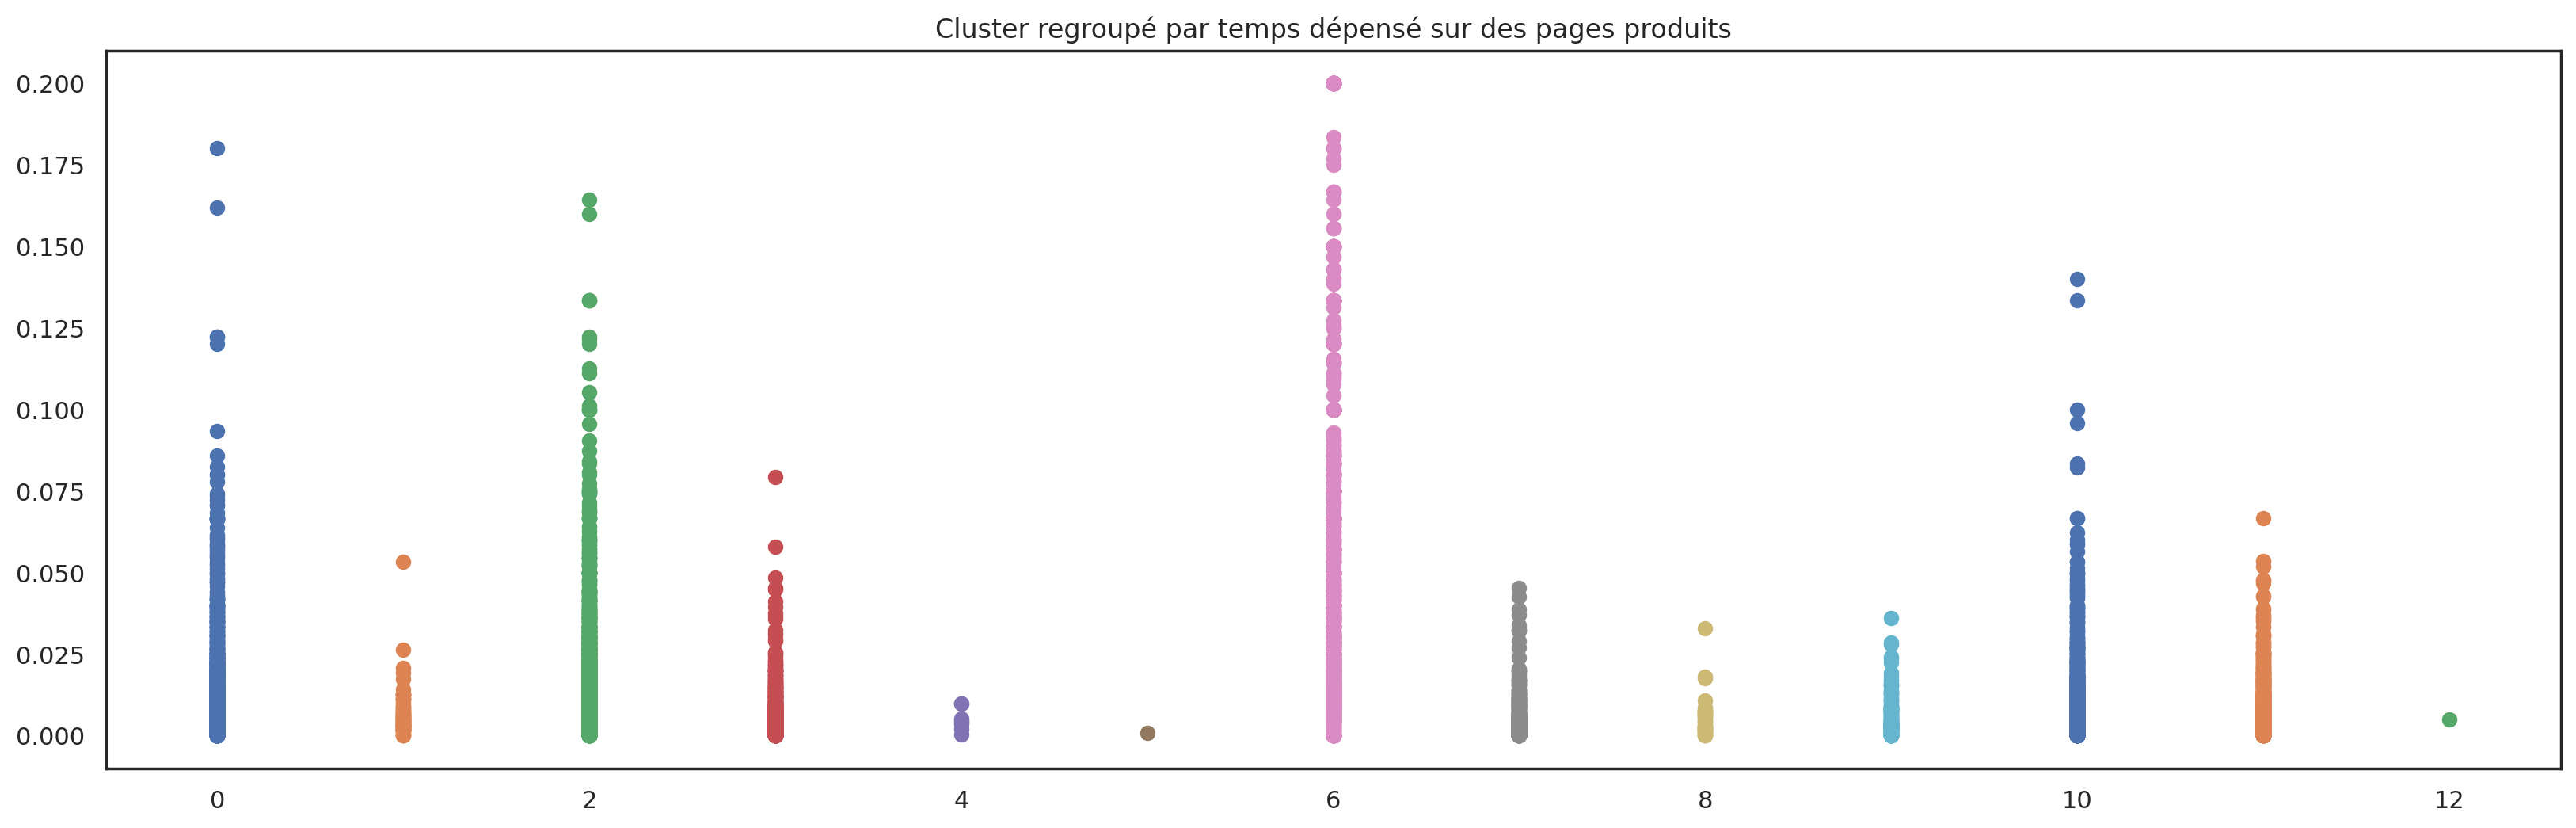

In [ ]:
for name, group in groups:
    plt.plot(group["Labels"], group["BounceRates"], marker="o", linestyle="", label=name)

plt.title("Pourcentage de chance de quitter la page web sans en visiter une autre par cluster")

Regardons la répartition des achats par cluster :

Text(0.5, 1.0, "Nombre d'achat fait par cluster en comparaison du nombre de personne dans le cluster")

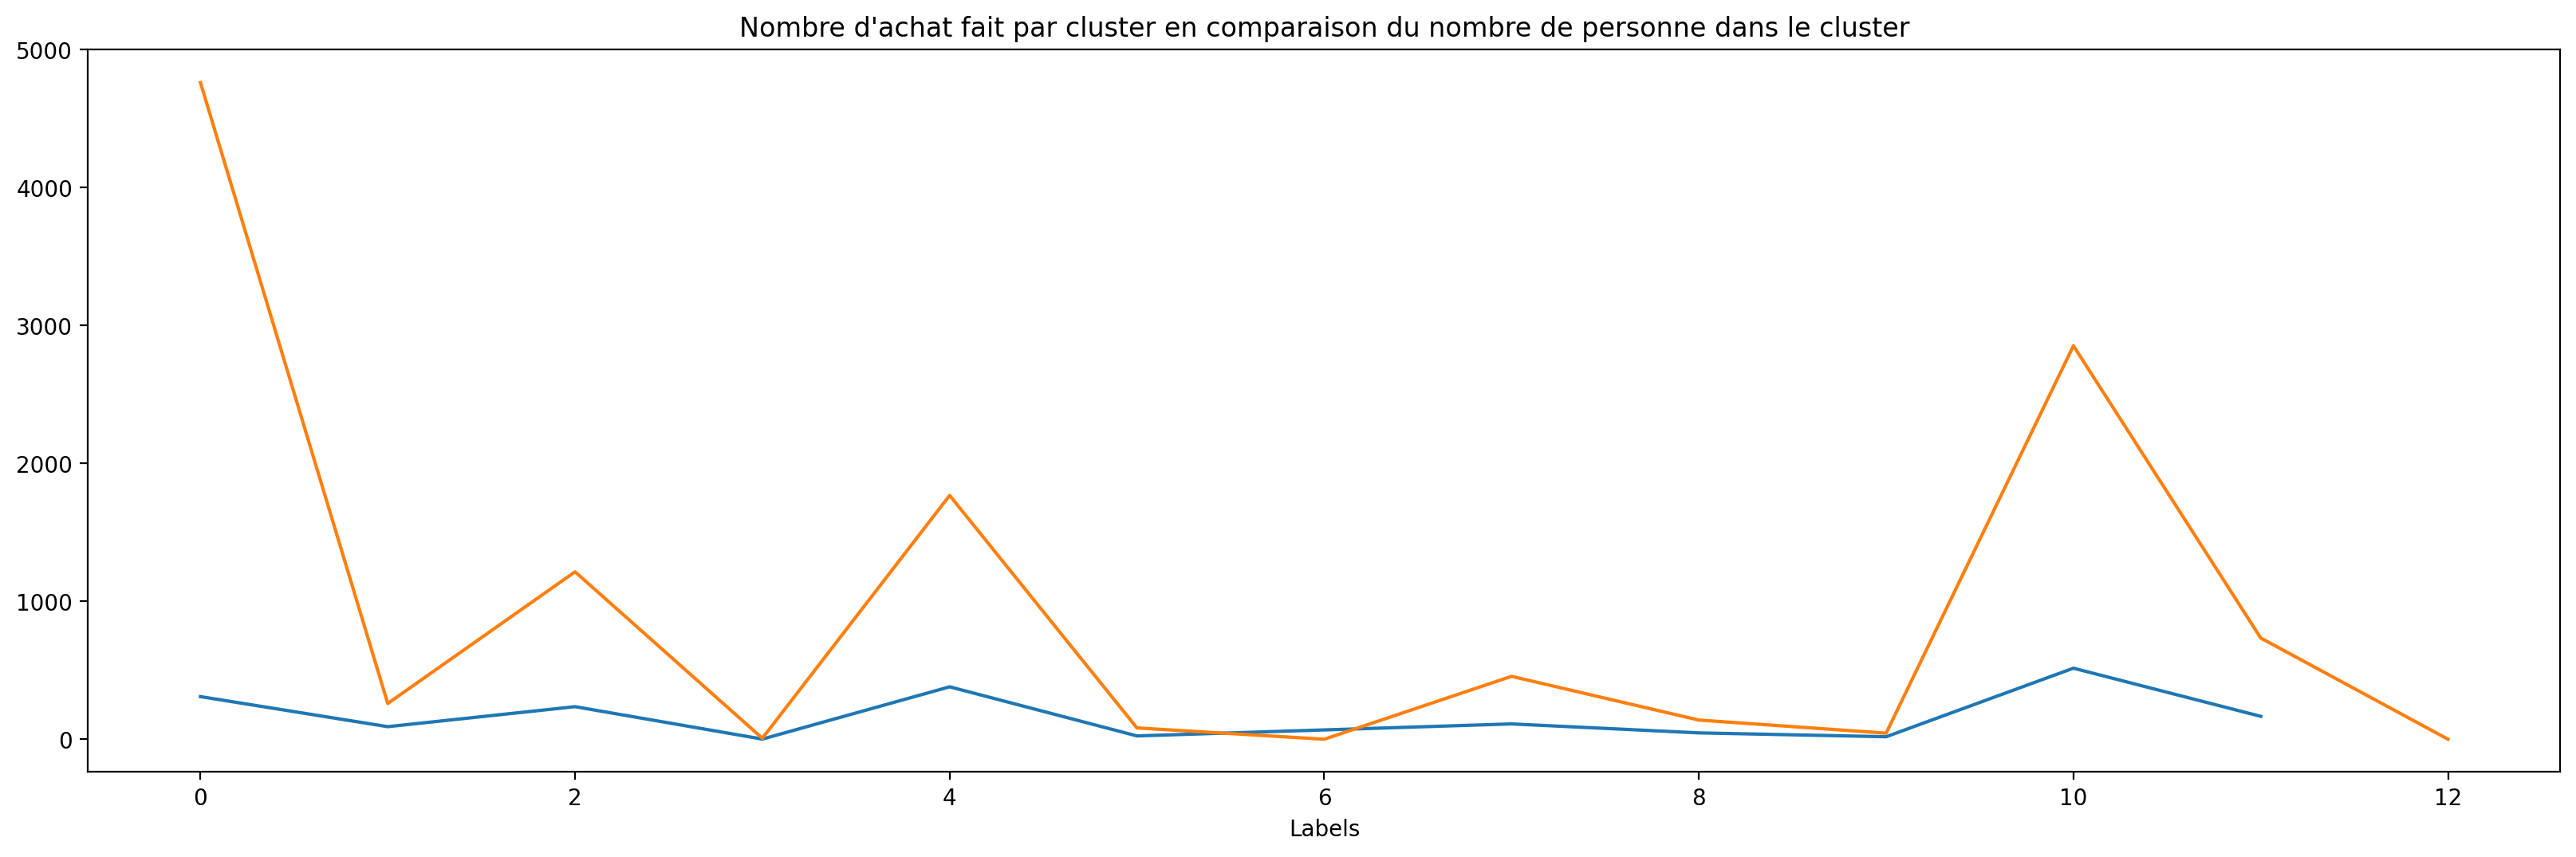

In [ ]:
ShoppersNum[ShoppersNum.Revenue == True].groupby(["Labels"]).New_Visitor.count().plot()
ShoppersNum.groupby(["Labels"]).Administrative.count().plot()
plt.title("Nombre d'achat fait par cluster en comparaison du nombre de personne dans le cluster")

Text(0.5, 1.0, "Nombre d'achat fait par cluster")

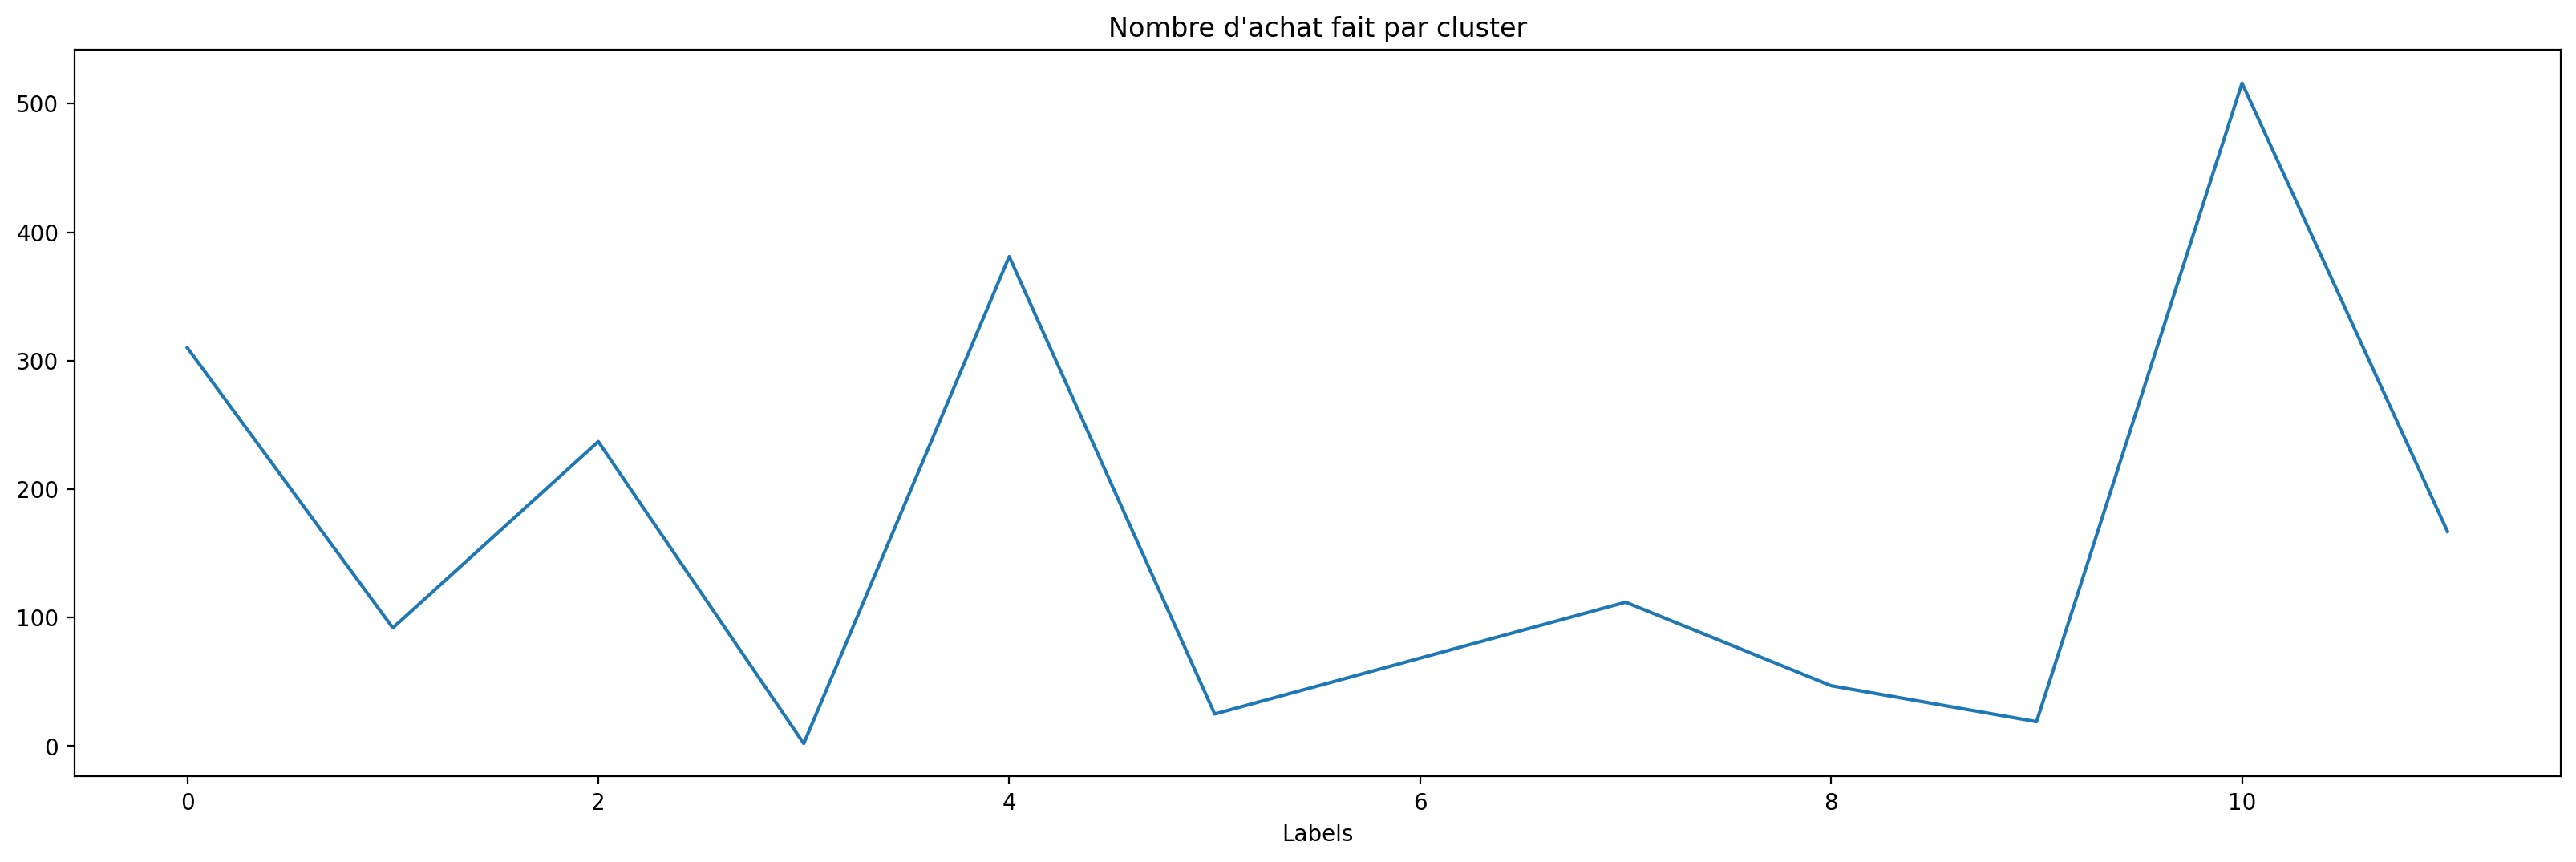

In [ ]:
ShoppersNum[ShoppersNum.Revenue == True].groupby(["Labels"]).Administrative.count().plot()
plt.title("Nombre d'achat fait par cluster")

In [ ]:
for k in range(0, 13):
  if k!=5 and k != 10:
    NbAchat = ShoppersNum[ShoppersNum.Revenue == True].groupby(["Labels"]).New_Visitor.count()[k]
  else :
    NbAchat = 0
  NbTotal = len(ShoppersNum[ShoppersNum.Labels == k])
  print ("Pourcentage d'achat dans le cluster " + str(k) +" : " + str(NbAchat/NbTotal*100))

Pourcentage d'achat dans le cluster 0 : 17.276210379658654
Pourcentage d'achat dans le cluster 1 : 26.42706131078224
Pourcentage d'achat dans le cluster 2 : 44.44444444444444
Pourcentage d'achat dans le cluster 3 : 19.405320813771517
Pourcentage d'achat dans le cluster 4 : 34.21052631578947
Pourcentage d'achat dans le cluster 5 : 0.0
Pourcentage d'achat dans le cluster 6 : 30.87248322147651
Pourcentage d'achat dans le cluster 7 : 23.195876288659793
Pourcentage d'achat dans le cluster 8 : 34.74903474903475
Pourcentage d'achat dans le cluster 9 : 21.580381471389646
Pourcentage d'achat dans le cluster 10 : 0.0
Pourcentage d'achat dans le cluster 11 : 25.0
Pourcentage d'achat dans le cluster 12 : 6.2718531468531475


On constate que le pourcentage d'achat dans chaque cluster varie beaucoup (de 0.0% à 42.2%).

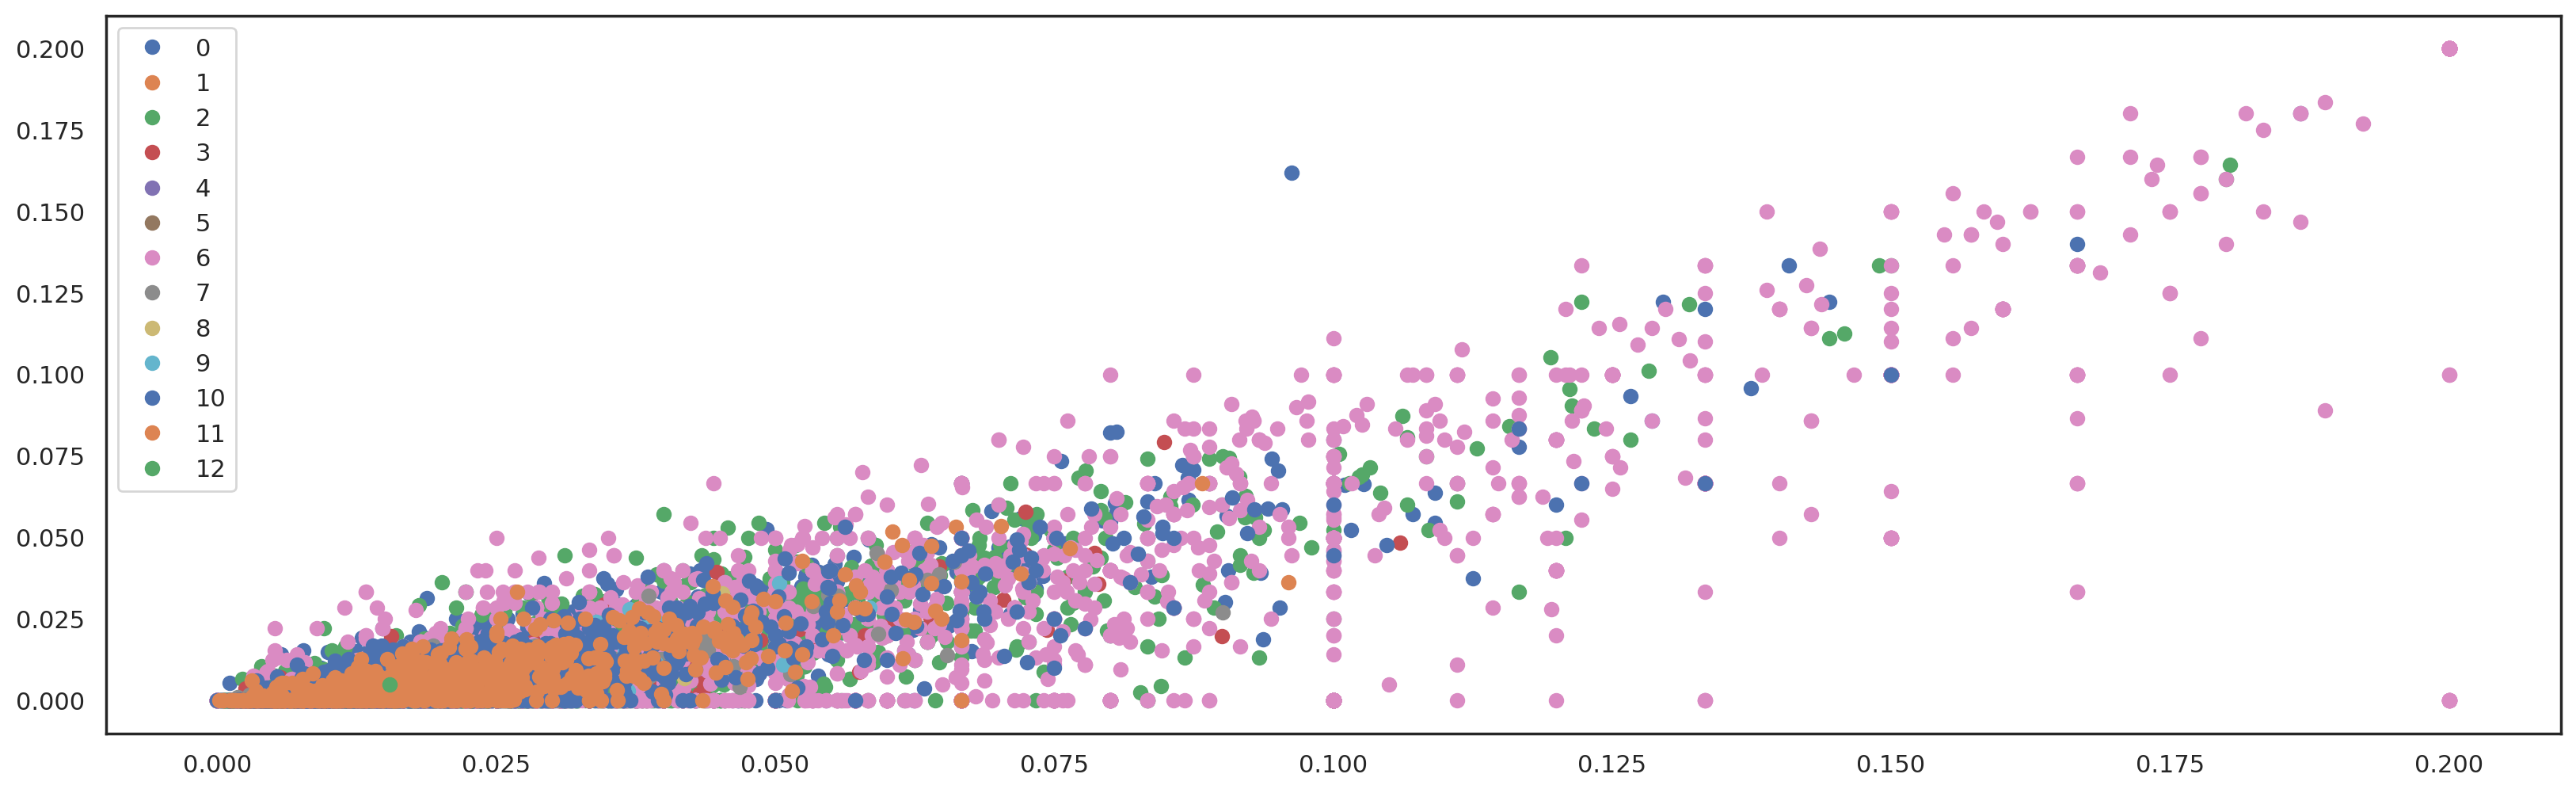

In [ ]:
for name, group in groups:
    plt.plot(group["ExitRates"], group["BounceRates"], marker="o", linestyle="", label=name)

plt.legend()

### Visualisation des résutlats pour K = 7

In [ ]:
kmeans_model = KMeans(n_clusters=7, n_init = 30, max_iter = 100, tol = 0.0001, random_state=1).fit(ShoppersNum.iloc[0:12330])
labels = kmeans_model.labels_
SSE = kmeans_model.inertia_

print(SSE)
ShoppersNum['LabelsBis'] = labels
ShoppersNum.head()

6756539015.755757


Administrative  Administrative_Duration  ...  Labels  LabelsBis
0               0                      0.0  ...      12          0
1               0                      0.0  ...      12          0
2               0                      0.0  ...      12          0
3               0                      0.0  ...      12          0
4               0                      0.0  ...       0          0

[5 rows x 25 columns]

Text(0.5, 1.0, "Nombre d'individus par cluster")

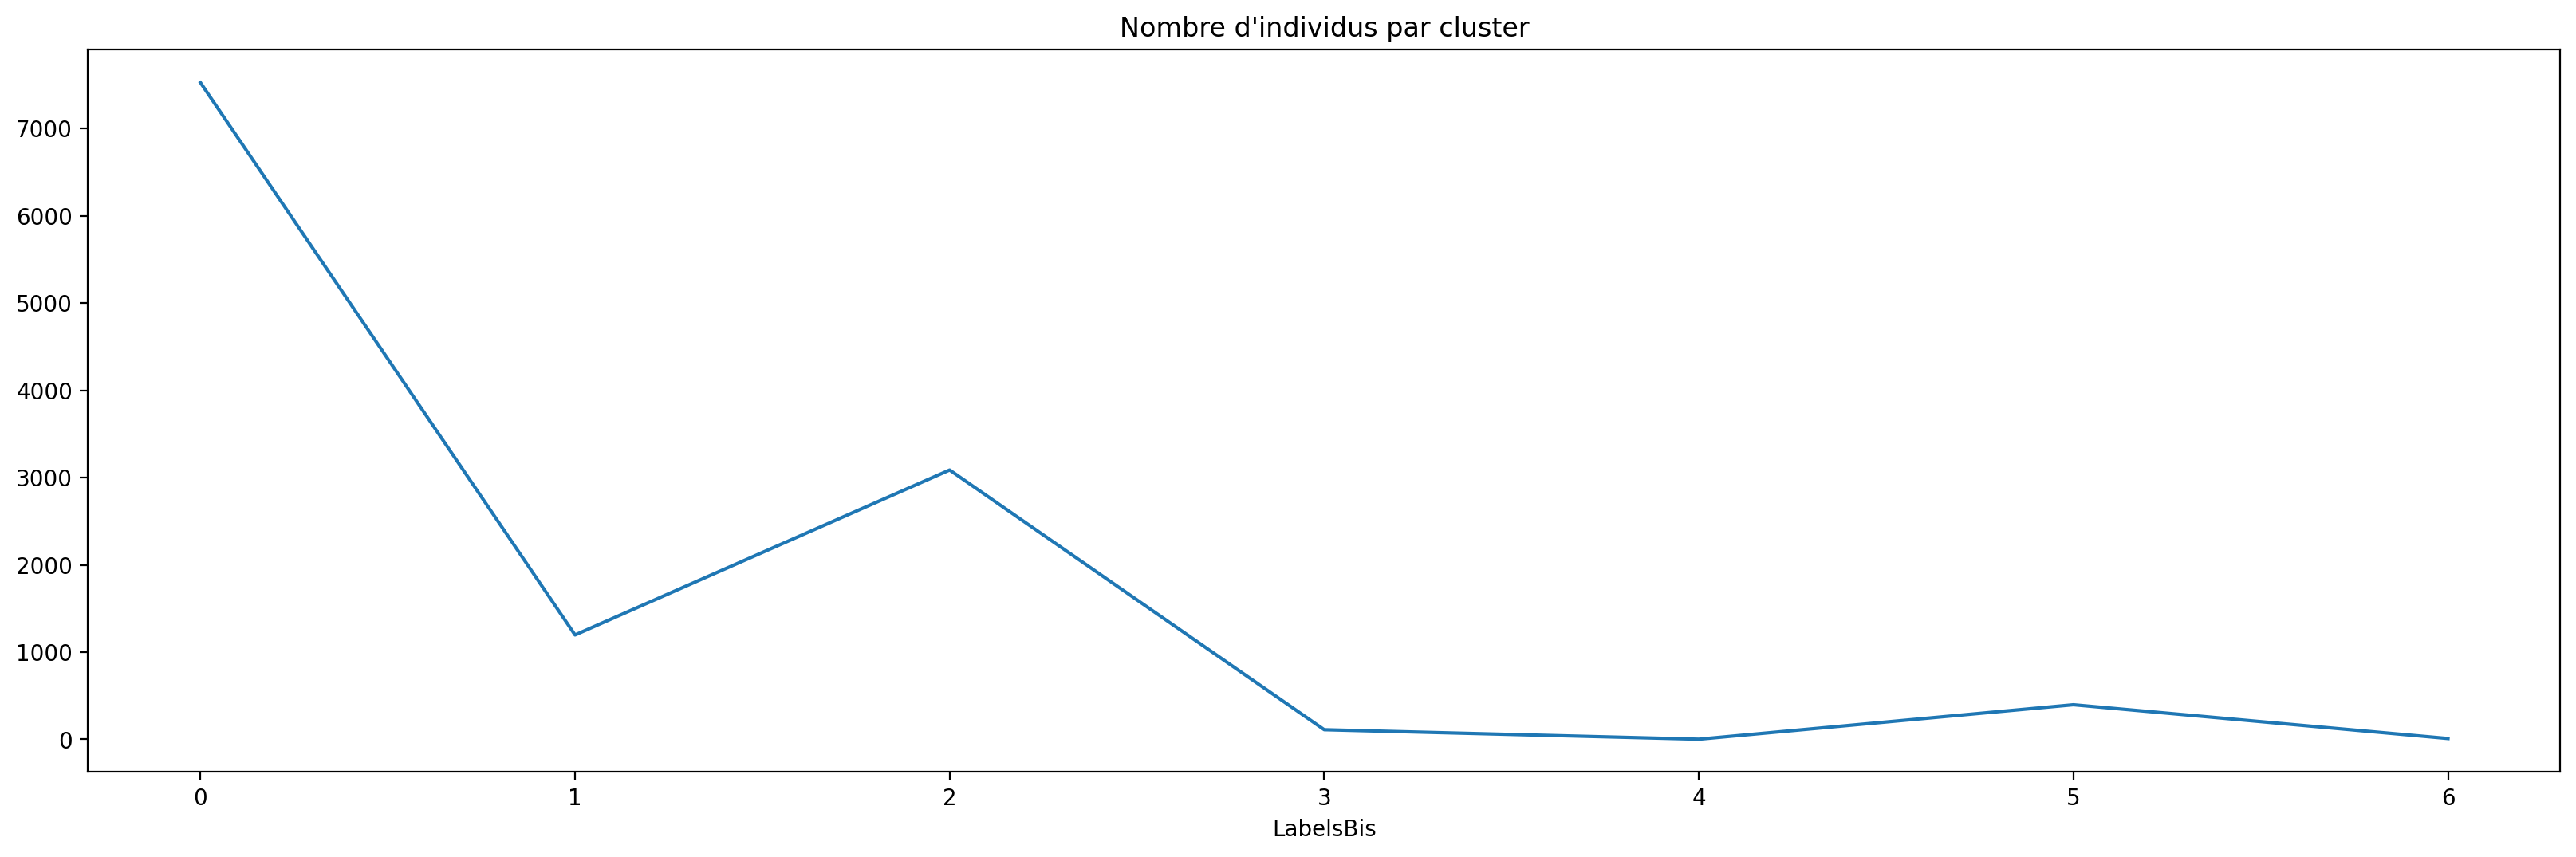

In [ ]:
ShoppersNum.groupby(["LabelsBis"]).Administrative.count().plot()
plt.title("Nombre d'individus par cluster")

Text(0.5, 1.0, "Nombre d'achat fait par cluster en comparaison du nombre de personne dans le cluster")

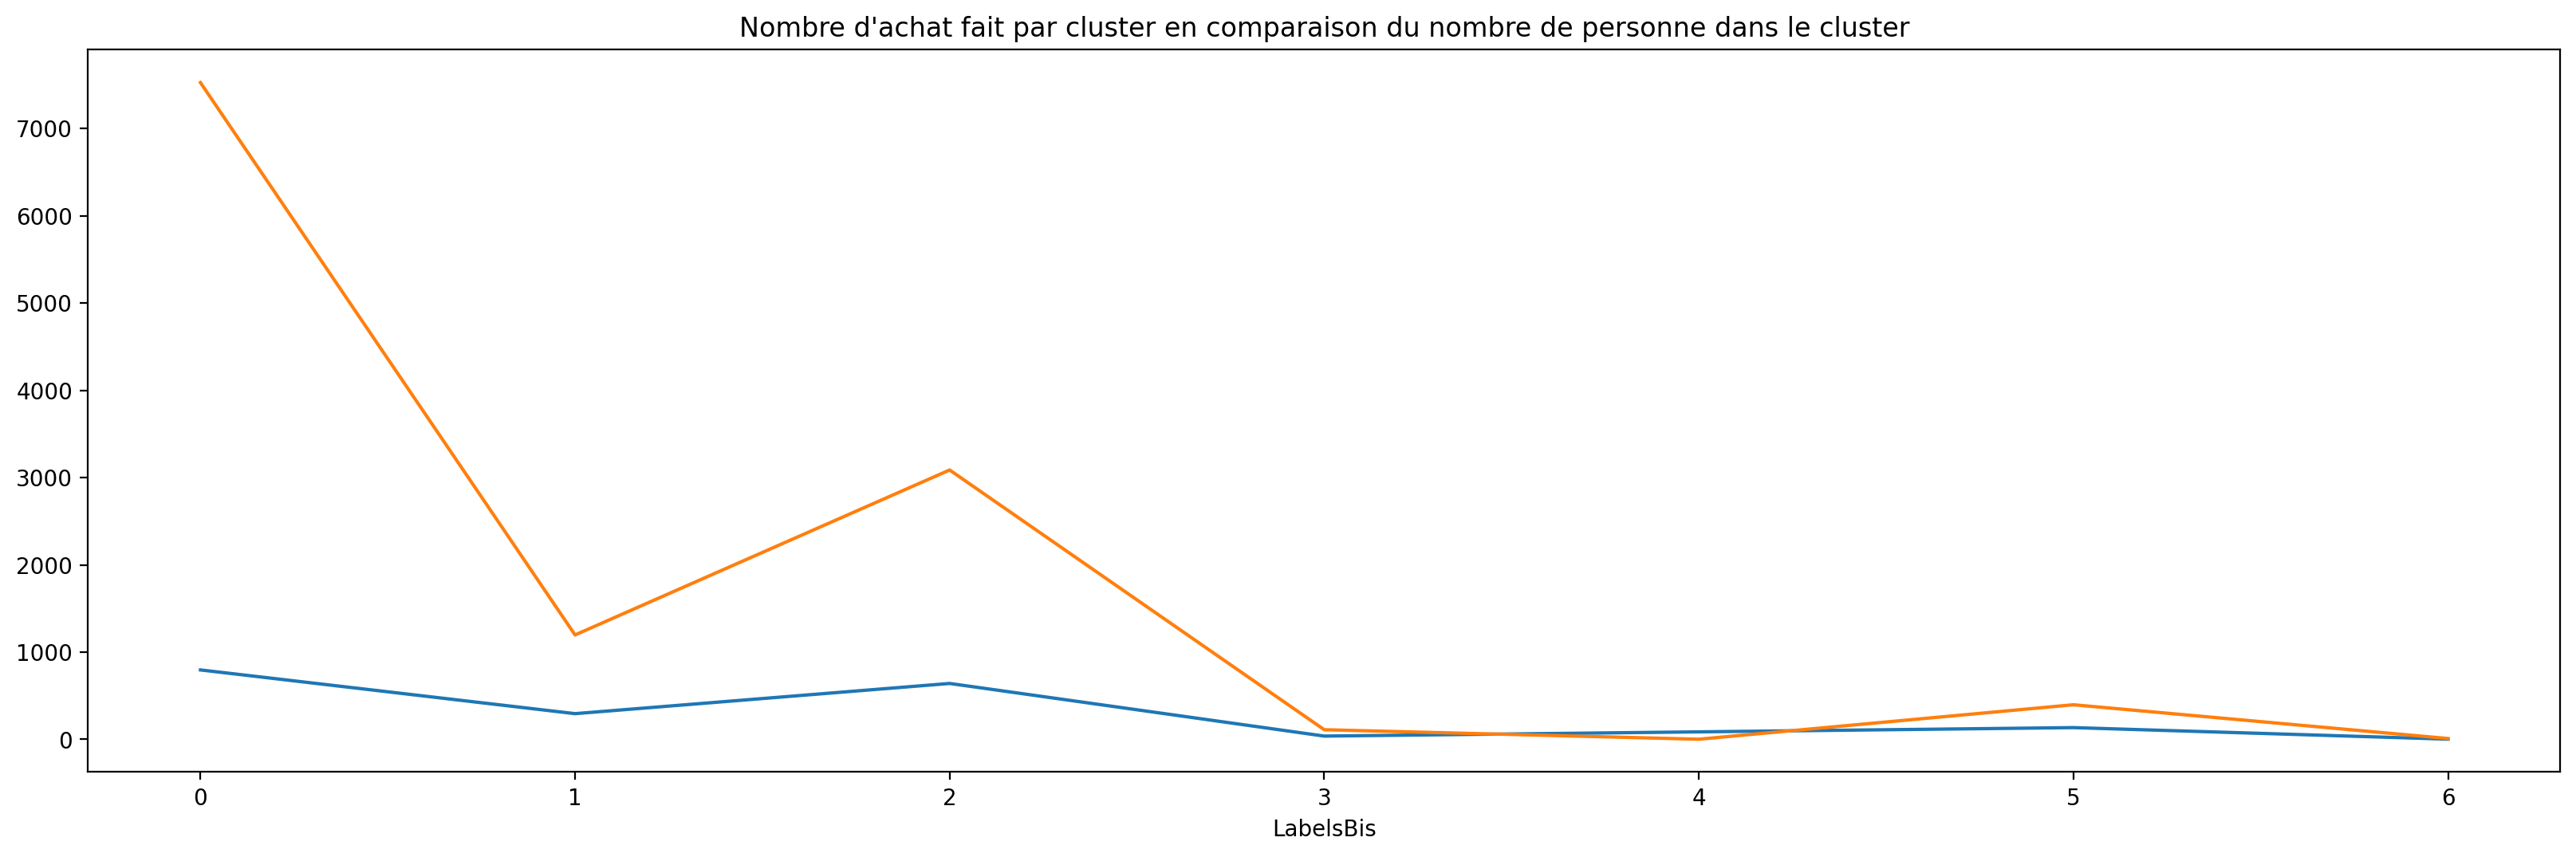

In [ ]:
ShoppersNum[ShoppersNum.Revenue == True].groupby(["LabelsBis"]).New_Visitor.count().plot()
ShoppersNum.groupby(["LabelsBis"]).Administrative.count().plot()
plt.title("Nombre d'achat fait par cluster en comparaison du nombre de personne dans le cluster")

Text(0.5, 1.0, 'Nombre moyen de passage par individus dans chaque cluster')

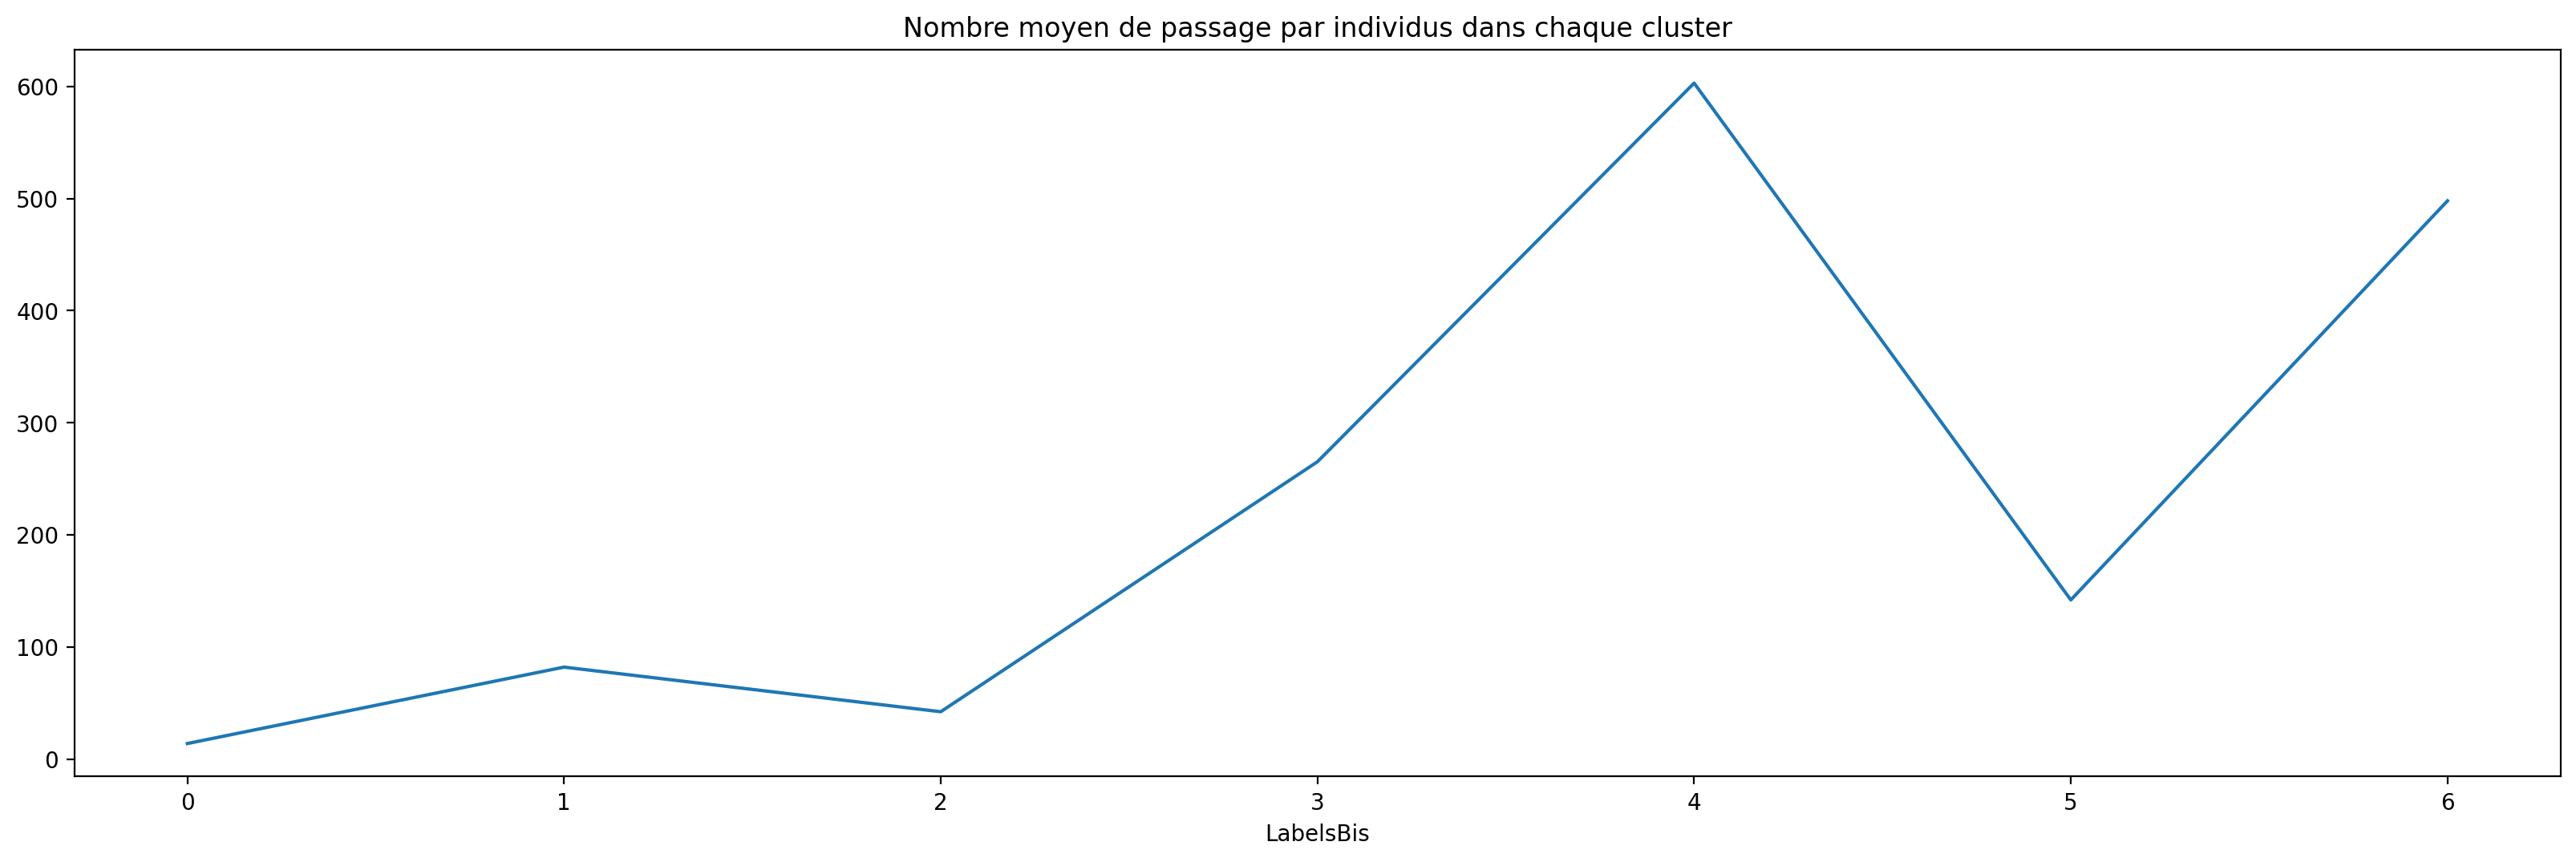

In [ ]:
ShoppersNum.groupby(["LabelsBis"]).TotalView.mean().plot()
plt.title("Nombre moyen de passage par individus dans chaque cluster")

Text(0.5, 1.0, "Nombre d'achat fait par cluster")

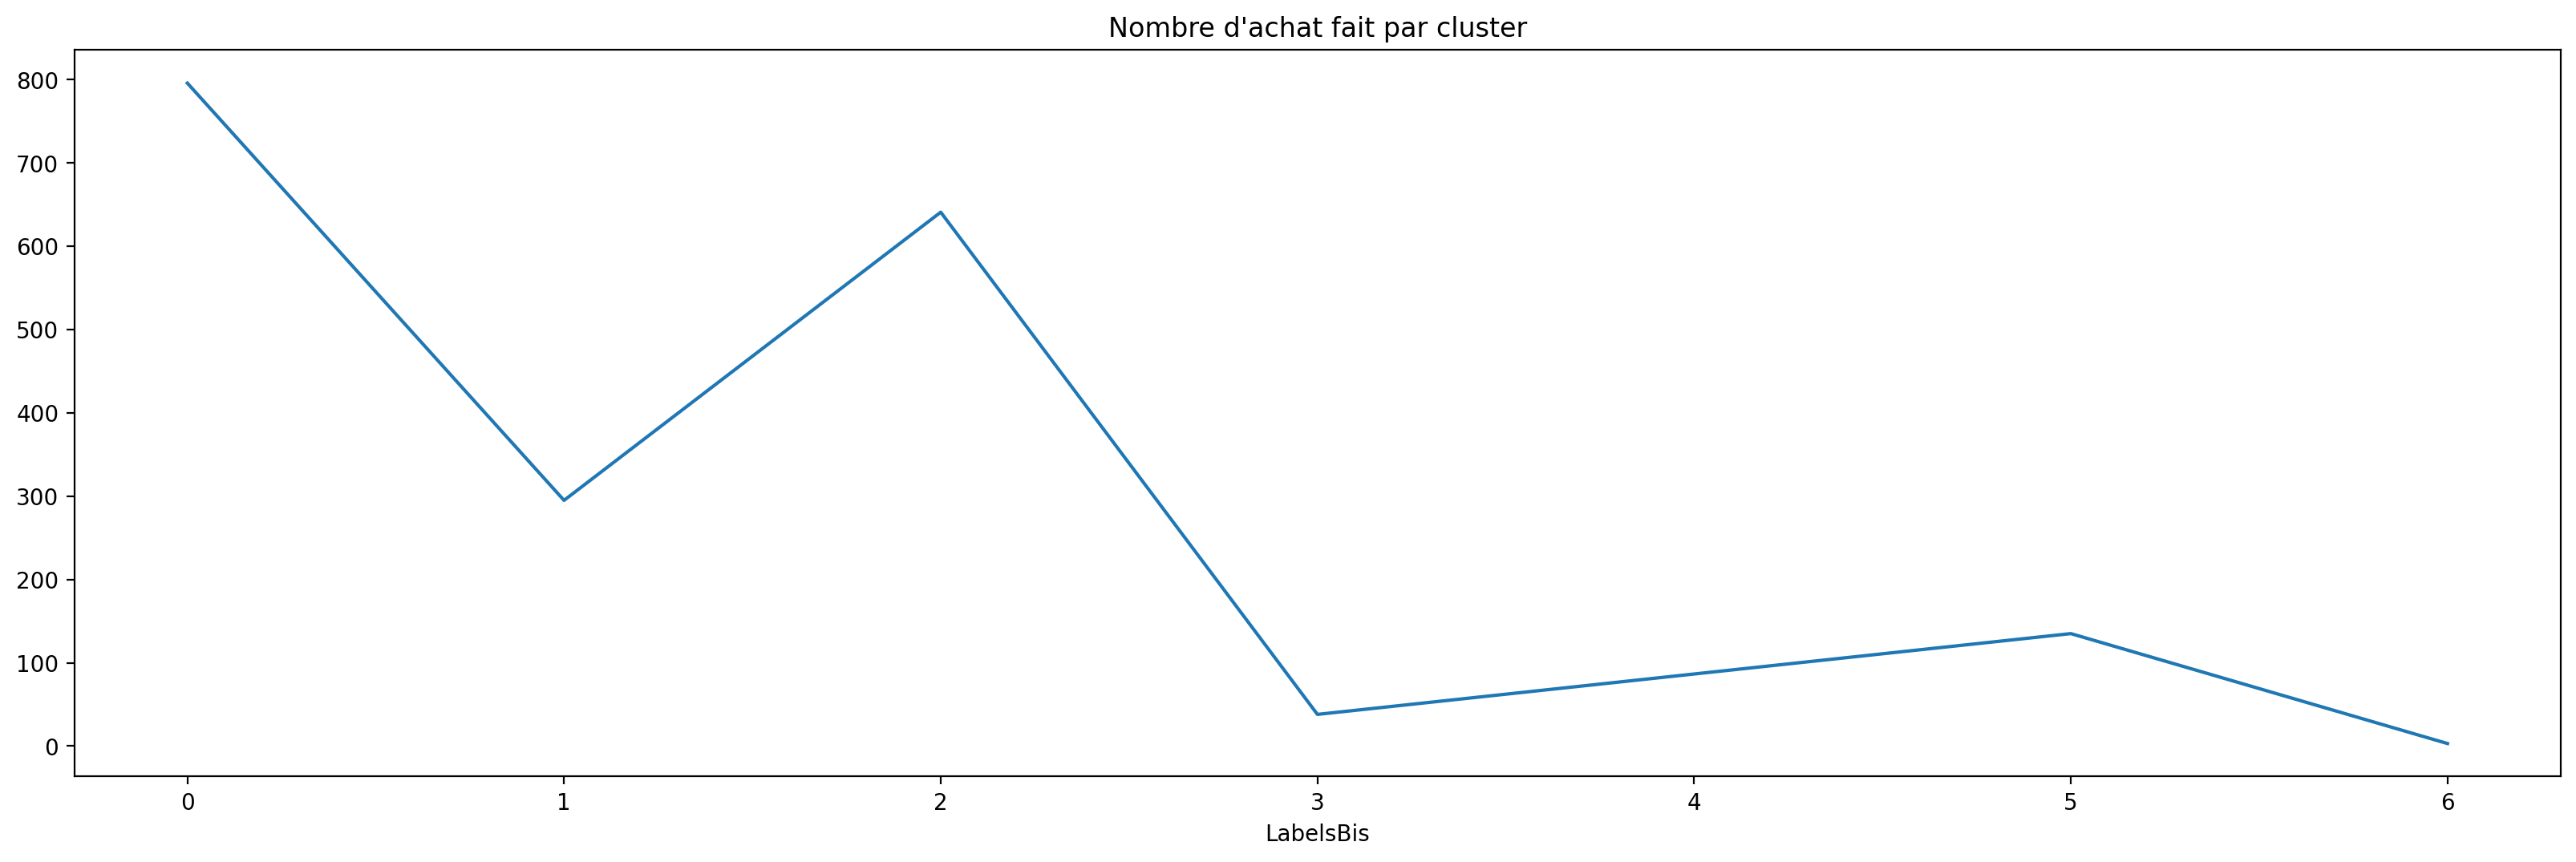

In [ ]:
ShoppersNum[ShoppersNum.Revenue == True].groupby(["LabelsBis"]).Administrative.count().plot()
plt.title("Nombre d'achat fait par cluster")

In [ ]:
for k in range(0, 7):
  if k!=4:
    NbAchat = ShoppersNum[ShoppersNum.Revenue == True].groupby(["LabelsBis"]).New_Visitor.count()[k]
  else :
    NbAchat = 0
  NbTotal = len(ShoppersNum[ShoppersNum.LabelsBis == k])
  print ("Pourcentage d'achat dans le cluster " + str(k) +" : " + str(NbAchat/NbTotal*100))

Pourcentage d'achat dans le cluster 0 : 10.57666755248472
Pourcentage d'achat dans le cluster 1 : 24.644945697577274
Pourcentage d'achat dans le cluster 2 : 20.764496274700356
Pourcentage d'achat dans le cluster 3 : 34.234234234234236
Pourcentage d'achat dans le cluster 4 : 0.0
Pourcentage d'achat dans le cluster 5 : 34.005037783375315
Pourcentage d'achat dans le cluster 6 : 30.0


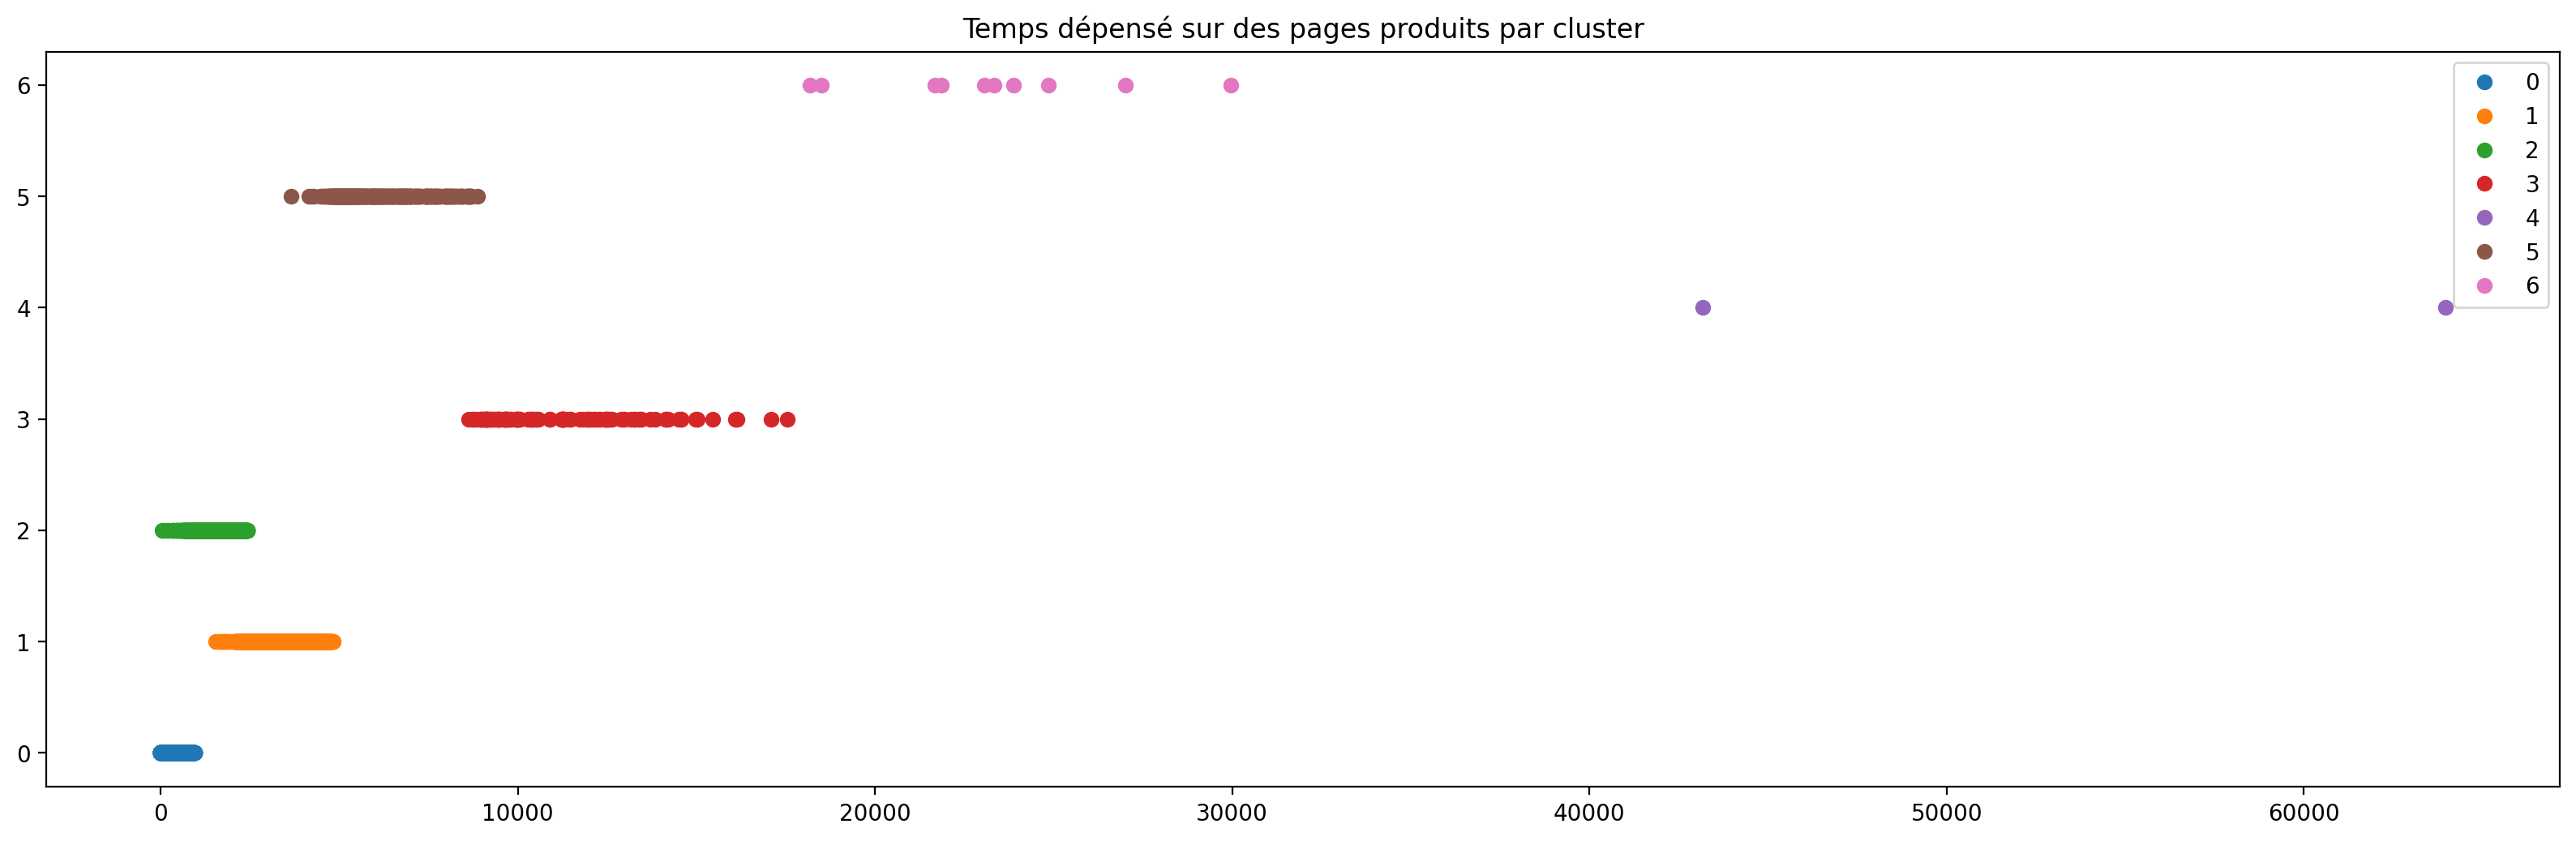

In [ ]:
groupsbis = ShoppersNum.groupby(["LabelsBis"])

for name, group in groupsbis:
    plt.plot(group["ProductRelated_Duration"], group["LabelsBis"], marker="o", linestyle="", label=name)

plt.title("Temps dépensé sur des pages produits par cluster")
plt.legend()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

On commence par séparer nos datasets en train et test.
Pour le label, on utilise Revenue (la colonne indiquant s'il y a eu achat ou non).

Avant cette étape nous transformons également nos colonnes afin de n'avoir que du one-hot encoding (c'est à dire une colonne pour chaque mois, contenant un 0 si ce n'est pas le mois où a eu lieu la visiter, et un 1 sinon). Ceci s'applique à toutes les colonnes qui ne sont pas des int, float ou bool.

In [ ]:
ShoppersPredict = pd.get_dummies(Shoppers)

x = ShoppersPredict
y = Shoppers['Revenue']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)



print("Dimension x_train :", x_train.shape)
print("Dimension of y_train :", y_train.shape)
print("Dimension of x_test :", x_test.shape)
print("Dimension of y_test :", y_test.shape)

Dimension x_train : (9247, 31)
Dimension of y_train : (9247,)
Dimension of x_test : (3083, 31)
Dimension of y_test : (3083,)


Ici a donc été choisi de diviser le dataset en 75% pour l'entrainement et 25% pour le test.

Nous regardons également l'accuracy ainsi que la matrice de confusion afin de vérifier la validité du modèle.

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf= 1, max_leaf_nodes=None)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuracy : 0.9993512812195913
[[2557    2]
 [   0  524]]


Sur l'exemple ci-dessus nous avons donc une très grande accuracy, cela n'est pas surprenant compte-tenu qu'il n'y a pas de profondeur maximale à l'arbre, ni de nombre de feuilles maximum.
Testons cependant les variations de paramètres pour voir ce que nous pourrions obtenir.

In [ ]:
for n in range(1,15):
  for m in range (5,50,5):
    model = RandomForestClassifier(n_estimators=n*10, max_depth=m, min_samples_split=2, min_samples_leaf= 1, max_leaf_nodes=None)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print("n : " + str(n*10) + "\n m : " + str(m))
    print("Training Accuracy :", model.score(x_train, y_train))
    print("Testing Accuracy :", model.score(x_test, y_test))

n : 10
 m : 5
Training Accuracy : 0.9944846977398075
Testing Accuracy : 0.9909179370742783
n : 10
 m : 10
Training Accuracy : 0.9997837136368551
Testing Accuracy : 0.9967564060979566
n : 10
 m : 15
Training Accuracy : 0.9998918568184276
Testing Accuracy : 0.9977294842685696
n : 10
 m : 20
Training Accuracy : 0.9998918568184276
Testing Accuracy : 0.9970807654881609
n : 10
 m : 25
Training Accuracy : 0.9998918568184276
Testing Accuracy : 0.9980538436587739
n : 10
 m : 30
Training Accuracy : 0.9998918568184276
Testing Accuracy : 0.9980538436587739
n : 10
 m : 35
Training Accuracy : 0.9997837136368551
Testing Accuracy : 0.9967564060979566
n : 10
 m : 40
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696
n : 10
 m : 45
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696
n : 20
 m : 5
Training Accuracy : 0.9974045636422624
Testing Accuracy : 0.9957833279273435
n : 20
 m : 10
Training Accuracy : 1.0
Testing Accuracy : 0.999026921829387
n : 20
 m : 15
Training Accuracy : 0

In [ ]:
for split in range(2,100,10):
  for leaf in range (1,100,10):
    model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=split, min_samples_leaf= leaf, max_leaf_nodes=None)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print("min_split : " + str(split) + "\nmin_leaf : " + str(leaf))
    print("Training Accuracy :", model.score(x_train, y_train))
    print("Testing Accuracy :", model.score(x_test, y_test) + "\n")

min_split : 2
min_leaf : 1
Training Accuracy : 1.0
Testing Accuracy : 0.9993512812195913
min_split : 2
min_leaf : 11
Training Accuracy : 0.9987022818211312
Testing Accuracy : 0.9983782030489783
min_split : 2
min_leaf : 21
Training Accuracy : 0.998377852276414
Testing Accuracy : 0.9983782030489783
min_split : 2
min_leaf : 31
Training Accuracy : 0.9976208500054071
Testing Accuracy : 0.9983782030489783
min_split : 2
min_leaf : 41
Training Accuracy : 0.9976208500054071
Testing Accuracy : 0.9983782030489783
min_split : 2
min_leaf : 51
Training Accuracy : 0.9968638477344004
Testing Accuracy : 0.9977294842685696
min_split : 2
min_leaf : 61
Training Accuracy : 0.9971882772791175
Testing Accuracy : 0.9961076873175478
min_split : 2
min_leaf : 71
Training Accuracy : 0.9975127068238347
Testing Accuracy : 0.9983782030489783
min_split : 2
min_leaf : 81
Training Accuracy : 0.9968638477344004
Testing Accuracy : 0.9964320467077522
min_split : 2
min_leaf : 91
Training Accuracy : 0.9975127068238347
Testi

On peut constater que ces deux paramètres n'influencent pas les résultats de manière significative.


## Support Vector Classifier

De la même manière appliquons cette fois-ci un Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

model = SVC(C= 1.0, tol =0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696
[[2559    0]
 [   7  517]]


In [ ]:
for t in range (1,11):
  model = SVC(tol =0.01*t)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print("tol : " + str(t*0.01))
  print("Training Accuracy :", model.score(x_train, y_train))
  print("Testing Accuracy :", model.score(x_test, y_test))
  print("")

tol : 0.01
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696

tol : 0.02
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696

tol : 0.03
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696

tol : 0.04
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696

tol : 0.05
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696

tol : 0.06
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696

tol : 0.07
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696

tol : 0.08
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696

tol : 0.09
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696

tol : 0.1
Training Accuracy : 1.0
Testing Accuracy : 0.9977294842685696



On constate que aucun l'accuracy ne change jamais sur ce test. Ainsi le paramètre de tolérance du critère d'arrêt ne change pas l'accuracy.

In [ ]:
model = SVC(C= 1.0, kernel = "poly", tol =0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuracy : 1.0
[[2559    0]
 [   0  524]]


Avec un kernel en fonction polynomiale, quelque soit la tolérance ou le degré du polynome, l'accuracy vaut 1.
En effet, même en liénaire l'accuracy vaut 1.